# 증권시장의 세대교체, YZ세대에 주목하라
 ### by  율전동 귤주먹🍊

## 0. 들어가기 전에

2020년은 코로나19로 많은 것들이 변화한 한 해였습니다. 코로나19의 판데믹으로 주식시장이 급락하던 3월 이후, 증시 조정을 새로운 자산 증식의 기회로 인식한 개인 투자자들이 참여가 늘어났습니다.  무엇보다 2030세대의 젊은 개인투자자들이 "동학개미"와 "서학개미" 등의 신조어 등장과 함께 증권시장에 대거 진입하게 되면서, **기존 X세대(40, 50대) 위주였던 주식시장에 '세대교체'라는 새로운 바람이 불었습니다.** 

저희는 먼저 데이터를 통해서 YZ세대 투자자에 주목해야 하는 이유를 살펴보고, 데이터 탐색과 요인분석, 클러스터링 등의 비지도 기법을 사용하여 YZ세대 투자자의 특징을 파악하고자 했습니다. 마지막으로 결론에서 본론에서 얻은 인사이트 요약과 YZ세대 투자자 고객을 대상으로 하는 신규 서비스 아이디어를 제시하도록 하겠습니다.

더불어 생년을 기준으로 하는 일반적 세대 기준 (△밀레니얼세대:1981~ 1996년생 △Z세대:1997년생~ ) 대신에 주식시장에 새롭게 다수 등장한 **2030세대**를 **YZ세대**라고 통칭하도록 하겠습니다.  



###  [목차]

  1.  **서론**    
     A. 코로나19가 몰고온 주식시장의 변화 - 동학개미운동은 무엇인가   
     B. 왜 2030은 주식투자를 하는가
   
  2.  **본론**  
   1. EDA  
       1-1 고객 데이터 탐색  
       1-2 계좌 데이터 탐색  
       1-3 거래 데이터 탐색  
       1-4 종목 데이터 탐색    
       
   2. Modeling   
       2-1 Factor Analysis : 투자성향 요인 파악   
       2-2 Clustering :  YZ세대 투자자 특성 추출 
  

   3. **결론**     
   A. YZ세대 투자자의 특성 인사이트 요약  
   B. YZ세대 대상 신규 서비스 아이디어 제시

####  [활용한 외부 데이터 설명]

- kospi_index.csv : 한국거래소(KRX) 코스피지수 데이터(2015-2020)
- sp500.csv : 세인트루이스연방준비은행(FRED) S&P500지수 데이터(2015-2020)
- ECOS_TABLE_20201230_203633.csv : 한국은행 경제통계시스템 (잔액기준) 정기예금, 정기적금 연리 데이터 (2001/09 ~ 2020/11)
- KOSPI.csv / KOSDAQ.csv : 한국거래소(KRX) 상장기업정보 데이터
- KOR_sector.csv : http://wiseindex.com/ WICS 섹터정보 크롤링 데이터 
- NASDAQ_stock_exchange.csv / NASDAQ_global_select.csv / 
    NYSE_stock_exchange.csv / S&P500_gics.csv : https://stockmarketmba.com/ 나스닥, 뉴욕증시, S&P500 종목정보 및 GICS 섹터정보 데이터

## 1. 서론 


먼저 필요한 패키지를 불러오도록 하겠습니다.

In [1]:
library(tidyverse,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE )
library(data.table, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(ggplot2, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(ggpubr, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(gridExtra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(lubridate, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(IRdisplay, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE )
library(ggwordcloud, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(treemapify, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(psych, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(GPArotation, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(cluster, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)

options(warn=-1)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.4     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'ggpubr' was

In [2]:
rm(list=ls())

시각화에 사용할 팔레트를 정의했습니다. 

In [3]:
# color_palette
age_color = c('10s'='#ffa600','20s'='#ff764a','30s'='#ef5675','40s'='#bc5090',
              '50s'='#7a5195','60s'='#374c80','70s'='#003f5c')
age_color_yz = c('10s'='#BEBEBE','20s'='#ff764a','30s'='#ef5675','40s'='#BEBEBE',
                 '50s'='#BEBEBE','60s'='#BEBEBE','70s'='#BEBEBE')
yz_color = c('Z'='#ff764a', 'Y'='#ef5675', 'others'='#BEBEBE')
sex_color = c('F'='#f18c8e', 'M'='#568ea6'); two_color = c('#568ea6', '#f18c8e')
grd_color = c('#c8385a', '#f39b50', '#efc958', '#4ab19d', '#3f6a8a', '#d9dddc')
ten_colors = c('#344e5c','#003f5c','#2f4b7c','#665191','#a05195',
               '#d45087','#f95d6a','#ef4648','#ff7c43','#ffa600')
gics_colors = c(' '='#344e5c','부동산'='#003f5c','자유소비재'='#2f4b7c','필수소비재'='#665191','금융'='#a05195',
                '에너지'='#d45087','커뮤니케이션서비스'='#f95d6a',
                '산업재'='#ef4648','소재'='#ff7c43','정보기술'='#ffa600', '건강관리'='#582841')
cluster_color = c('#F8766D', '#00BA4B', '#00ABFD')


#### A. 코로나19가 몰고온 주식시장의 변화 - 동학개미운동은 무엇인가

코로나19의 판데믹 상황이 장기화되면서 국내 주식시장에 큰 변화가 있었습니다. 외국 투자자들의 매도로 폭락장이 이어지는 상황에 맞서 개인투자자들이 국내 주식을 대거 사들이는 현상이 발생했는데, 이를 1894년 일어난 반외세 동학농민운동에 빗대어 '동학개미운동'이라는 신조어도 탄생했습니다. 실제로 개인투자자들의 투자금 덕분에 증시 반등에 성공하면서 동학개미운동은 한국 증시의 판도를 바꾸는 계기가 되었습니다. 이 과정에서 생긴 한국 주식시장의 또다른 변화는 바로 **세대 교체** 입니다. 2020년 주식 시장에 뛰어든 개인 투자자들 중 청년층 유입이 눈에 띄게 증가했기 때문입니다.

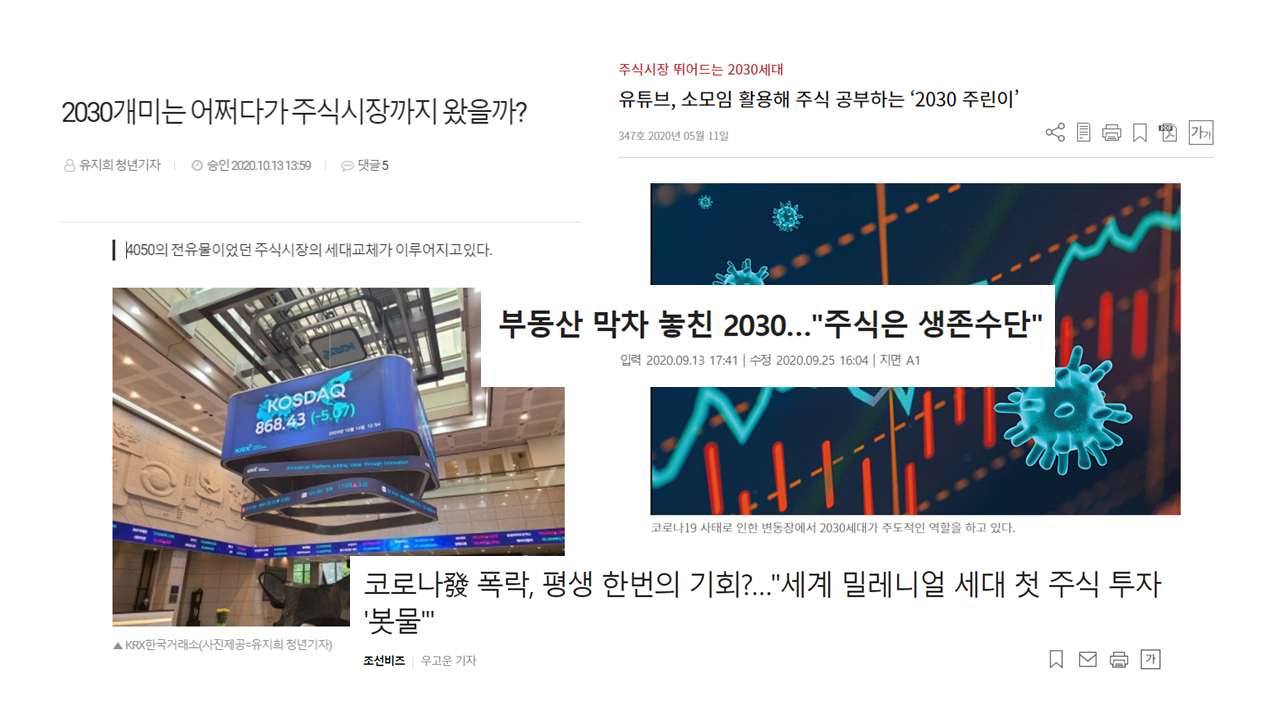

In [4]:
display_png(file = "PPT/슬라이드1.png")

#### B. 왜 2030은 주식투자를 하는가

그렇다면 2030 세대는 왜 주식투자를 시작했을까요? 저희는 그 이유를 세가지로 정의해 보았습니다. 

##### 첫째, 판데믹으로 인한 주식시장 폭락이 증권시장 진입 기회가 되었습니다.
국내와 해외 증권시장의 동향을 살펴보기 위해 2015년에서 2020년까지 근 5년간의 KOSPI지수와 S&500지수 그래프를 그렸습니다. *(배경으로 하이라이트한 부분은 저희가 가지고 있는 거래데이터 기간(2019.01~2020.06)입니다.)*  

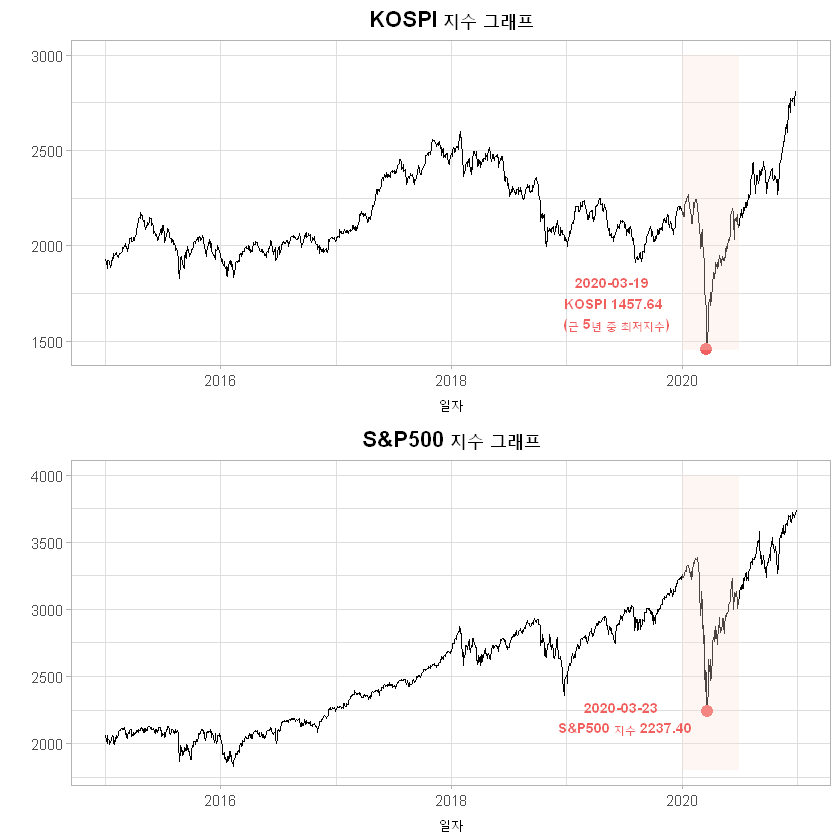

In [5]:
# KOSPI 지수  데이터
kospi_index <- read.csv("KOSPI_index.csv")

kospi_index <- kospi_index %>% dplyr::select(일자, 현재지수) %>%
  mutate(일자 = ymd(일자), 현재지수 = str_replace_all(현재지수, ",", "") %>% as.numeric())

z1 <- kospi_index %>% 
  ggplot() + geom_line(aes(x=일자, y=현재지수)) +
  geom_point(aes(x=ymd('2020-03-19'), y=1457.64), color = '#F15F5F', size=3, alpha=.7) +
  #geom_vline(xintercept = ymd('2020-03-19'), linetype='dashed', color = '#F15F5F',size =1, alpha=.7) +
  theme_light() +
  annotate('rect', xmin= ymd('2020-01-01'), xmax=ymd('2020-06-30'),
           ymin =1450, ymax=3000, fill ='#FAE0D4', alpha=.3) +
  labs(title = 'KOSPI 지수 그래프', y='') +
  annotate('text', x=ymd('2019-06-01'), y = 1700,
           label='2020-03-19 \n KOSPI 1457.64 \n (근 5년 중 최저지수)', size = 3, fontface=2, color ='#F15F5F') +
  theme(plot.title = element_text(hjust = 0.5, face='bold'))

# 미국장 지수 데이터 
sp500_index <- read.csv("sp500.csv")
sp500_index <- sp500_index %>% mutate(DATE=ymd(DATE))%>% filter(SP500 != ".")  %>%
  mutate(SP500 = SP500 %>% as.character() %>% as.numeric())

z2 <- sp500_index %>% 
  ggplot() +
  geom_line(aes(x=DATE, y=SP500)) +
  geom_point(aes(x=ymd('2020-03-23'), y=2237.40), color = '#F15F5F', size=3, alpha=.7) +
  theme_light() +
  annotate('rect', xmin= ymd('2020-01-01'), xmax=ymd('2020-06-30'),
         ymin =1800, ymax=4000, fill ='#FAE0D4', alpha=.3) +
  labs(title='S&P500 지수 그래프', x='일자',y='') +
  annotate('text', x=ymd('2019-07-01'), y=2200,
          label='2020-03-23 \n S&P500 지수 2237.40', size=3, fontface=2, color = '#F15F5F') +
  theme(plot.title = element_text(hjust = 0.5, face='bold'))

grid.arrange(z1,z2)


그래프를 살피면 두 지수 모두 공통적으로 2020년 3월 지수가 급락세를 보이는 것을 알 수 있습니다. 세계적으로 하락장이 이어졌지만 이는 개인투자자들에게 저가 매수의 기회로 다가왔고 젊은 YZ세대 투자자들의 주식시장 진입의 결정적 원인이 되었습니다. 특히 많은 국내 투자자들에게 비싸다고만 여겨졌던 해외주식에도 눈을 돌리게 된 계기가 되었습니다.  

##### 둘째, 2030세대에게는 자산을 운용할 수 있는 다른 금융 상품이 부재하기 때문입니다. 
연이은 부동산 가격 상승과 예적금 금리의 하향세로 X세대에 비해 **자산 운용의 기회가 부족해진 2030세대는 집값마련과 노후대비를 위한 수단으로 주식을 선택**할 수 밖에 없었던 것입니다.   
아래의 기사사진을 통해 서울 아파트 중위가격이 매해 1억 단위 이상으로 상승하는 것을 볼 수 있습니다. 4050세대에 비해 운용할 수 있는 자금수준이 낮은 2030세대에게 'N포 세대' 라는 별명이 붙을 정도로 부동산 투자는 커녕 집값 마련 조차 쉽지 않은 상황입니다.  

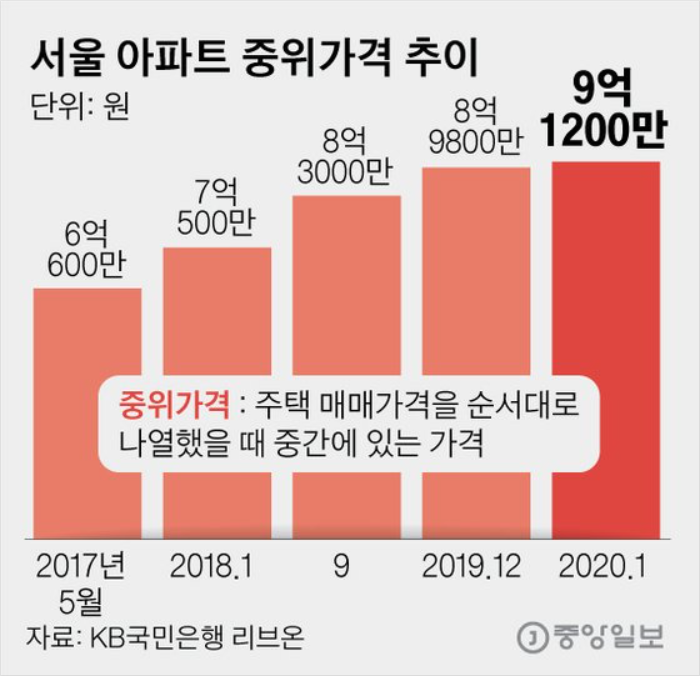

In [6]:
display_png(file="PPT/서울 아파트 중위가격 추이.png")

또한 예적금 금리가 20년 전에 비해 얼마나 낮아졌는지 살펴보기 위하여 2001년 9월부터 2020년 11월까지의 약 20년간 정기예금, 정기적금 연리 데이터를 시각화했습니다.

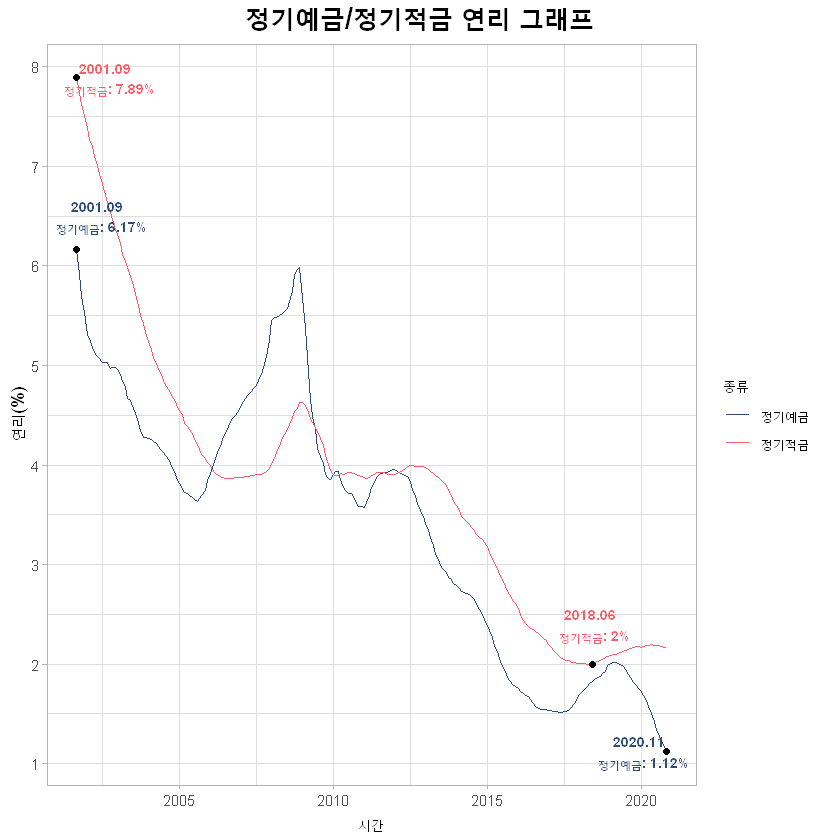

In [7]:
# 정기예금, 정기적금 연리 데이터 
interest = fread('ECOS_TABLE_20201230_203633.csv', fill=T)
names(interest) <- c('date', 'dpsit', 'instllmnt')
interest1 = data.table(date = interest$date, value = interest$dpsit, type=rep('dpsit', 237))
interest2 = data.table(date = interest$date, value = interest$instllmnt, type=rep('instllmnt', 237))
interest1= interest1[4:234, ]; interest2=interest2[4:234,]
interest = rbind(interest1, interest2)
interest$value = as.numeric(interest$value)

dpsit.min <- interest %>% filter(type=='dpsit') %>% dplyr::select(value) %>% min()
dpsit.max <- interest %>% filter(type=='dpsit') %>% dplyr::select(value) %>% max()
inst.min <- interest %>% filter(type=='instllmnt') %>% dplyr::select(value) %>% min()
inst.max <- interest %>% filter(type=='instllmnt') %>% dplyr::select(value) %>% max()

annotate_figure(
  interest %>% ggplot() +
  geom_line(aes(x=ym(date), y=value, group=type, color=factor(type))) +
  theme_light() + labs(x='시간', y='연리(%)', color='종류') +
  scale_color_manual(values=ten_colors[c(3,7)], labels=c('dpsit'='정기예금', 'instllmnt'='정기적금'))+
  scale_y_continuous(breaks=0:9) +
  
  geom_point(aes(x=ym('2020/11'), y=dpsit.min)) +
  annotate('text', x=ym('2020/01'), y=dpsit.min,
           label=paste('2020.11','\n','정기예금: 1.12%'),
           size=3, fontface=2, color = ten_colors[3])+
  
  geom_point(aes(x=ym('2001/09'), y=dpsit.max)) +
  annotate('text', x=ym('2002/06'), y=6.5,
           label=paste('2001.09','\n','정기예금: 6.17%'),
           size=3, fontface=2, color = ten_colors[3])+
  
  geom_point(aes(x=ym('2018/06'), y=inst.min)) +
  annotate('text', x=ym('2018/06'), y=2.4,
           label=paste('2018.06','\n','정기적금: 2%'),
           size=3, fontface=2, color = ten_colors[7])+
  
  geom_point(aes(x=ym('2001/09'), y=inst.max)) +
  annotate('text', x=ym('2002/09'), y=inst.max,
           label=paste('2001.09','\n','정기적금: 7.89%'),
           size=3, fontface=2, color = ten_colors[7]),

  top=text_grob('정기예금/정기적금 연리 그래프', face='bold', size=18))

##### 셋째, 유튜브 등의 SNS를 통해 주식 투자에 대한 진입장벽이 낮아졌습니다. 
주식투자가 유행하면서 관련된 유튜브 영상 등 주식 투자에 대한 지식을 전달하는 매체가 증가하면서 주식을 잘 모르던 젊은 세대에게도 주식시장에 대한 접근성이 높아진 것입니다. 실제로 아래의 기사사진을 통해 2030세대가 재테크 관련 정보를 습득하는 매체로 유튜브를 가장 많이 사용하는 것으로 보입니다. 

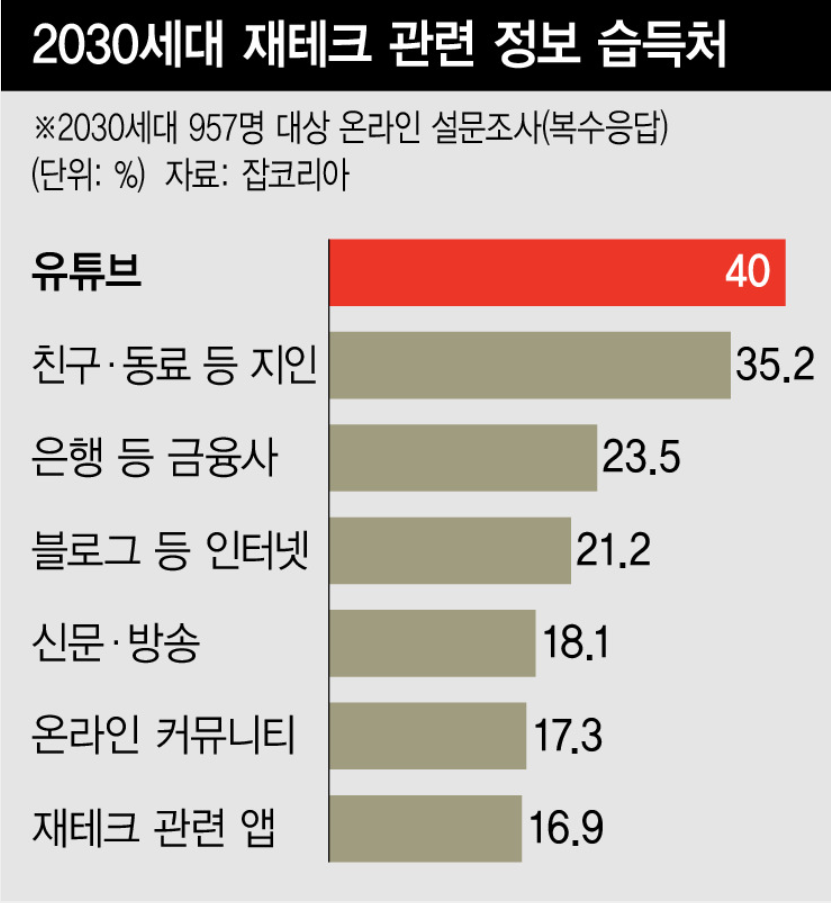

In [8]:
display_png(file="PPT/2030세대 재테크 관련 정보 습득처.png")


이제 주어진 데이터를 탐색하며 YZ세대 투자자에게 주목해야 하는 이유를 살펴보고 EDA와 모델링을 통해 이들의 특성을 프로파일링하도록 하겠습니다. 

## 2. 본론
 ### A. EDA
 
 ### 1-1 고객 데이터 탐색

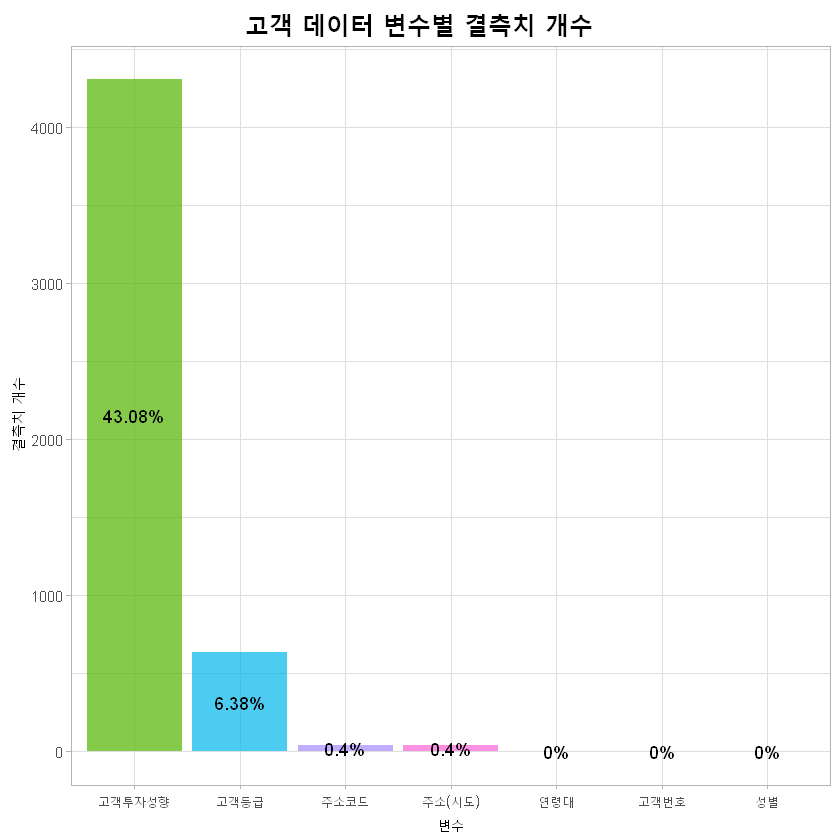

In [9]:
## 고객 정보 데이터 불러오기 
cus_info <- fread("리그2/2_cus_info.csv",
                  header = T,
                  stringsAsFactors = F,
                  data.table = F,
                  encoding = "UTF-8") 


## 전처리 - 범주형 데이터 데이터타입과 레벨 이름 변경하기 

# 성별
cus_info$sex_dit_cd <- ifelse(cus_info$sex_dit_cd=="1", "M", "F")
cus_info$sex_dit_cd <- as.factor(cus_info$sex_dit_cd)
# 주소
cus_info$zip_ctp_cd <- as.numeric(cus_info$zip_ctp_cd) 
cus_info$zip_ctp_cd <- as.factor(cus_info$zip_ctp_cd)
cus_info$zip_ctp_cd_nm <- plyr::revalue(cus_info$zip_ctp_cd, 
                                     replace = c("41"="경기", "11"="서울", "48"="경남",
                                                 "26"="부산", "27"="대구", "47"="경북",
                                                 "28"="인천", "44"="충남", "46"="전남",
                                                 "30"="대전", "29"="광주", "43"="충북",
                                                 "45"="전북", "42"="강원", "31"="울산",
                                                 "50"="제주","36"="세종"))
# 투자등급
cus_info$tco_cus_grd_cd <- as.numeric(cus_info$tco_cus_grd_cd) 
cus_info$tco_cus_grd_cd <-factor(cus_info$tco_cus_grd_cd, levels=c(1,2,3,4,5,9))
cus_info$tco_cus_grd_cd <- plyr::revalue(cus_info$tco_cus_grd_cd,
                                         replace=c("1"="탑클래스", "2"="골드",  "3"="로얄", "4"="그린",
                                                   "5"="블루", "9"="등급없음"))

# 투자성향
cus_info$ivs_icn_cd <- as.numeric(cus_info$ivs_icn_cd)
cus_info$ivs_icn_cd <- factor(cus_info$ivs_icn_cd, levels=c(1,2,3,4,5,9,0))
cus_info$ivs_icn_cd <- plyr::revalue(cus_info$ivs_icn_cd,
                                     c("0"="미동의","1"="안정", "2"="안정추구",
                                       "3"="위험중립", "4"="적극투자", "5"="공격투자",
                                       "9"="전문투자"))

## 변수별 NA 개수 확인하기
na_count <- colSums(cus_info %>% is.na())
annotate_figure(
    data.frame(columns=colnames(cus_info), na_count, row.names = 1:length(na_count)) %>% 
    ggplot(aes(x=reorder(columns,-na_count), y=na_count)) + geom_col(aes(fill = columns), alpha=.7) +
    theme_light() + 
    guides(fill = FALSE) +
    geom_text(aes(label=paste0(na_count/10000 * 100, "%")),position = position_stack(vjust = .5), color = 'black') +
    labs(x="변수", y='결측치 개수') +
    scale_x_discrete(labels = c("고객투자성향", "고객등급", "주소코드", "주소(시도)", "연령대", "고객번호","성별")),
     top=text_grob('고객 데이터 변수별 결측치 개수', face='bold', size=20))


- 고객 데이터에서 고객투자성향 변수는 결측치가 40%에 가깝기 때문에 고객 분류 시 유의한 변수가 아닐 것이라고 판단하여 참고하고자 합니다.  

#### 1) 연령 분포
연령대 범주는 범주가 많아 10세 기준으로 재범주화하였습니다. 저희는 앞서 언급한 것처럼 2030세대 투자자에 집중하여 분석하기 위해 **30대를 Y세대, 20대를 Z세대로** 명명하도록 하겠습니다. 

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


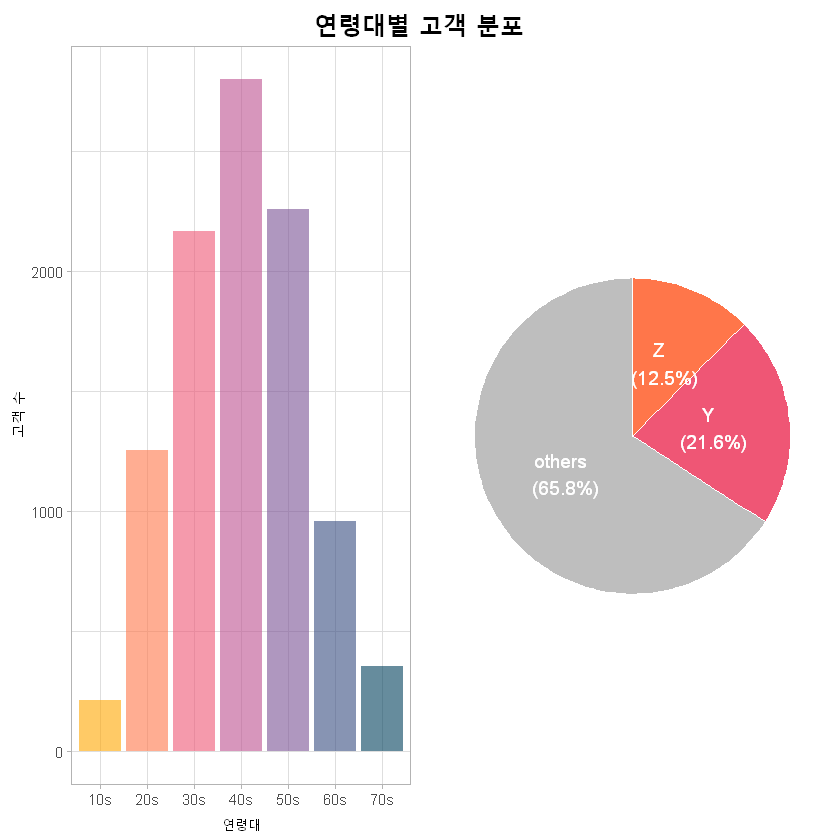

In [10]:
# 연령 분포 범주가 너무 많아 10세 기준으로 연령대 재범주화 
cus_info$age_group <- ifelse(cus_info$cus_age %in% c("20", "25"), "20s",
                             ifelse(cus_info$cus_age %in% c("30", "35"), "30s",
                                    ifelse(cus_info$cus_age %in% c("40","45"), "40s", 
                                           ifelse(cus_info$cus_age %in% c("50", "55"), "50s",
                                                  ifelse(cus_info$cus_age %in% c("60", "65"), "60s",
                                                         ifelse(cus_info$cus_age == "0", "10s", "70s")))))) %>% as.factor()

# yz 세대와 비세대 재범주화
cus_info$yz <- ifelse(cus_info$cus_age %in% c("30", "35"), "Y",
                      ifelse(cus_info$cus_age %in% c("20", "25"), "Z", "others")) %>% as.factor()
cus_info$YZ <- ifelse(cus_info$yz  == "others", "others", "YZ") %>% as.factor()

# 연령대별 고객 분포 plot
p1 <- cus_info %>% group_by(age_group) %>% summarise(n = n()) %>% 
      ggplot() + geom_col(aes(x=age_group, y=n, fill=age_group), alpha=.6) +
      scale_fill_manual(values = age_color) +
      theme_light() + labs(x = '연령대', y='고객 수') +
      theme(legend.position='none')

t2 <- cus_info %>% group_by(yz) %>% summarise(n = n()) %>% mutate(perc=round(n/sum(n),3)*100)

p2 <- t2 %>% ggpie(x='perc', label=paste(t2$yz, '\n', paste0('(', t2$perc,'%)')),
                   lab.pos='in', lab.font=c(4, 'bold', 'white'), fill='yz',
                   color='white') + scale_fill_manual(values=yz_color)+
             theme(axis.text.y=element_blank(), legend.position='none') 
  
annotate_figure(ggarrange(p1, p2, nrow=1, ncol=2),
                top=text_grob('연령대별 고객 분포', face='bold', size=20))

- 연령대 분포를 살펴보면 40대 고객이 가장 많고, 50대, 30대 순으로 고객 수가 많습니다. YZ세대 투자자는 전체의 30% 정도를 차지하고 있습니다.  


#### 2) 성별 분포

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` regrouping output by 'sex_dit_cd' (override with `.groups` argument)


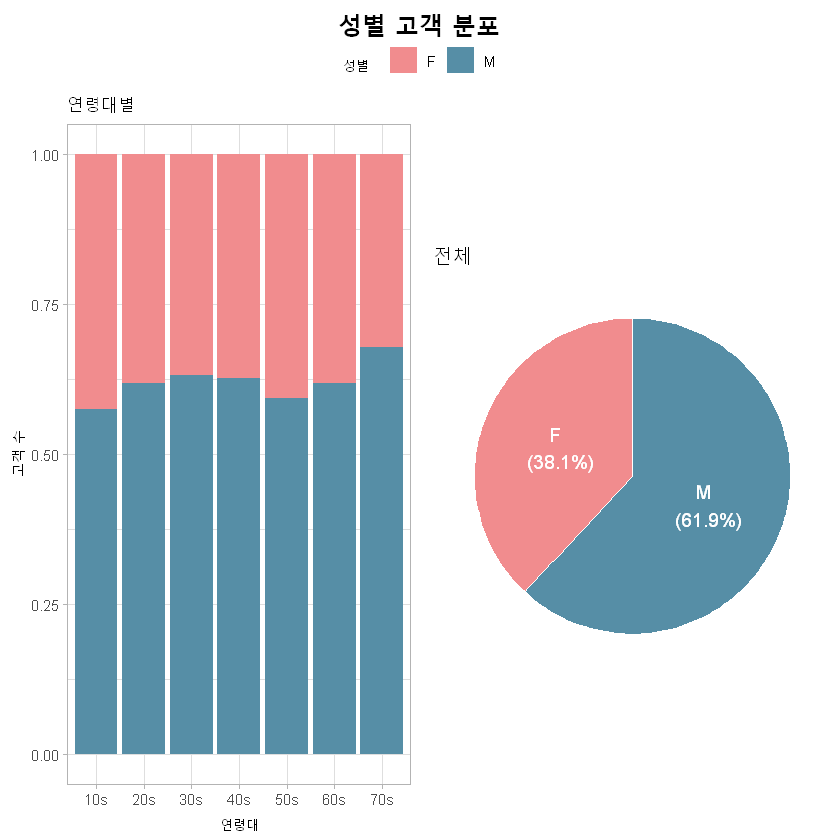

In [11]:
t1 <- cus_info %>% group_by(sex_dit_cd) %>% summarise(n=n()) %>% mutate(perc=round(n/sum(n),3)*100)

p1 <- cus_info %>% group_by(sex_dit_cd, age_group) %>% summarise(n=n()) %>% 
      ggplot() + geom_col(aes(x = age_group, y=n, fill=sex_dit_cd), position="fill") +
      theme_light() + scale_fill_manual(values = sex_color) +
      labs(title='연령대별', x='연령대', y='고객 수', fill = '성별')

p2  <- t1 %>% ggpie(x='perc', label=paste(t1$sex_dit_cd, '\n', paste0('(',t1$perc,'%)')),
                   lab.pos='in', lab.font=c(4, 'bold', 'white'),
                   fill='sex_dit_cd', color='white') +
             scale_fill_manual(values = sex_color) +
             labs(title='전체', fill='성별')

annotate_figure(ggarrange(p1, p2, nrow=1, ncol=2, common.legend = T),
                top=text_grob('성별 고객 분포', face='bold', size=20))

- 모든 연령층에서 남성 고객이 여성 고객보다  더 많이 분포하고 있습니다. 

#### 3) 고객 등급 & 투자성향 분포

`summarise()` ungrouping output (override with `.groups` argument)


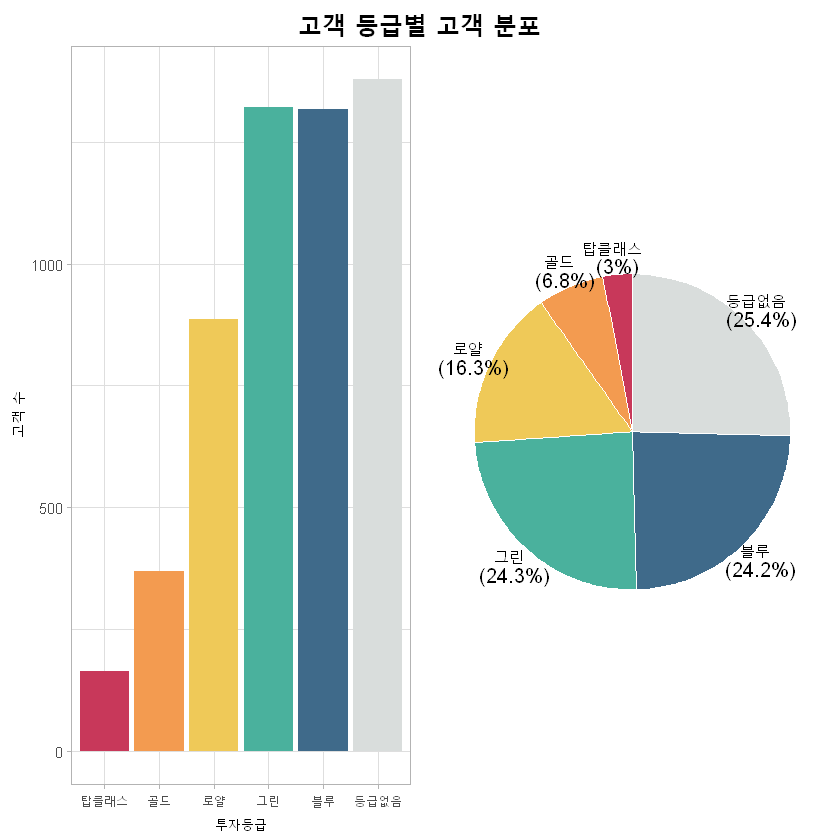

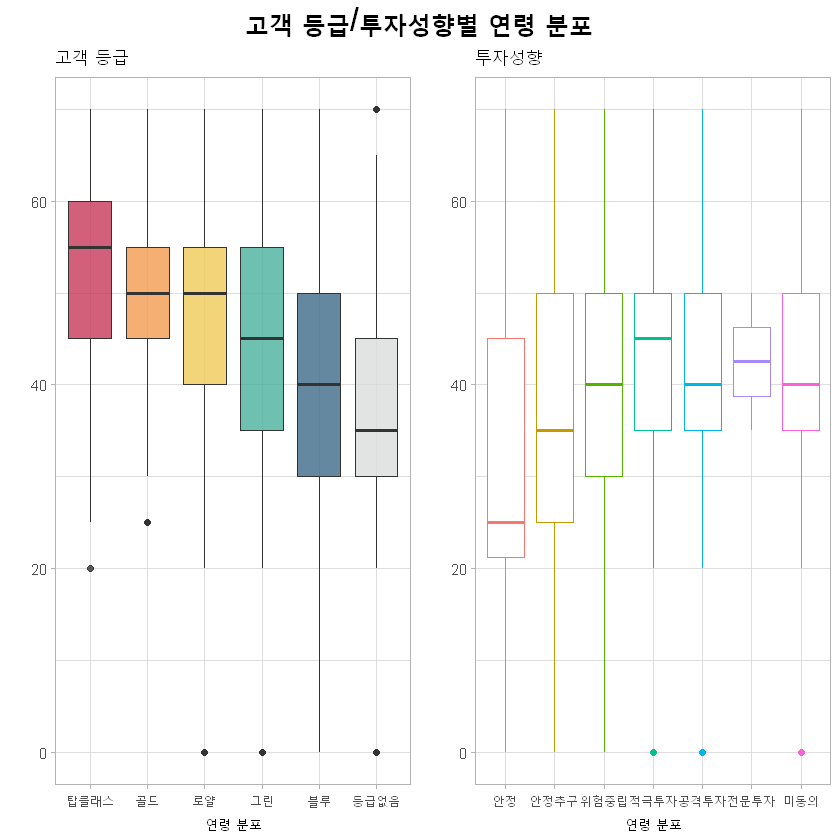

In [12]:
## 고객 등급 분포
t1 <- cus_info %>% drop_na() %>% group_by(tco_cus_grd_cd) %>% summarise(n=n()) %>% mutate(perc=round(n/sum(n),3)*100)

p1 <- t1 %>% ggplot() + geom_col(aes(x=tco_cus_grd_cd, y=n, fill = tco_cus_grd_cd)) +
    theme_light() +
    labs(x = '투자등급', y = '고객 수', fill = '고객 등급') +
    scale_fill_manual(values = grd_color) + theme(legend.position = 'none')

p2 <- t1 %>% ggpie(x='perc', label=paste(t1$tco_cus_grd_cd, '\n', paste0('(', t1$perc,'%)')),
             lab.pos='out', fill='tco_cus_grd_cd', color='white', palette = grd_color) +
      labs(x='', y='') +
      theme(axis.text.y=element_blank(), legend.position='none')

annotate_figure(ggarrange(p1, p2),
                top=text_grob('고객 등급별 고객 분포', face='bold', size=20))

# 연령별 고객 등급&성향 분포

a1 <- cus_info %>% drop_na(tco_cus_grd_cd) %>% 
  ggplot() + geom_boxplot(aes(x=reorder(tco_cus_grd_cd,-cus_age), y=cus_age, fill=tco_cus_grd_cd), alpha=.8) +
  theme_light() + scale_fill_manual(values = grd_color) +
  labs(title = '고객 등급', x = '연령 분포', y = '') +
  theme(legend.position = "none")

# 5) 투자성향 분포 
a2 <- cus_info %>% drop_na(ivs_icn_cd) %>% 
  ggplot() + geom_boxplot(aes(x=ivs_icn_cd, y=cus_age, color=ivs_icn_cd)) +
  theme_light() +
  labs(title = '투자성향', x = '연령 분포', y='') +
  theme(legend.position = "none") 
annotate_figure(ggarrange(a1, a2), top=text_grob('고객 등급/투자성향별 연령 분포', face='bold', size=20))


- 고객등급이 높을수록 연령대가 높은 분포를 이루고 있는데 이는 **젊은 투자자들은 상대적으로 운용하는 자금이 적기 때문**이라고 추측할 수 있습니다. 또한 등급이 없는 경우는 연령대가 낮은 편인데, 연령이 적을수록 거래정도가 적기 때문에 등급이 제대로 산정되지 않은 것으로 보입니다.   


- 반면 투자성향은 소극적(안정, 안정추구형) 투자를 할수록 연령대가 낮은 분포를 보이는데, 결측치가 많은 변수이기 때문에 연령에 따른 투자성향을 살펴보는 것은 위험할 수 있습니다.

### 1-2. 계좌 데이터 탐색

국내와 해외 거래 데이터는 모두 계좌 기준이고 한 고객이 여러 계좌를 보유할 수 있으므로 고객 정보를 합친 계좌 데이터셋을 생성했습니다. 

In [13]:
# 계좌 데이터 불러오기 
act_info <- fread("리그2/2_act_info.csv",
                  header = T,
                  stringsAsFactors = F,
                  data.table = F,
                  encoding = "UTF-8") 

act_info <- left_join(act_info, cus_info, by = "cus_id") 

#### 1) 고객별 계좌  개수 시각화 
한 고객이 여러 계좌를 보유할 수 있으므로 고객별 계좌 개수 변수를 만들어 연령별 분포를 살펴보도록 하겠습니다.

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


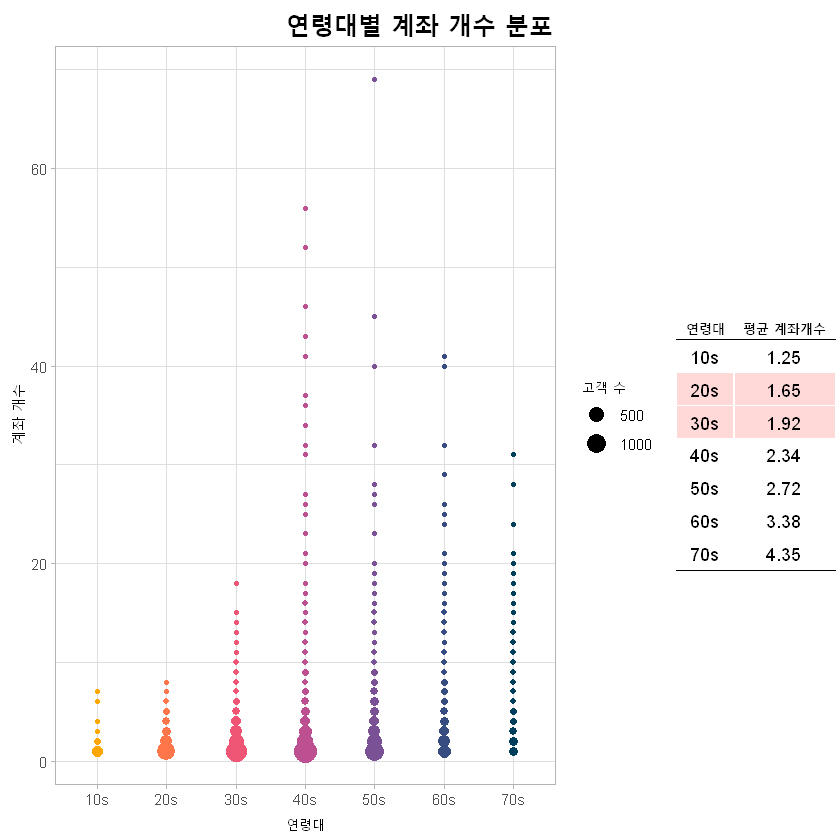

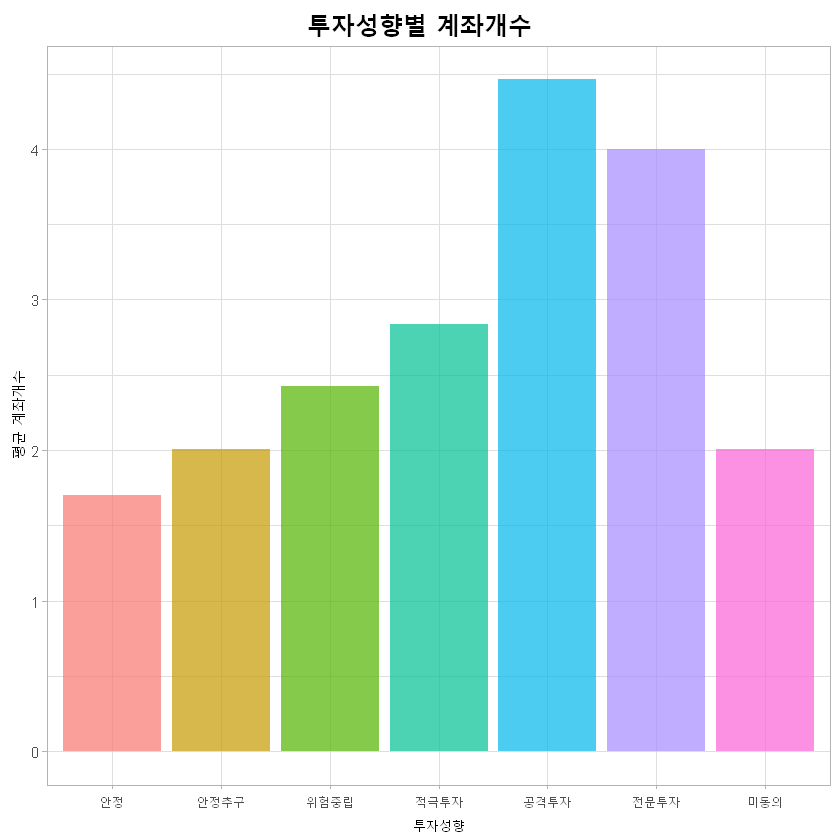

In [14]:
cus_info <- left_join(cus_info, 
                      act_info %>% group_by(cus_id) %>% summarise(act_count = n()), by = "cus_id")

p1 <- cus_info %>% group_by(age_group, act_count) %>% summarise(n=n()) %>% 
  ggplot() + geom_point(aes(x=age_group, y=act_count, color=age_group, size=n)) +
  theme_light() + scale_color_manual(values = age_color) +
  labs(x = "연령대", y = "계좌 개수", size = "고객 수") +
  guides(color = FALSE)

p2 <- cus_info %>% group_by(age_group) %>% summarize('평균 계좌개수' = round(mean(act_count),2)) %>% 
  rename('연령대'= age_group) %>% 
  ggtexttable(rows = NULL, theme=ttheme('light')) %>% 
  table_cell_bg(row = 3:4, column = 1:2, fill= '#FFD8D8', color = 'white') 

annotate_figure(ggarrange(p1, p2, widths = c(4, 1), heights=c(0.5, 1)),
                top=text_grob('연령대별 계좌 개수 분포', face='bold', size=20))

# 투자성향별 계좌개수
annotate_figure(
  cus_info %>% group_by(ivs_icn_cd) %>% summarize(acc.mean=mean(act_count)) %>% drop_na() %>% 
  ggplot(aes(x=ivs_icn_cd, y=acc.mean, fill=ivs_icn_cd)) +
  geom_bar(stat='identity', position=position_dodge(), alpha=.7) +
  labs(x='투자성향', y='평균 계좌개수') +
  theme_light() + theme(legend.position = 'none'),
  top=text_grob('투자성향별 계좌개수', face='bold', size=20))

- 연령대별 계좌 개수 분포를 보면 대체로 10,20,30대가 계좌 개수를 적게 사용하는 것을 알 수 있습니다.    
  
  
- 대다수의 고객이 계좌를 1~2개 사용하지만 특히 **젊은 투자자들은 계좌를 여러개로 나눠서 사용하지는 않는 것**으로 보입니다. 실제로 연령대가 높을수록 평균 보유 계좌 개수가 높아지는데,  40,50,60대가 여러 계좌를 보유하고 있는 이유는 주식을 한 기간이 더 길기 때문이라고도 볼 수 있습니다.  
  
  
- 투자성향별 계좌개수 분포를 보면 적극적 투자를 하는 고객일수록 평균 계좌개수가 높습니다. 투자 목적이나 용도에 따라 계좌를 나눠서 관리할 수 있으므로 고객별 계좌 개수는 투자에 대한 경험과 전문성을 나타내는 지표라고도 볼 수 있습니다. 

#### 2) 계좌개설일 시계열 시각화

`summarise()` regrouping output by 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)


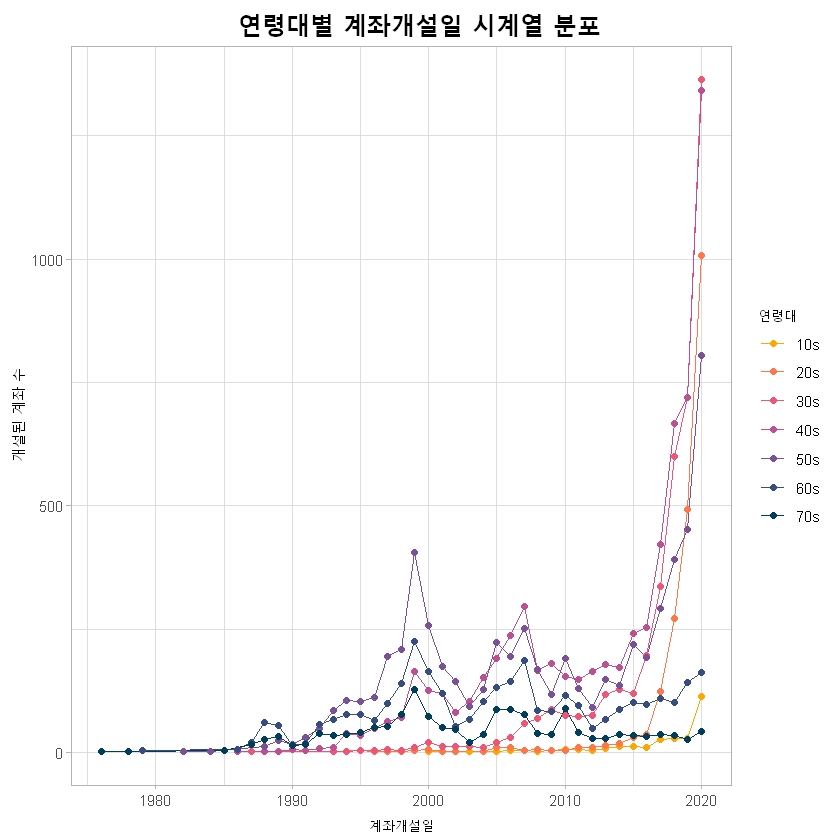

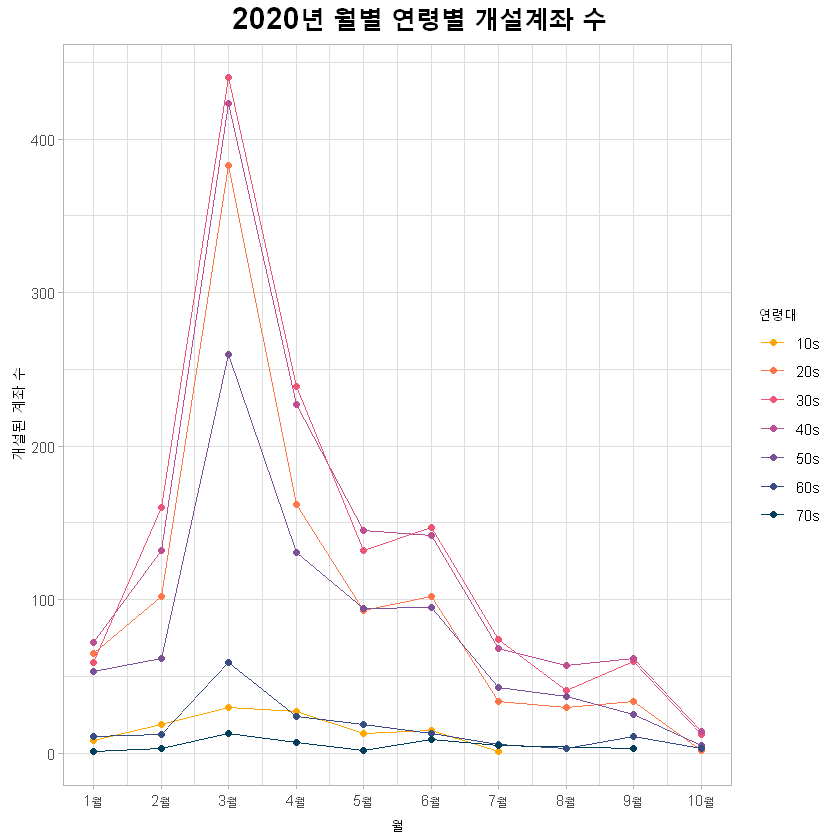

In [15]:
act_info$act_opn_ym <- ifelse(act_info$act_opn_ym == 0, NA, act_info$act_opn_ym)
act_info$act_opn_yy <- str_sub(act_info$act_opn_ym, 1,4)
act_info$act_opn_mm <- str_sub(act_info$act_opn_ym, 5,6)

act_info$act_opn_mm <- as.numeric(act_info$act_opn_mm)
act_info$act_opn_yy <- as.numeric(act_info$act_opn_yy)

annotate_figure(
  act_info %>% group_by(age_group, act_opn_yy) %>% summarise(n=n()) %>% 
  ggplot() + geom_line(aes(x=act_opn_yy, y=n, color=age_group)) +
  geom_point(aes(x=act_opn_yy, y=n, color=age_group)) +
  theme_light() + scale_color_manual(values=age_color) +
  labs(x = '계좌개설일', y='개설된 계좌 수', color = '연령대'),
  top=text_grob('연령대별 계좌개설일 시계열 분포', face='bold', size=20))
# 2020년 들어서 계좌개설 급증..! 특히 2030세대 위주 

annotate_figure(
  act_info %>% filter(act_opn_yy == 2020) %>%
  group_by(age_group, act_opn_mm) %>% summarise(n=n()) %>% 
  ggplot() + geom_line(aes(x=act_opn_mm, y=n, color=age_group)) +
  geom_point(aes(x=act_opn_mm, y=n, color=age_group)) + 
  theme_light() + scale_color_manual(values=age_color) +
  labs(x = '월', y = '개설된 계좌 수', color = '연령대') +
  scale_x_continuous(breaks = c(1,2,3,4,5,6,7,8,9,10), 
                     labels = paste0(c(1,2,3,4,5,6,7,8,9,10), "월")),
  top=text_grob('2020년 월별 연령별 개설계좌 수', face='bold', size=18))

- 상위의 계좌개설일 시계열 그래프를 보면 2020년을 기준으로 개설된 계좌 수가 급증하는 양상을 보이는데, **2020년 들어 가장 계좌 개설을 많이 한 연령대는 2030세대**임을 확인할 수 있습니다. 이는 서론에서 살펴본 것처럼 코로나19로 인해 주식시장에 진입한 YZ세대 투자자가 많아졌음을 보여주고 있습니다.  
  
  
- 2020년의 월별 개설계좌수 그래프를 보면 **3월달에** 가장 많은 계좌 개설이 이루어졌으며, 특히 20,30대가 주식시장에 대거 유입되는 현상이 나타났습니다. 2030세대 투자자에게 주목해야 하는 이유를 단적으로 보여주고 있는데, 3월에 가장 많은 계좌가 개설된 이유는 서론에서 살펴본 것처럼 글로벌 증시 폭락이 더 많은 개인 투자자들에게 주식 시장에 진출할 수 있는 기회가 되었기 때문입니다. 

#### 3) 2020년 유입여부별 고객 분포 시각화 
고객별 첫 개설 계좌의 개설년도를 기준으로 2020년 유입 여부 파생변수를 생성했습니다.

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group', 'inflow2020' (override with `.groups` argument)


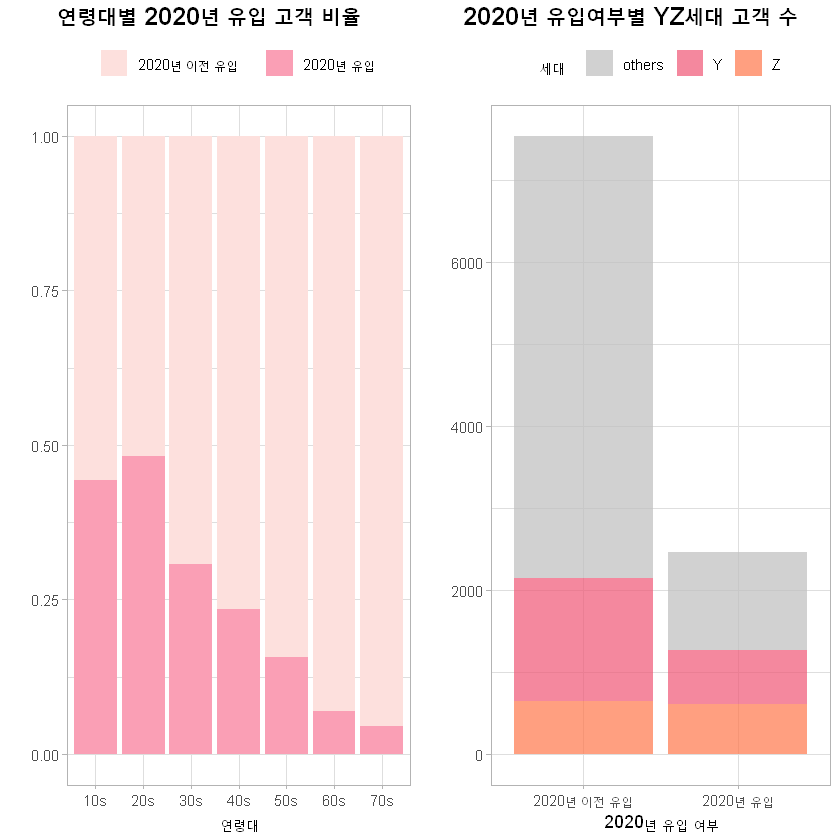

In [16]:
cus_info <- left_join(cus_info,
                      act_info %>% group_by(cus_id) %>%
                        summarise(early_opn = min(act_opn_ym)) %>% 
                        mutate(early_opn_yy = str_sub(early_opn,1,4)) %>% 
                        mutate(inflow2020 = ifelse(early_opn_yy == 2020, 1, 0)) %>% 
                        select(cus_id, inflow2020), by = 'cus_id')

g1 <- annotate_figure( 
    cus_info %>% group_by(age_group, inflow2020) %>% summarise(n=n()) %>% drop_na() %>% 
       ggplot() + geom_bar(aes(x=age_group, y=n, fill = factor(inflow2020)),
                      stat = "identity", position = "fill") +
      labs(x = '연령대', y = '', fill = '') +
      scale_fill_brewer(palette = "RdPu",
                    labels = c("2020년 이전 유입", "2020년 유입")) + 
      theme_light() + theme(legend.position = 'top', legend.box = 'vertical'), 
    top = text_grob("연령대별 2020년 유입 고객 비율", face='bold', size=15))
    

g2 <- annotate_figure(
    cus_info %>% group_by(age_group, inflow2020, yz) %>% summarise(n=n()) %>% drop_na() %>% 
        ggplot() +
        geom_col(aes(x=factor(inflow2020), y=n, fill = yz),alpha = .7) +
    scale_x_discrete(labels = c("2020년 이전 유입", "2020년 유입")) +
    scale_fill_manual(values=yz_color) +
    theme_light() + theme(legend.position = 'top') +
    labs(x = '2020년 유입 여부', y = '', fill = '세대'), 
    top = text_grob("2020년 유입여부별 YZ세대 고객 수", face='bold', size=15))

grid.arrange(g1, g2, ncol= 2)


- 10,20,30대 고객 중 2020년에 계좌를 개설한 고객 비중은 모두 40% 이상으로 매우 높습니다.   
  
  
- 2020년 이전에 유입된 고객에 비하면 **2020년 한 해동안  유입된 고객 수가 굉장히 많은데 그 중 절반 이상이 YZ세대**인 것을 확인할 수 있습니다.

### 1-3 거래 데이터 탐색 

In [17]:
# 거래 데이터 불러오기 
trd_kr <- fread("리그2/2_trd_kr.csv", 
                header = T,
                stringsAsFactors = F,
                data.table = F,
                encoding = "UTF-8") 

trd_oss <- fread("리그2/2_trd_oss.csv",
                 header = T,
                 stringsAsFactors = F,
                 data.table = F,
                 encoding = "UTF-8")

iem_info <- fread("리그2/2_iem_info.csv",
                  header = T,
                  stringsAsFactors = F,
                  data.table = F,
                  encoding = "UTF-8")


# 종목코드 기준 종목정보 join 
trd_kr <- left_join(trd_kr, iem_info, by = "iem_cd")
trd_oss <- left_join(trd_oss, iem_info, by = "iem_cd")

# 계좌 기준 고객정보 join
trd_kr <- left_join(trd_kr, act_info, by="act_id")
trd_oss <- left_join(trd_oss, act_info, by="act_id")

trd_kr <- left_join(trd_kr, cus_info[, c("cus_id", "act_count", "inflow2020")], by = "cus_id")
trd_oss <- left_join(trd_oss, cus_info[,c("cus_id", "act_count", "inflow2020")], by= "cus_id")

#### 1) 국내 & 해외  주식 거래량 시각화

국내 거래는 약 331만건으로 매우 많습니다. 반면 해외 거래 데이터는 2만 9천건으로 국내 거래량에 비하면 매우 적은 편입니다.  먼저 주어진 1년 6개월(2019년 1월 ~ 2020년 6월) 간의 거래량 시계열 그래프를 살펴보겠습니다 

`summarise()` regrouping output by 'orr_dt' (override with `.groups` argument)
`summarise()` regrouping output by 'orr_dt' (override with `.groups` argument)


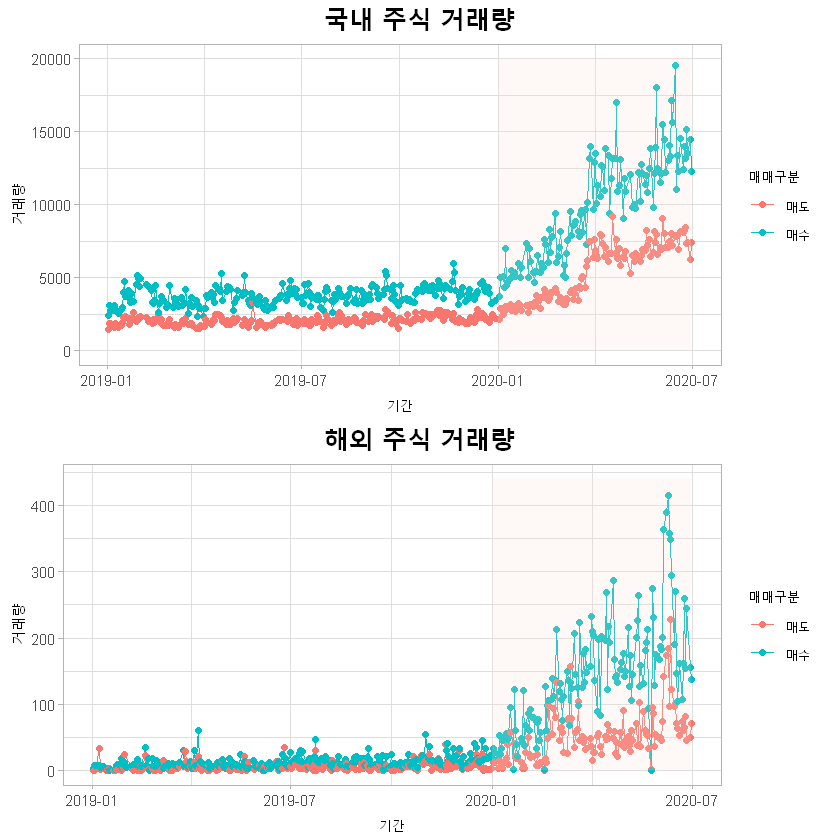

In [18]:
# 주문날짜 날짜형식으로 변환
trd_kr$orr_dt <- ymd(trd_kr$orr_dt) 
trd_oss$orr_dt <- ymd(trd_oss$orr_dt)


# 매매구분
trd_kr$sby_dit_cd <- ifelse(trd_kr$sby_dit_cd == 1, "매도", "매수")
trd_kr$sby_dit_cd <- as.factor(trd_kr$sby_dit_cd)
trd_oss$sby_dit_cd <- ifelse(trd_oss$sby_dit_cd ==1, "매도", "매수")
trd_oss$sby_dit_cd <- factor(trd_oss$sby_dit_cd)



# 국내 주식 거래량 시계열 그래프 시각화
b1 <- annotate_figure(trd_kr %>% group_by(orr_dt, sby_dit_cd) %>% summarise(n=n()) %>% 
  ggplot() + geom_line(aes(x=orr_dt, y=n, color=sby_dit_cd)) +
  geom_point(aes(x=orr_dt, y=n, color=sby_dit_cd)) + theme_light() +
  annotate('rect', xmin=ymd('2020-01-01'), xmax = ymd('2020-06-30'),
           ymin=0, ymax=20000, alpha=.2, fill='#FAE0D4') +
  labs(x = '기간', y = '거래량', color = '매매구분'),
  top=text_grob('국내 주식 거래량', face='bold', size=18))

# 해외 주식 거래량 시계열 그래프 시각화 
b2 <- annotate_figure(trd_oss %>% group_by(orr_dt, sby_dit_cd) %>% summarise(n=n()) %>% 
  ggplot() + geom_line(aes(x=orr_dt, y=n, color=sby_dit_cd)) +
  geom_point(aes(x=orr_dt, y=n, color=sby_dit_cd)) + theme_light() +
  annotate('rect', xmin=ymd('2020-01-01'), xmax = ymd('2020-06-30'),
             ymin=0, ymax=440, alpha=.2, fill='#FAE0D4') +
  labs(x = '기간', y = '거래량', color = '매매구분'),
  top=text_grob('해외 주식 거래량', face='bold', size=18))

grid.arrange(b1,b2, nrow=2)

- 국내와 해외 주식 모두 2020년 들어 증가하는 추세를 보입니다.  

  
- 대체적으로 매수 거래 건수가 매도 거래 건수보다 많지만, 해외 거래의 경우 특히 2020년에 매수 거래량이 급증하고 있습니다. 매수 거래량이 매도거래량보다 월등히 높은 이유는 정보가 상대적으로 적은 해외 주식 종목을 선택할 때 보다 인지도 있는 우량기업에 투자하는 만큼 장기 투자를 많이 하기 때문이라고 볼 수 있습니다.   

 
#### 2) 주문 매체 비율 시각화

연령대별 거래 시 사용하는  주문매체의 비율을 살펴보겠습니다.

`summarise()` regrouping output by 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)


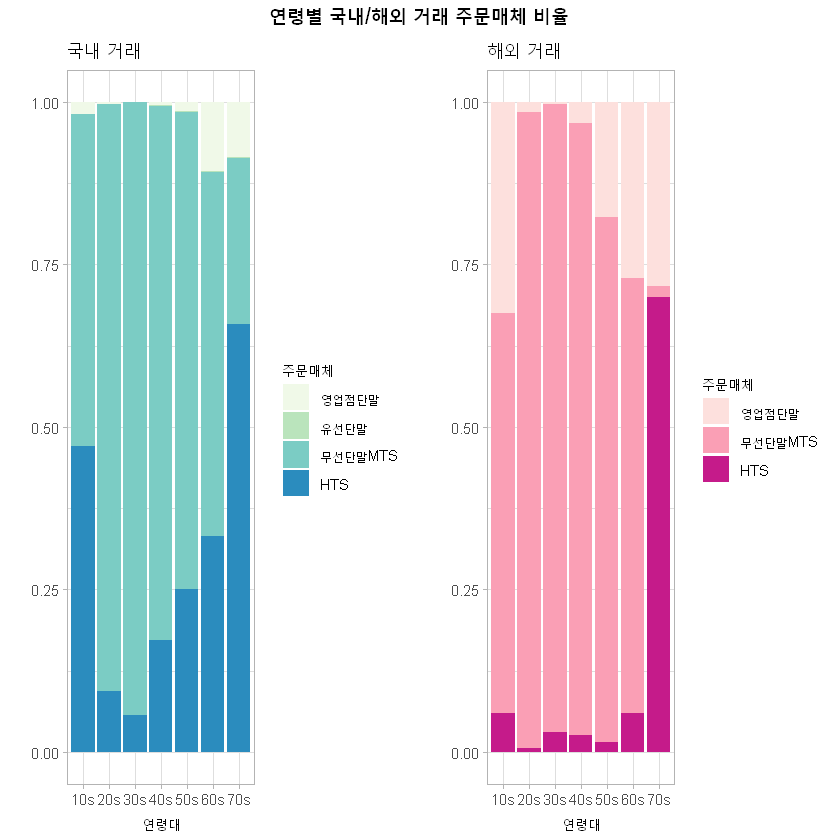

In [19]:
# 국내 거래 주문매체
trd_kr$orr_mdi_dit_cd <- as.factor(trd_kr$orr_mdi_dit_cd)
trd_kr$orr_mdi_dit_cd <- plyr::revalue(trd_kr$orr_mdi_dit_cd,
                                      replace=c("1"="영업점단말","2"="유선단말", 
                                               "3"="무선단말MTS", "4"="HTS"))

d1 <- trd_kr %>% group_by(age_group, orr_mdi_dit_cd) %>% summarise(n=n()) %>% 
  ggplot() + geom_col(aes(x=age_group, y=n, fill=orr_mdi_dit_cd), position = "fill") +
  theme_light() +
  labs(title = '국내 거래', x='연령대', y='', fill = '주문매체') +
  scale_fill_brewer(palette = "GnBu") 

# 해외 거래 주문 매체
trd_oss$orr_mdi_dit_cd <- as.factor(trd_oss$orr_mdi_dit_cd)
trd_oss$orr_mdi_dit_cd <- plyr::revalue(trd_oss$orr_mdi_dit_cd,
                                        replace=c("1"="영업점단말", "3"="무선단말MTS", "4"="HTS"))


d2 <- trd_oss %>% group_by(age_group, orr_mdi_dit_cd) %>% summarise(n=n()) %>% 
  ggplot() + geom_col(aes(x=age_group, y=n, fill=orr_mdi_dit_cd), position = "fill") +
  theme_light() +
  labs(title = '해외 거래', x='연령대', y='', fill = '주문매체') +
  scale_fill_brewer(palette = "RdPu") 

annotate_figure(ggarrange(d1, d2, ncol=2), top=text_grob('연령별 국내/해외 거래 주문매체 비율', face='bold', size=14))

- 국내 거래와 해외 거래 모두 70대 이상의 노년층을 제외한 모든 연령층에서 MTS를 통한 거래의 비중이 가장 높은 것으로 보입니다. 특히 **20,30 세대의 경우 대부분 모바일을 통해 거래**하고 있음을 확인할 수 있습니다.  
  
  
- 해외거래의 경우 무선단말 거래 비중이 국내보다 더욱 높은데, **대부분의 해외주식 거래는 모바일을 통해** 이루어지는 것을 알 수 있습니다.   


#### 3) 연도별 월평균 거래건수 변화 시각화

2020년에 거래정도가 얼마나 높아졌는지를 확인하기 위해 2019년과 2020년의 거래건수 변화를 살펴보겠습니다. 2020년 거래데이터는 6개월만 주어졌기 때문에 월평균을 계산하여 비교했습니다. 

`summarise()` regrouping output by 'age_group', 'year' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group', 'year' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)


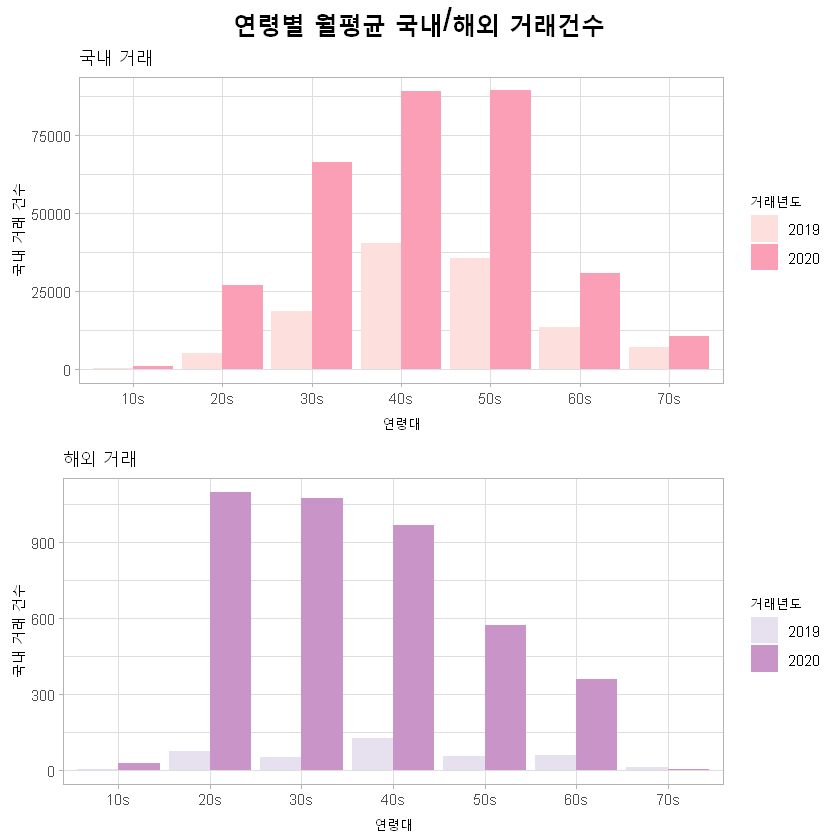

In [20]:
e1 <- trd_kr %>% mutate(year=year(orr_dt), month = month(orr_dt)) %>% 
  mutate_at(vars(year,month), as.character) %>% 
  mutate(month = ifelse(str_length(month) == 1, paste0("0", month), month)) %>% 
  group_by(age_group, year, month) %>% summarise(n=n()) %>% 
  group_by(age_group, year) %>% summarise(mean=mean(n)) %>% 
  ggplot()+
  geom_col(aes(x=age_group, y=mean, fill=factor(year)), position="dodge") +
  theme_light() +
  labs(title = "국내 거래", x='연령대', y='국내 거래 건수', fill ='거래년도') +
  scale_fill_brewer(palette = "RdPu")
  
e2 <- trd_oss %>% mutate(year=year(orr_dt), month = month(orr_dt)) %>% 
  mutate_at(vars(year,month), as.character) %>% 
  mutate(month = ifelse(str_length(month) == 1, paste0("0", month), month)) %>% 
  group_by(age_group, year, month) %>% summarise(n=n()) %>% 
  group_by(age_group, year) %>% summarise(mean=mean(n)) %>% 
  ggplot()+
  geom_col(aes(x=age_group, y=mean, fill=factor(year)), position="dodge") +
  theme_light() +
  labs(title = "해외 거래", x='연령대', y='국내 거래 건수', fill ='거래년도') +
  scale_fill_brewer(palette = "PuRd")

annotate_figure(ggarrange(e1, e2, nrow=2),
                top=text_grob('연령별 월평균 국내/해외 거래건수', face='bold', size=20))  

- 모든 연령층을 통틀어 2019년 대비 2020년 거래량이 급증했습니다. 특히 2019년에는 거래량이 미비했던 10,20,30대의 거래 증가량이 큰 것을 파악할 수 있습니다.  **2020년에 젊은 개인투자자들이 증권시장에 많이 유입된 현상**의 반증이라고 볼 수 있습니다.  
  
  
- 해외거래의 경우 2019년에는 모든 연령층에서 활발한 편이 아니었으나 **2020년 들어 거래가 폭발적으로 증가**한 것을 볼 수 있습니다. 특히 **20,30대의 해외 거래가 가장 많은 편**입니다. 


#### 4) 연령별 해외 거래 고객 비율 시각화
연령별로 해외 거래를 하는 고객의 비율을 살펴보도록 하겠습니다. 먼저 전체 고객을 국내/해외 거래 여부에 따라 <U>(1) 국내+해외 주식을 모두 거래하는 고객</U>, <U>(2) 국내 주식만 거래하는 고객</U> <U>(3) 해외 주식만 거래하는 고객</U>으로 구분했습니다. 

`summarise()` regrouping output by 'trd_type', 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'trd_type', 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'trd_oss' (override with `.groups` argument)


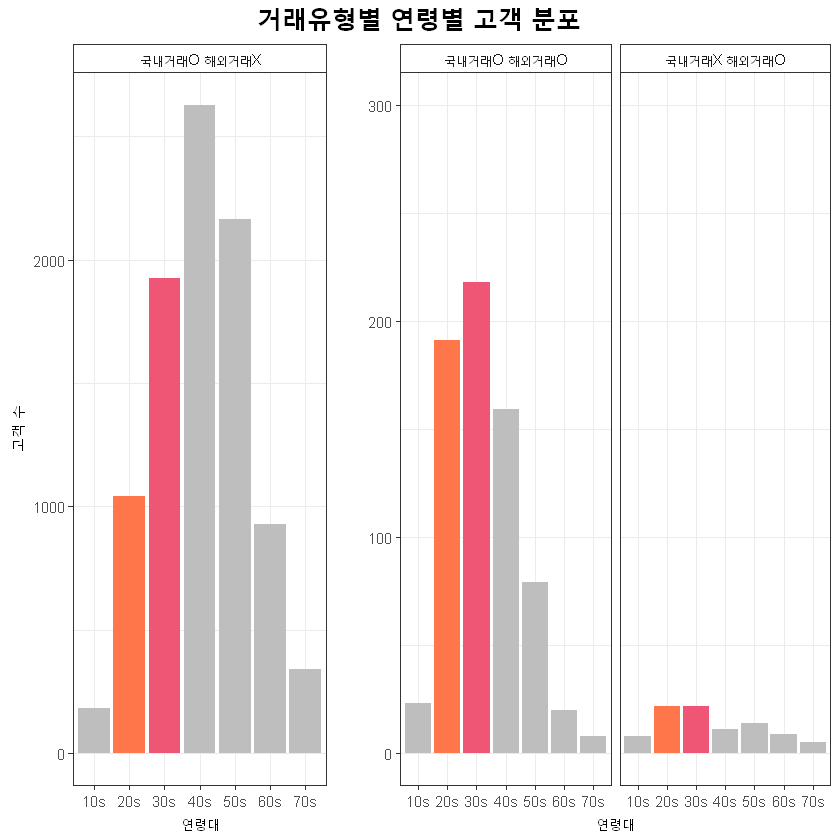

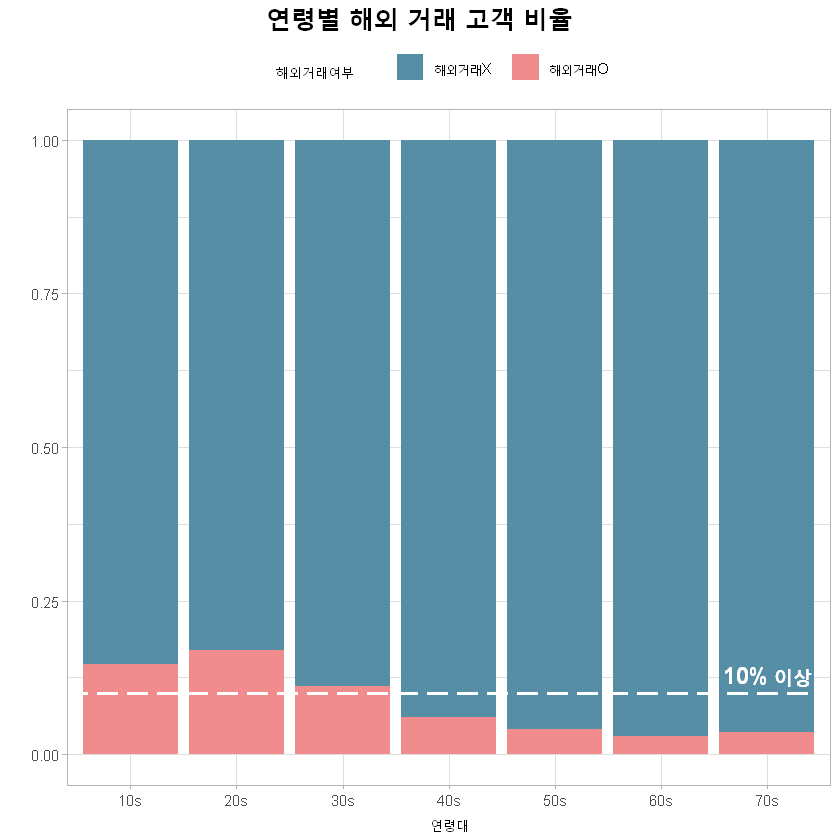

In [21]:
#국내/해외 거래 여부
cus_info$trd_kr <- ifelse(cus_info$cus_id %in% trd_kr$cus_id, 1, 0)
cus_info$trd_oss <- ifelse(cus_info$cus_id %in% trd_oss$cus_id, 1, 0)

cus_info <- cus_info %>% 
  mutate(trd_type = ifelse(trd_kr == 1 & trd_oss == 1,
                           '국내거래O 해외거래O', 
                           ifelse(trd_kr==1 & trd_oss == 0,
                                  '국내거래O 해외거래X',
                                  ifelse(trd_kr==0 & trd_oss == 1, '국내거래X 해외거래O', 0))))

p1 <- cus_info %>% filter(trd_type == '국내거래O 해외거래X') %>% group_by(trd_type, age_group, yz) %>% summarise(n=n()) %>%  
  ggplot() + geom_col(aes(x=age_group, y=n, fill=age_group)) + facet_wrap(~trd_type) +
  scale_fill_manual(values=age_color_yz) +
  guides(fill = FALSE) + 
  theme_bw() + labs(x = '연령대', y = '고객 수') +
  theme(strip.background = element_rect(fill='white'))

p2 <- cus_info %>% filter(trd_type != '국내거래O 해외거래X') %>% group_by(trd_type, age_group, yz) %>% summarise(n=n()) %>%  
  ggplot() + geom_col(aes(x=age_group, y=n, fill=age_group)) + facet_wrap(~trd_type) +
  scale_fill_manual(values = age_color_yz) +
  guides(fill = FALSE) + ylim(c(0, 300)) +
  theme_bw() + labs(x = '연령대', y = '')+
  theme(strip.background = element_rect(fill='white'))

annotate_figure(ggarrange(p1, p2, widths = c(1, 1.5)), top=text_grob('거래유형별 연령별 고객 분포', face='bold', size=18))

annotate_figure(
  cus_info %>% group_by(trd_oss, age_group) %>% summarise(n=n()) %>% 
    ggplot() + geom_bar(aes(x=age_group, y=n, fill=factor(trd_oss)), stat="identity", position="fill") + 
    theme_light() + labs(x='연령대', y='', fill = '해외거래여부') +
    theme(legend.position = "top") +
    scale_fill_manual(values=two_color, breaks=c('0', '1'),
                      labels=c('해외거래X', '해외거래O')) +
    geom_hline(yintercept=0.1, linetype= "longdash", color='white', size=1) +
    annotate("text", x=c(cus_info$age_group[3]), y=0.13,
             label="10% 이상", size = 5, fontface=2, color = "white"),
  top=text_grob('연령별 해외 거래 고객 비율', face='bold', size=18)) 


- 국내 주식 거래만 하는 고객의 연령 분포는 전체 고객의 연령 분포와 비슷한 분포를 보입니다. 그러나 **해외 주식을 거래하는 고객은 국내 거래 여부와 관계없이 2030세대가 다른 연령대보다 월등히 많은 것**을 볼 수 있습니다.  
    
    
-  연령별 전체 고객 중 해외 거래 고객의 비율을 보면 10대, 20대, 30대 모두 10% 이상으로 기성세대보다 높은 것을 확인할 수 있습니다. 전체 고객 중 해외 거래 여부 비율이 높은 편은 아니지만, **상대적으로 10,20,30대의 젊은 투자자들의 해외거래 고객 비중이 높은 것**은 눈에 띄는 특징입니다. 이러한 양상은 *어릴 때부터 외국 문화를 가까이 접한 YZ세대가 해외 주식에 대한 장벽을 상대적으로 덜 느끼기 때문*이라고 추측할 수 있습니다.   



### 1-4. 종목 데이터 탐색  

#### 1-4-1 국내 종목 EDA 

##### 1) YZ세대 선호 종목 시각화 

YZ세대 투자자들이 선호하는 종목들을 알아보겠습니다. <U>20대 남성, 20대 여성, 30대 남성, 30대 여성</U> 으로 구분하여 각 성별 연령별로 가장 많이 거래한 종목 30가지를 워드클라우드를 활용해 시각화했습니다. 


`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


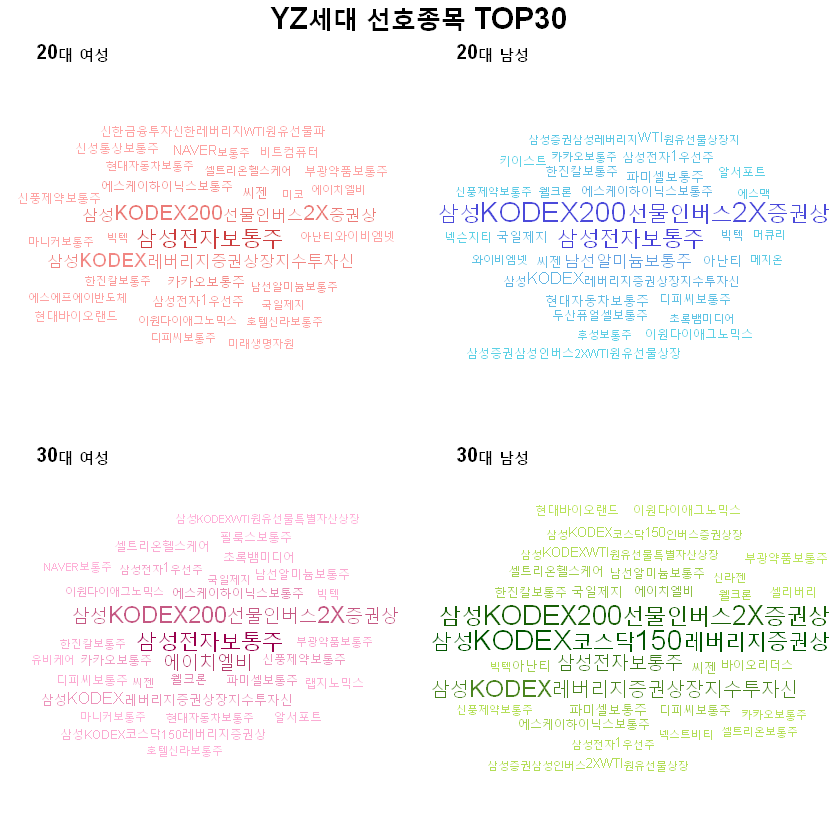

In [22]:
# TOP30 데이터프레임 생성 
w1 <- trd_kr %>% filter(age_group == "20s"&sex_dit_cd=='F') %>% group_by(iem_krl_nm) %>% summarise(n=n()) %>%
  arrange(desc(n)) %>% head(30) %>% mutate(iem_krl_nm = substr(str_replace_all(iem_krl_nm, ' ', ''), 1, 20))

w2 <- trd_kr %>% filter(age_group == "20s"&sex_dit_cd=='M') %>% group_by(iem_krl_nm) %>% summarise(n=n()) %>%
  arrange(desc(n)) %>% head(30) %>% mutate(iem_krl_nm = substr(str_replace_all(iem_krl_nm, ' ', ''), 1, 20))

w3 <- trd_kr %>% filter(age_group == "30s"&sex_dit_cd=='F') %>% group_by(iem_krl_nm) %>% summarise(n=n()) %>%
  arrange(desc(n)) %>% head(30) %>% mutate(iem_krl_nm = substr(str_replace_all(iem_krl_nm, ' ', ''), 1, 20))

w4 <- trd_kr %>% filter(age_group == "30s"&sex_dit_cd=='M') %>% group_by(iem_krl_nm) %>% summarise(n=n()) %>%
  arrange(desc(n)) %>% head(30) %>% mutate(iem_krl_nm = substr(str_replace_all(iem_krl_nm, ' ', ''), 1, 20))

set.seed(1234)

p1 <- w1 %>% ggplot(aes(label = iem_krl_nm, size = n, color=n)) +
  scale_size_area(max_size = 6) +
  geom_text_wordcloud() +
  scale_color_continuous(low='#FFA7A7', high = '#CC3D3D')+
  theme_minimal()

p2 <- w2 %>% ggplot(aes(label = iem_krl_nm, size = n, color=n)) +
  scale_size_area(max_size = 6) +
  geom_text_wordcloud() +
  scale_color_continuous(low='#5CD1E5', high='#4641D9')+
  theme_minimal()

p3 <- w3 %>% ggplot(aes(label = iem_krl_nm, size = n, color=n)) +
  scale_size_area(max_size = 6) +
  geom_text_wordcloud() +
  scale_color_continuous(low='#FFB2D9', high='#99004C')+
  theme_minimal()

p4 <- w4 %>% ggplot(aes(label = iem_krl_nm, size = n, color=n)) +
  scale_size_area(max_size = 6) +
  geom_text_wordcloud() +
  scale_color_continuous(low='#BCE55C', high='#005500')+
  theme_minimal()

annotate_figure(
  ggarrange(p1,p2,p3,p4, nrow=2, ncol=2,
            labels = c('20대 여성', '20대 남성', '30대 여성', '30대 남성'),
            font.label = list(size = 12, color = "black")),
  top=text_grob('YZ세대 선호종목 TOP30', face='bold', size=18))


- 20, 30대 투자자가 가장 많이 거래하는 종목에 모두 ***삼성전자보통주***가 공통적으로 상위권에 존재하고 있습니다. 삼성전자가 국내 시가총액 1위의 기업인 만큼 통상적으로 안정적인 종목으로 여겨지기 때문이라 예상됩니다. 또한 4차 산업혁명 시대에 발맞추어 반도체와 전자기기 산업이 유망하다고 여겨지는 만큼 가치주로 인식되는 경향도 있다고 판단됩니다.   
  삼성전자보통주 이외에도 에스케이하이닉스보통주, 카카오보통주 등 **시가총액 순위권에 있는 우량주**가 주로 선호되는 종목으로 보입니다. 
  
  
- 20,30대의 두드러지는 특징은 **선물이나 레버리지 펀드 상품**을 많이 거래한다는 것입니다. ***삼성KODEX선물인버스2X증권*** 상품이 모두 순위권에 있음을 확인 할 수 있습니다. 특히 **30대 남성**은 삼성전자보통주 등의 우선주보다 펀드 상품을 더 많이 거래했습니다. 위험성이 높지만 수익성을 추구하며 YZ세대 중에서도 보다 **적극적인 투자**를 하는 것을 보입니다.   

워드클라우드 시각화를 통해 2030세대의 선호 종목을 간단히 살펴보았습니다. 보다 깊이 있는 분석을 위해 외부데이터를 활용하여 주식 종목 데이터를 탐색하고자 했습니다.  

먼저 국내종목정보 데이터셋을 생성하여 종목코드를 기준으로 종류를 나누어 보았습니다. 주어진 종목코드의 첫 알파벳글자는 **단축속성코드**로 종목의 종류를 알려주는 정보입니다. 먼저 7자리와 9자리 종목코드들을 구분하고 각 단축속성코드 별로 몇 개의 유니크한 종목 개수가 있는지 알아보았습니다. 


In [23]:
# 국내종목정보 데이터셋 생성
kr_iem_info <- iem_info %>% filter(iem_cd %in% trd_kr$iem_cd)

## 국내주식 종목코드 분해 
#str_sub(unique(trd_kr$iem_cd),1,1) %>% table() # A F J Q
#trd_kr$iem_cd %>% str_length() %>% table() #  7 9

# 종목코드 9자리 
kr_iem_info %>% filter(str_length(iem_cd)==9) %>%
  mutate(단축속성코드 = str_sub(iem_cd, 1,1)) %>% 
  group_by(단축속성코드) %>% summarise('종목 개수'=n()) 
#F: 수익증권 J: 신주인수권


# 종목코드 7자리 (단축속성코드 1자리, 발행체고유코드 5자리, 종목구분코드 1자리)
kr_iem_info %>% filter(str_length(iem_cd)==7) %>%
  mutate(단축속성코드 = str_sub(iem_cd,1,1)) %>% 
  group_by(단축속성코드) %>% summarise('종목 개수'=n())   
# A: 주권 J:주식워런트증권 Q:상장지수증권

`summarise()` ungrouping output (override with `.groups` argument)


단축속성코드,종목 개수
F,1
J,74


`summarise()` ungrouping output (override with `.groups` argument)


단축속성코드,종목 개수
A,2623
J,471
Q,98


각 단축속성코드별로 어떤 주식 종목이 있는지 예시를 살펴보았습니다. 

In [24]:
# 단축코드 9자리 종목 종류
print("신주인수권"); kr_iem_info %>% filter(str_length(iem_cd)==9 & str_sub(iem_cd,1,1)=="J") %>% head(2) 
print("수익증권"); kr_iem_info %>% filter(str_length(iem_cd)==9 & str_sub(iem_cd,1,1)=="F") %>% head() 

# 단축코드 7자리 종목 종류
print("주권"); kr_iem_info %>% filter(str_sub(iem_cd,1,1)=="A") %>% head(2) 
print("주식워런트증권(ELW)"); kr_iem_info %>% filter(str_length(iem_cd)==7 & str_sub(iem_cd,1,1)=="J") %>% head(2) 
print("상장지수증권(ETN)");kr_iem_info %>% filter(str_sub(iem_cd,1,1)=="Q") %>% head(2) 

kr_iem_info <- kr_iem_info %>%
  mutate(type = ifelse(str_sub(iem_cd,1,1)=="F", "F",
                       ifelse(str_length(iem_cd)==7 & str_sub(iem_cd,1,1)=="J", "ELW",
                              ifelse(str_length(iem_cd)==9 & str_sub(iem_cd,1,1)=="J", "J",
                                     ifelse(str_sub(iem_cd,1,1)=="Q", "ETN", "A")))))

[1] "신주인수권"


iem_cd,iem_eng_nm,iem_krl_nm
J00102216,PAPERCOREA 3WR,페이퍼코리아 3WR
J01286019,MOBASE ELECTRONICS 14R,모베이스전자 14R


[1] "수익증권"


iem_cd,iem_eng_nm,iem_krl_nm
F74401777,MIRAE ASSET MAPS US REAL ESTATE INVESTMENT TRUST 11,미래에셋맵스미국부동산투자신탁11호


[1] "주권"


iem_cd,iem_eng_nm,iem_krl_nm
A000060,Meritz Fire & Marine Insurance,메리츠화재해상보험보통주
A000120,CJ LOGISTICS,씨제이대한통운보통주


[1] "주식워런트증권(ELW)"


iem_cd,iem_eng_nm,iem_krl_nm
J52DF79,MIRAE ASSET DAEWOO ELW DF79,미래에셋대우(주) 주식워런트증권 제DF79호
J52DF86,MIRAE ASSET DAEWOO ELW DF86,미래에셋대우(주) 주식워런트증권 제DF86호


[1] "상장지수증권(ETN)"


iem_cd,iem_eng_nm,iem_krl_nm
Q500005,Shinhan Investment Shinhan Inverse Brent Futures ETN(H) 5,신한금융투자 신한 인버스 브렌트원유 선물 파생결합증권(상장지
Q500011,Shinhan Investment Shinhan Dollar Index Futures ETN(H) 11,신한금융투자 신한 달러인덱스 선물 파생결합증권(상장지수증권)


아래의 사진은 국내 종목코드를 코드 자릿수와 단축속성코드별로 구분하여 정리한 것입니다. 국내 주식종목 데이터의 종류는 다음과 같습니다.  
저희는 속성코드에 따라 국내 주식을 ***주권, 상장지수증권(ETN), 주식워런트증권(ELW), 신주인수권, 수익증권*** 으로 구분하는 type 변수를 생성했습니다.

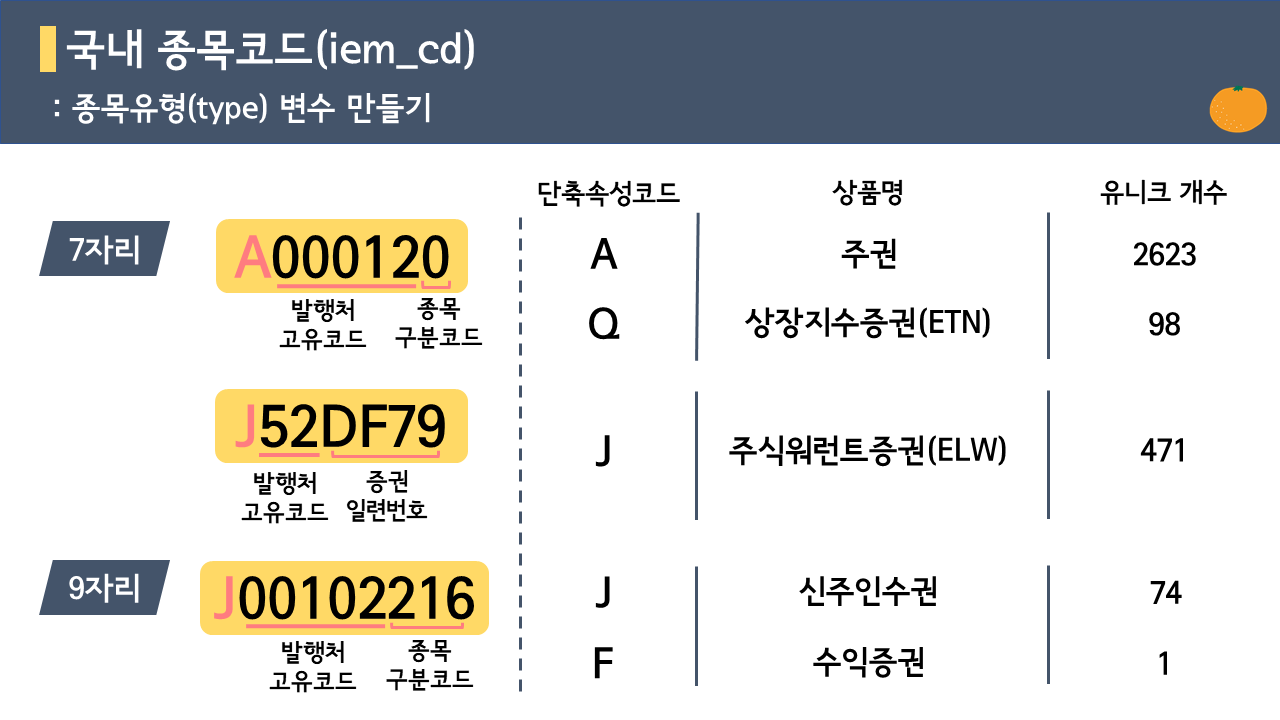

In [25]:
display_png(file="PPT/슬라이드2.png")

##### 2) 종목 유형별 거래량 시각화
종목 데이터를 거래 데이터와 병합하여 종목유형별 거래건수를 알아보았습니다.   
*여기서 종목유형은 위에서 구분한 주권, ELW, ETN, 수익펀드, 신주인수권 상품입니다.*

`summarise()` ungrouping output (override with `.groups` argument)


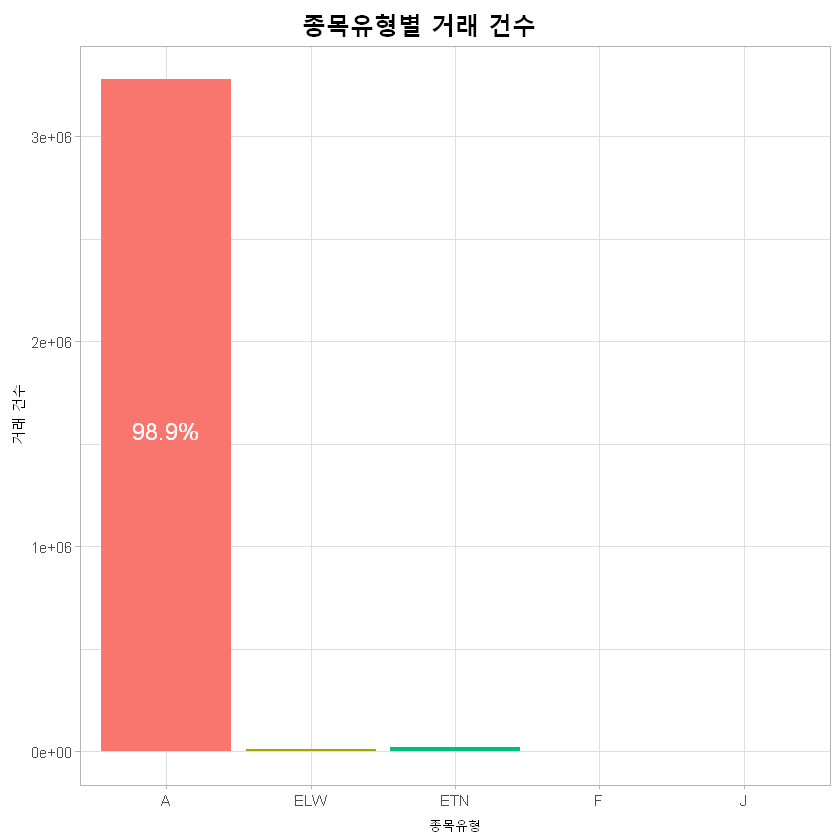

In [26]:
# 거래 데이터에 join
trd_kr <- left_join(trd_kr, kr_iem_info, by=c("iem_cd", "iem_eng_nm", "iem_krl_nm"))

# 종목유형별 거래건수 
t1 <- trd_kr %>% group_by(type) %>% summarise(n=n()) %>% mutate(perc=round(n/sum(n)*100, 1)) 

annotate_figure(
    t1 %>%   ggplot(aes(x=type, y=n)) + geom_col(aes(fill=type)) + 
    geom_text(label=c(paste0(t1$perc[1],'%')), vjust=20, size=5, color='white') +
    theme_light() +
    labs(x= '종목유형', y='거래 건수') + guides(fill = FALSE),
    top = text_grob('종목유형별 거래 건수', face='bold', size=20))

 - 국내 거래 종목 대부분이 A로 시작하는 주권입니다. 따라서 외부 데이터를 사용하여 **주권** 종목정보를 더 자세히 살펴보기로 하였습니다. 
 
 외부데이터는 ***한국거래소(KRX)에서 제공하는 시장(KOSPI, KOSDAQ)별 상장기업종목 정보***와 ***WICS(WISE 국제 산업 분류 표준)에서 크롤링한 종목별 섹터 정보***를 사용하였습니다. 먼저 외부데이터와 병합할 수 있도록 단축속성코드를 뗀 6자리 종목코드 변수를 생성하였습니다.

In [27]:
# 6자리 종목코드 변수 생성
kr_iem_info <- kr_iem_info %>%
  mutate(code = ifelse(type %in% c("A","ETN", "ETF"), str_sub(iem_cd,2,7), iem_cd))  # J,F 그대로

# 한국거래소(KRX) 상장기업정보 데이터 불러오기 
KOSPI <- fread("KOSPI.csv",
               header = T,
               stringsAsFactors = F,
               colClasses = 'character',
               data.table = F,
               encoding = "UTF-8")
KOSDAQ <- fread("KOSDAQ.csv",
                header = T,
                stringsAsFactors = F,
                colClasses = 'character',
                data.table = F,
                encoding = "UTF-8")

# WICS 섹터정보 크롤링 데이터 불러오기 
KOR_sector <- fread("KOR_sector.csv",
                    header=T, 
                    stringsAsFactors=F,
                    colClasses='character',
                    data.table=F)

#전처리
KOSPI <- KOSPI %>% select("종목코드", "기업명", "업종") %>% mutate("구분"="KOSPI")
KOSDAQ <- KOSDAQ %>% select("종목코드", "기업명", "업종") %>% mutate("구분"="KOSDAQ")
KRX.data <- rbind(KOSPI, KOSDAQ)

kr_iem_info <- left_join(kr_iem_info, KRX.data, by =c("code" = "종목코드"))
kr_iem_info <- left_join(kr_iem_info, KOR_sector %>% select(SEC_CD, SEC_NM_KOR, CMP_CD), by=c("code"="CMP_CD"))


# 예시
kr_iem_info %>% filter(str_sub(code,1,5)=="00007") # 삼양홀딩스 
kr_iem_info %>% filter(str_sub(code,1,5)=="00022") # 유유제약 

iem_cd,iem_eng_nm,iem_krl_nm,type,code,기업명,업종,구분,SEC_CD,SEC_NM_KOR
A000075,SAMYANGHOLDINGS(1P),삼양홀딩스1우선주,A,000075,NA,NA,NA,NA,NA
A000070,SAMYANGHOLDINGS,삼양홀딩스보통주,A,000070,삼양홀딩스,기타 금융업,KOSPI,G30,필수소비재


iem_cd,iem_eng_nm,iem_krl_nm,type,code,기업명,업종,구분,SEC_CD,SEC_NM_KOR
A000220,YuyuPharma,유유제약보통주,A,000220,유유제약,의약품 제조업,KOSPI,G35,건강관리
A000225,YuyuPharma(1P),유유제약1우선주,A,000225,NA,NA,NA,NA,NA
A000227,YuyuPharma(2PB),유유제약2우선주(신형),A,000227,NA,NA,NA,NA,NA


우선주가 있다면 동일 기업의 보통주도 있다는 것을 파악할 수 있습니다. **발행체고유코드(종목코드 앞 5자리)가 같다면 같은 기업에서 발행된 종목으로 업종과 상장된 시장이 같다고 예상할 수 있습니다.**  위의 두 기업 ***삼양홀딩스***와 ***유유제약***의 예시를 통해  발행체고유코드가 같은 종목은 같은 기업의 종목인 것을 알 수 있습니다. 따라서 발행체고유코드(public) 변수를 생성하여 이를 기준으로 우선주 종목의 결측치를 채웠습니다. 

In [28]:
# 발행체(public) 변수 생성
kr_iem_info <- kr_iem_info %>% mutate(public = ifelse(type== "A", str_sub(iem_cd, 2,6), NA)) 

# 보통주 데이터셋 생성
common_share <- kr_iem_info %>% filter(!is.na(기업명)) 

# 우선주 구분 
kr_iem_info <- kr_iem_info %>% 
  mutate(type2=ifelse(!(is.na(기업명)), "보통주",
                      ifelse(is.na(기업명) & public %in% common_share$public, "우선주", NA)))

#우선주 데이터 결측치 처리
kr_iem_info <- rbind(kr_iem_info %>% filter(type2 != "우선주"| is.na(type2)), 
                     left_join(kr_iem_info %>% filter(type2 == "우선주") %>%
                                 select(-c(기업명, 업종, 구분, SEC_CD, SEC_NM_KOR)), 
                               common_share %>% select(기업명, 업종, 구분, SEC_CD, SEC_NM_KOR, public),
                               by = "public"))

# 예시로 확인
kr_iem_info %>% filter(str_sub(code,1,5)=="00593") # 삼성전자 종목으로로 확인! 우선주 결측치 잘 채워짐

# 남은 결측치들은?  ETF 혹은 장외종목 
kr_iem_info$type2 <- ifelse(str_detect(kr_iem_info$iem_eng_nm, "ETF") |
                              (str_detect(kr_iem_info$iem_krl_nm, "상장지수") &  kr_iem_info$type == "A"), "ETF", kr_iem_info$type2)

iem_cd,iem_eng_nm,iem_krl_nm,type,code,기업명,업종,구분,SEC_CD,SEC_NM_KOR,public,type2
A005930,SamsungElectronics,삼성전자보통주,A,005930,삼성전자,통신 및 방송 장비 제조업,KOSPI,G45,IT,00593,보통주
A005935,SamsungElectronics(1P),삼성전자1우선주,A,005935,삼성전자,통신 및 방송 장비 제조업,KOSPI,G45,IT,00593,우선주


우선주 데이터를 처리하고 남은 주권 종목에서의 결측치들은 ETF 상품 혹은 장외종목이었습니다. 따라서 'ETF' 또는 '상장지수' 라는 단어가 종목명에 들어간 주권 종목들은 ETF로 구분하였고, 나머지 결측치들은 장외종목으로 구분하였습니다.   

##### 3) 주권 종목유형별 거래량 시각화 
거래건수가 가장 많은 **주권 종목**의 종류 ***(보통주, 우선주, ETF)*** 별로 거래건수를 시각화해보겠습니다. 

`summarise()` regrouping output by 'type2' (override with `.groups` argument)
`summarise()` regrouping output by 'type2' (override with `.groups` argument)
`summarise()` regrouping output by 'type2' (override with `.groups` argument)


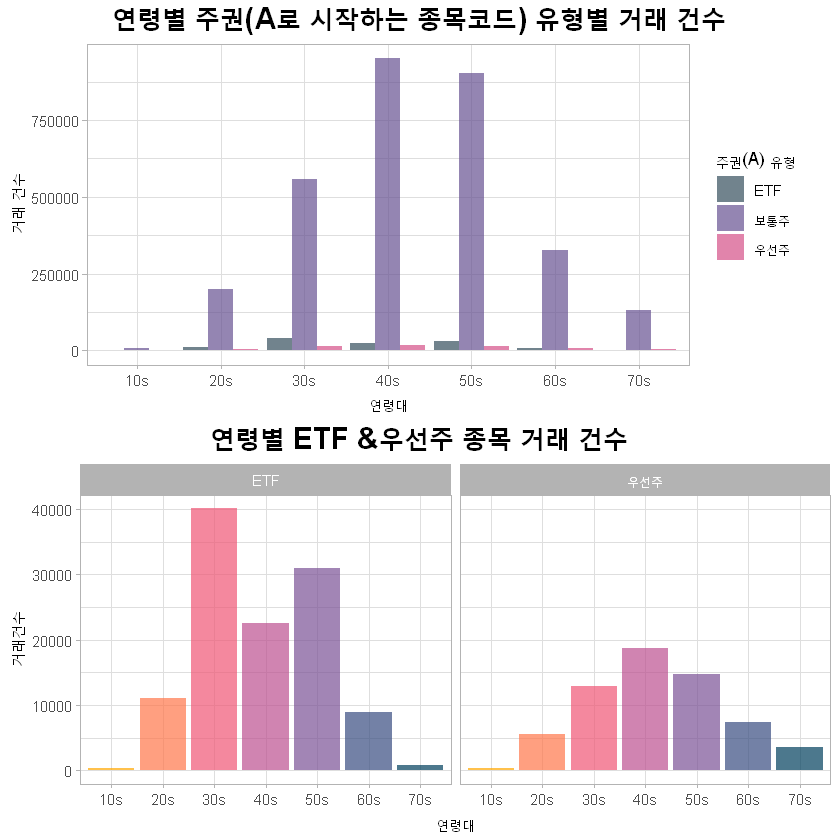

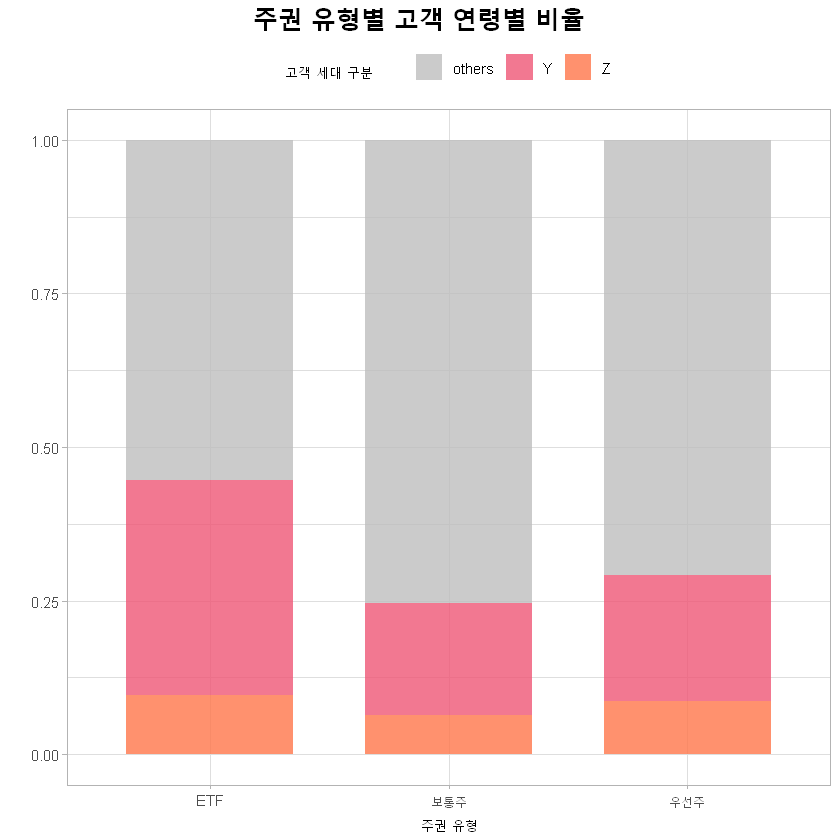

In [29]:
# 거래 데이터에 join
trd_kr <- left_join(trd_kr, kr_iem_info, by = c("iem_cd", "iem_krl_nm", "iem_eng_nm", "type"))

# 연령별 종목구분별 거래건 수 
grid.arrange(
  annotate_figure(
    trd_kr %>% group_by(type2, age_group) %>% summarise(n=n()) %>% drop_na() %>%  
    ggplot() + geom_col(aes(x=age_group, y=n, fill = type2), position = "dodge", alpha=.7) + 
    theme_light() + scale_fill_manual(values=ten_colors[c(1,4,6,10)])+
    labs(x = '연령대', y = '거래 건수', fill = '주권(A) 유형'),
      top=text_grob("연령별 주권(A로 시작하는 종목코드) 유형별 거래 건수", face='bold', size=18)), 
  
  annotate_figure(
    trd_kr %>% group_by(type2, age_group) %>% summarise(n=n()) %>%
    filter(type2 != "보통주") %>%
    ggplot() + geom_col(aes(x=age_group, y=n, fill = age_group), alpha=.7) + facet_wrap(~type2) +
    theme_light() + scale_fill_manual(values=age_color) +
    labs(x='연령대', y='거래건수', fill = '주권(A)유형') +
    theme(legend.position='none'),
      top=text_grob("연령별 ETF &우선주 종목 거래 건수", face='bold', size=18))
) 

annotate_figure(
  trd_kr %>% group_by(type2, yz) %>% summarise(n=n()) %>% drop_na() %>% 
  ggplot() + geom_bar(aes(x=type2, y=n, fill=yz), width=.7, stat="identity", position="fill", alpha=.8) +
  theme_light() + scale_fill_manual(values=yz_color) +
  labs(x='주권 유형', y='', fill='고객 세대 구분') + theme(legend.position = 'top'),
  top=text_grob('주권 유형별 고객 연령별 비율', face='bold', size=18))

- 주권 유형별 거래건수는 보통주가 압도적으로 높았기 때문에 보통주를 제외한 **ETF와 우선주 종목의 연령별 거래 건수**를 살펴보았습니다. *보통주 거래가 많은 이유는 보통주 종목이 가장 많았기 때문에 당연한 결과라고 판단하였습니다. 대신 20,30대의 특성을 위주로 파악하기 위해 다른 상품들을 집중적으로 살펴보았습니다.* 

- **ETF 종목의 경우 30대의 거래량이 다른 연령대보다 매우 높은 양상**을 보입니다. 실제로 ETF 종목 거래 고객 중 YZ세대의 비중이 50퍼센트에 가까운 것을 알 수 있습니다. 

##### 4) ETF, ETN, 레버리지 종목 거래량 시각화    
YZ세대 선호종목 시각화와  상위의 ETF 종목 거래량 시각화에서 알 수 있듯이, 30대 투자자들은 특히 수익성과 위험성이 높은 펀드상품을 선호하는 경향을 보입니다. 따라서 밀레니얼 세대 투자자들이 실제로 위험성이 높은 상품을 얼마나 많이 거래하는지 알아보기 위해 ETF, ETN 상품, 그리고 위험성이 높은 레버리지 종목의 연령별 성별 종목 거래량을 시각화했습니다. 

`summarise()` regrouping output by 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)


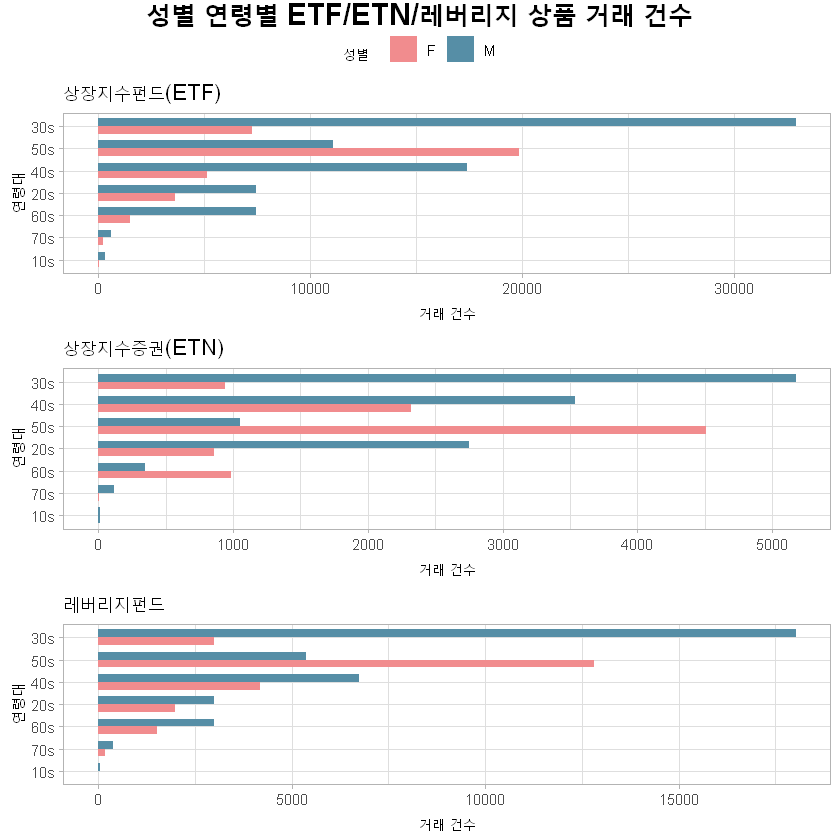

In [30]:
# ETF
p1 <- trd_kr %>% filter(type2 == "ETF") %>% group_by(age_group, sex_dit_cd) %>% summarise(n=n()) %>% 
  ggplot() + 
  geom_col(aes(x=reorder(age_group,n), y=n, fill=sex_dit_cd), width=.7, position ='dodge') +
  theme_light() + scale_fill_manual(values=sex_color) +
  labs(title='상장지수펀드(ETF)', x = '연령대', y = '거래 건수', fill = '성별') +
  coord_flip()

# ETN
p2 <- trd_kr %>% filter(type == "ETN") %>% group_by(age_group, sex_dit_cd) %>% summarise(n=n()) %>% 
  ggplot() + 
  geom_col(aes(x=reorder(age_group,n), y=n, fill = sex_dit_cd),  width=.7, position='dodge') +
  theme_light() + scale_fill_manual(values=sex_color) +
  labs(title = '상장지수증권(ETN)', x = '연령대', y = '거래 건수', fill = '성별') + 
  coord_flip()

# Leverage 
p3 <- trd_kr %>% filter(str_detect(iem_krl_nm, "레버리지")) %>% group_by(age_group, sex_dit_cd) %>% summarise(n=n()) %>% 
  ggplot() +
  geom_col(aes(x=reorder(age_group,n), y=n, fill=sex_dit_cd),  width=.7, position='dodge') +
  theme_light() + scale_fill_manual(values=sex_color)+
  labs(title='레버리지펀드', x='연령대', y='거래 건수', fill='성별') + coord_flip()

annotate_figure(ggarrange(p1, p2, p3, common.legend = T, nrow=3),
                top=text_grob('성별 연령별 ETF/ETN/레버리지 상품 거래 건수', face='bold', size=18))

- 상장지수펀드(ETF)와 상장지수펀드(ETN), 레버리지펀드 모두 **30대 남성 고객**의 거래량이 두드러지게 높습니다.   
   
   
- 특히 레버리지 상품의 경우 30대 남성의 거래량이 18000건 이상으로 매우 높은 것을 볼 수 있는데, 레버리지 상품이 수익성과 위험성 모두 높은 상품인 만큼 **적극적인 투자 성향**을 갖고 있다고 볼 수 있습니다.     
  
  *(번외로 50대 여성이 30대 남성 다음으로 ETF, ETN, 레버리지 펀드를 많이 거래하는 것으로 드러나는데, 50대 여성 역시 펀드형 투자를 선호하는 경향이 있다고 볼 수 있습니다.)*

##### 5) 섹터별 거래량 시각화  
 
크롤링한 종목의 섹터정보를 활용하여 섹터별 거래량 추이와 거래 증가율을 비교해보도록 하겠습니다. 또한 연령대별 섹터별 증가율도 시각화하여 YZ세대의 거래 증가율 정도도 알아보도록 하겠습니다. 

`summarise()` regrouping output by 'ym' (override with `.groups` argument)
`summarise()` regrouping output by 'year(orr_dt)' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


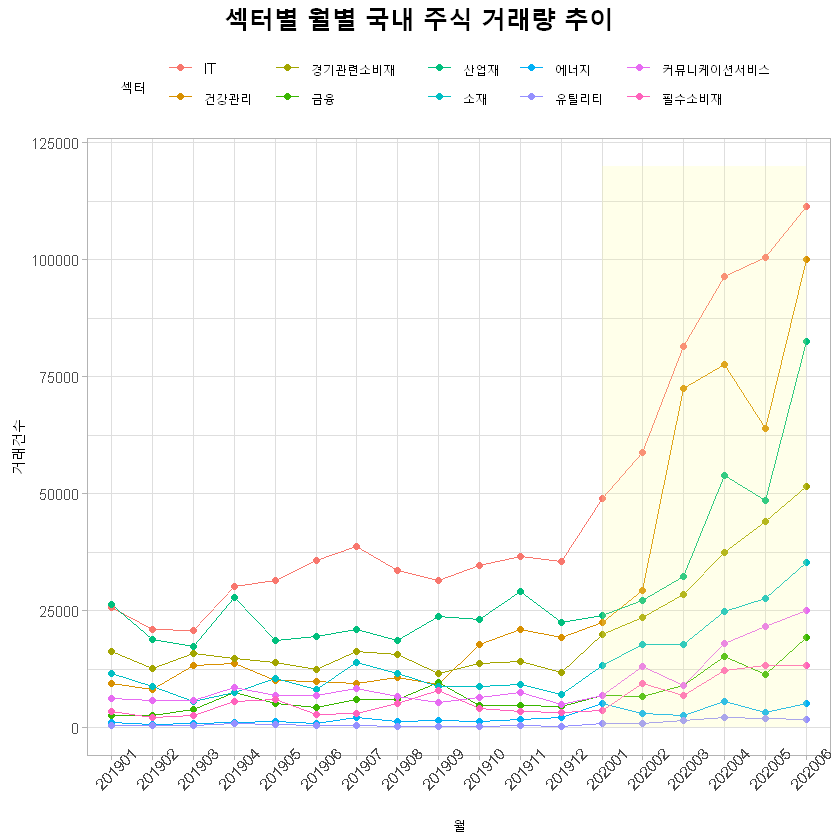

`summarise()` regrouping output by 'year(orr_dt)', 'SEC_NM_KOR', 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'SEC_NM_KOR', 'age_group' (override with `.groups` argument)


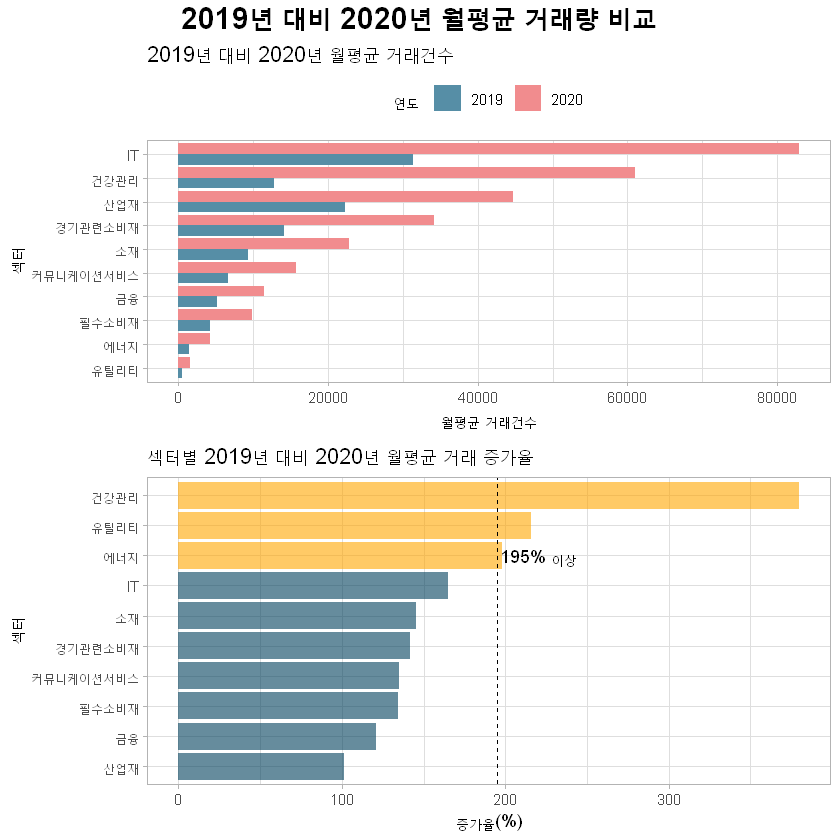

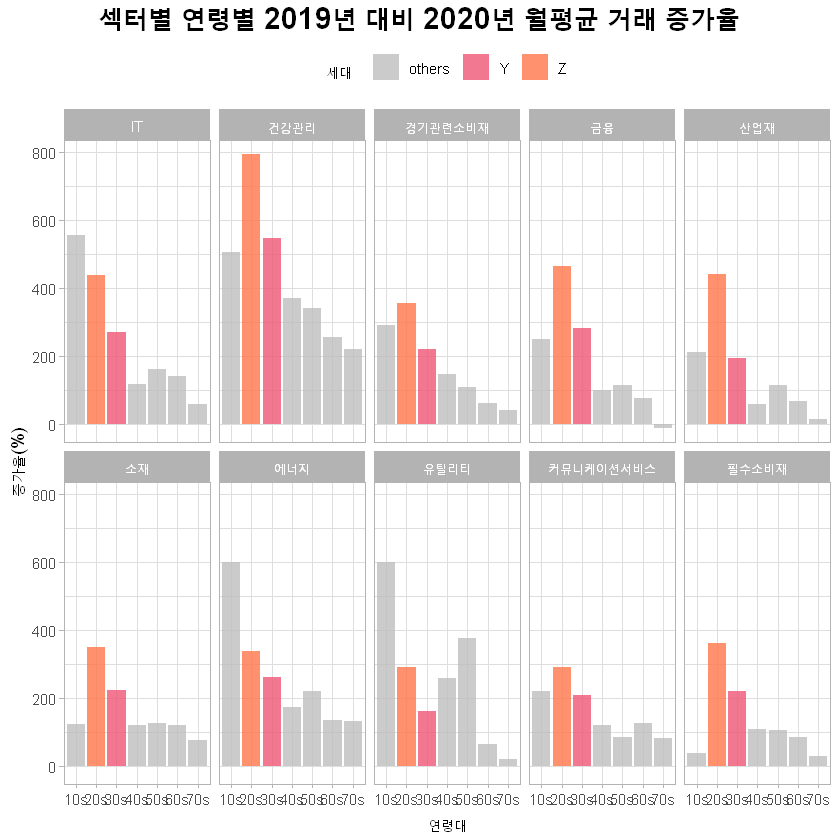

In [31]:
# 섹터별 거래량 추이
annotate_figure(
  trd_kr %>% drop_na(SEC_NM_KOR) %>%
  mutate(year=year(orr_dt), month = month(orr_dt)) %>% 
  mutate_at(vars(year,month), as.character) %>% 
  mutate(month = ifelse(str_length(month) == 1, paste0("0", month), month)) %>% 
  mutate(ym= paste0(year, month)) %>% 
  group_by(ym, SEC_NM_KOR) %>% summarise(n=n()) %>%
  ggplot() + 
  geom_line(aes(x=ym, y=n, color=SEC_NM_KOR, group = SEC_NM_KOR)) +
  geom_point(aes(x=ym, y=n, color=SEC_NM_KOR)) +
  labs(x = '월', y= '거래건수', color ='섹터') +
  theme_light()+ theme(legend.position='top', axis.text.x = element_text(angle = 45)) +
  annotate('rect', xmin='202001', xmax = '202006',
           ymin=0, ymax=120000, alpha=.2, fill='#FDFD97'),
  top=text_grob('섹터별 월별 국내 주식 거래량 추이', face='bold', size=18))


# 섹터별 2019 대비 2020 월평균 거래 증가율
t1 <- trd_kr %>% drop_na(SEC_NM_KOR) %>% group_by(year(orr_dt), SEC_NM_KOR) %>% 
  summarize(n=n()) %>% mutate(month.n = ifelse(`year(orr_dt)` == 2019, round(n/12, 0), round(n/6, 0)))

annotate_figure(ggarrange(
  t1 %>% ggplot() +
  geom_col(aes(x=reorder(SEC_NM_KOR, month.n), y=month.n, fill=factor(`year(orr_dt)`)), position='dodge')+
  theme_light() + scale_fill_manual(values=two_color, name='연도') + coord_flip() +
  labs(x='섹터', y='월평균 거래건수',title='2019년 대비 2020년 월평균 거래건수') + theme(legend.position='top'),

  t1 %>% group_by(SEC_NM_KOR) %>%
  summarize(increase = (month.n[`year(orr_dt)`==2020]-month.n[`year(orr_dt)`==2019])*100/month.n[`year(orr_dt)`==2019]) %>%
  mutate(incrs.col = ifelse(increase>195, '1', '0')) %>% 
  ggplot() +
  geom_col(aes(x=reorder(SEC_NM_KOR, increase), y=increase, fill=incrs.col), alpha=.6) +
  theme_light() + scale_fill_manual(values=ten_colors[c(2,10)]) +
  geom_hline(yintercept = 195, linetype = "dashed", colour= 'black') +
  annotate('text', x='에너지', y=220, label='195% 이상')+
  labs(x='섹터', y='증가율(%)', title='섹터별 2019년 대비 2020년 월평균 거래 증가율') +
  theme(legend.position = 'none')+coord_flip(),
  
  ncol=1),
  top=text_grob('2019년 대비 2020년 월평균 거래량 비교', face='bold', size=18))

# YZ세대의 국내 섹터별 2019 대비 2020 월평균 거래 증가율
t1 <- trd_kr %>% drop_na(SEC_NM_KOR) %>% group_by(year(orr_dt), SEC_NM_KOR, age_group, yz) %>%
  summarize(n=n()) %>% mutate(month.n = ifelse(`year(orr_dt)` == 2019, round(n/12, 0), round(n/6, 0)))

annotate_figure(
  t1 %>% group_by(SEC_NM_KOR, age_group, yz) %>%
    summarize(increase = (month.n[`year(orr_dt)`==2020]-month.n[`year(orr_dt)`==2019])*100/month.n[`year(orr_dt)`==2019]) %>%
    ggplot() +
    geom_col(aes(x=age_group, y=increase, fill=yz), alpha=.8) +
    theme_light() + facet_wrap(SEC_NM_KOR~., nrow=2) +
    scale_fill_manual(values=yz_color, name='세대') +
    labs(x='연령대', y='증가율(%)') + theme(legend.position = 'top'),
  
  top=text_grob('섹터별 연령별 2019년 대비 2020년 월평균 거래 증가율', face='bold', size=18))



- 섹터별 거래량 추이를 보면 2020년 들어서 모든 섹터의 거래량이 증가하는데 **IT > 건강관리 > 산업재 순**으로 거래량이 높습니다. IT 섹터는 2019년에도 거래량이 가장 많았지만 20202년 들어 10만건 이상으로 증가했습니다. 특히 건강관리 섹터는 2020년 이전에 산업재 섹터보다 거래량이 낮은 편이었으나 20년 3월에 들어 거래량이 급증하고 있습니다.   
  
  
- 섹터별 2019년 대비 2020년 거래량 증가율 그래프에서 노란색으로 표시된 IT, 건강관리, 산업재 섹터는 거래건수 증가량이 200%가 넘는 섹터입니다. 추이 그래프에서도 살펴봤듯이 **건강관리 섹터**의 증가율이 다른 섹터보다 매우 높은 것을 확인할 수 있습니다. 이는 코로나-19로 인해 제약 및 바이오 관련주의 인기가 높아졌기 때문이라고 추측할 수 있습니다.   
  
  
- 연령별 증가율 그래프를 보면 IT, 건강관리, 경기관련소비재, 금융, 산업재, 소재, 커뮤니케이션서비스, 필수소비재 등 **대부분의 섹터에서 YZ세대의 거래 증가율이 높은** 것을 확인할 수 있습니다. 이는 YZ세대의 거래량 자체가 증가했으므로 당연한 결과라고 볼 수 있습니다. 


##### 6) 연령별 KOSPI/KOSDAQ 종목 거래량 비교 시각화

다음은 연령별로 KOSPI와 KOSDAQ 시장에 상장된 종목의 거래량을 비교해보도록 하겠습니다. 

`summarise()` regrouping output by '구분' (override with `.groups` argument)


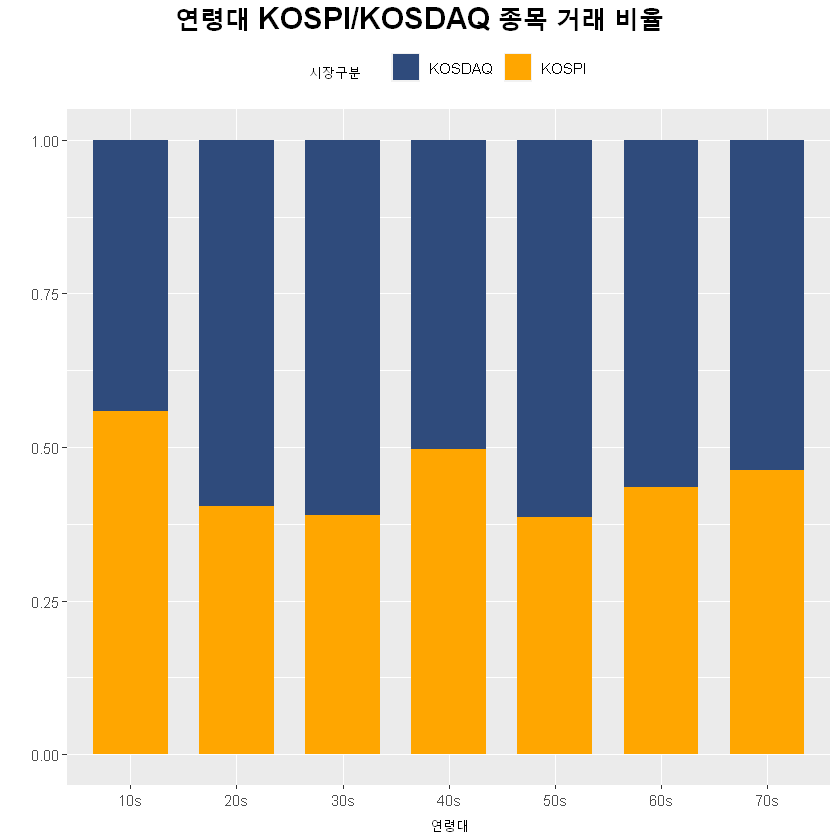

In [32]:
annotate_figure(
  trd_kr %>% group_by(구분, age_group) %>% summarise(n=n()) %>% drop_na() %>% 
  ggplot() + geom_bar(aes(x=age_group, y=n, fill=구분), width=.7, stat="identity", position = "fill") +
  labs(x = '연령대', y='')+theme(legend.position = 'top')+
  scale_fill_manual(values=ten_colors[c(3,10)], name='시장구분'),
  top=text_grob('연령대 KOSPI/KOSDAQ 종목 거래 비율', face='bold', size=18))

- 연령별로 거래하는 종목의 시장구분의 비율이 크게 차이가 나지는 않지만, 20,30대는 코스피보다 코스닥 시장의 종목을 더 많이 거래하는 것으로 보입니다. 코스피에 상장된 우량주식을 주로 거래하는 10대와 달리 YZ세대는 마냥 우량주 주식의 안정성만을 추구하는 투자자는 아니라고 볼 수 있습니다.  


#### 1-4-2 해외 종목정보 EDA


##### 1) 해외 주식 국가별 거래량 비교 시각화

앞부분에서 YZ세대의 투자자들이 기성세대보다 해외 주식거래를 더 활발히 하는 것을 알아보았습니다. 그렇다면 다양한 국가의 해외 주식에서도 어떤 국가의 주식 종목을 더 많이 거래하는지 국가별 거래량을 비교해도록 하겠습니다.   

`summarise()` ungrouping output (override with `.groups` argument)


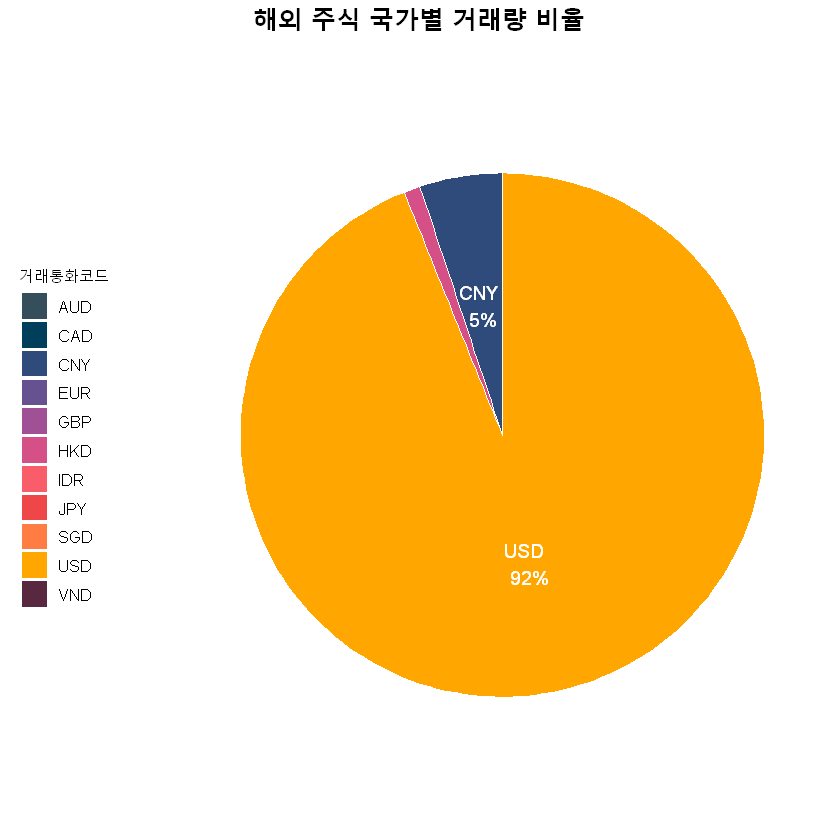

In [33]:
t1 <- trd_oss %>% group_by(cur_cd) %>% summarize(n=n()) %>% mutate(perc=round(n/sum(n),2)*100)

annotate_figure(
   t1 %>%
    ggpie(x='perc', fill='cur_cd',
          label = c(rep('', 2), paste(t1$cur_cd[3],'\n',paste0(t1$perc[3],'%')),
                    rep('', 6), paste(t1$cur_cd[10],'\n',paste0(t1$perc[10], '%')), ''),
          lab.font = c(4, 'bold', 'white'),
          lab.pos='in', color='white', palette = c(ten_colors, '#582841')) +
    labs(x='', y='', fill='거래통화코드')+
    theme(axis.text.y=element_blank(), legend.position="left"),
  top=text_grob('해외 주식 국가별 거래량 비율', face='bold', size=18))


- 위 그래프는 해외 주식 거래데이터 내 국가별 거래량을 비율로 살펴본 것입니다. 이때 ***미국 주식(USD)***이 92%로 가장 많았고, ***중국 주식(CNY)***이 5%로 그 뒤를 이었습니다. 이 두 국가 주식의 거래 건수를 합치면 전체 데이터의 약 97%로, 해외 주식 거래의 대부분이 미국과 중국 주식임을 알 수 있습니다.


`summarise()` regrouping output by 'age_group' (override with `.groups` argument)


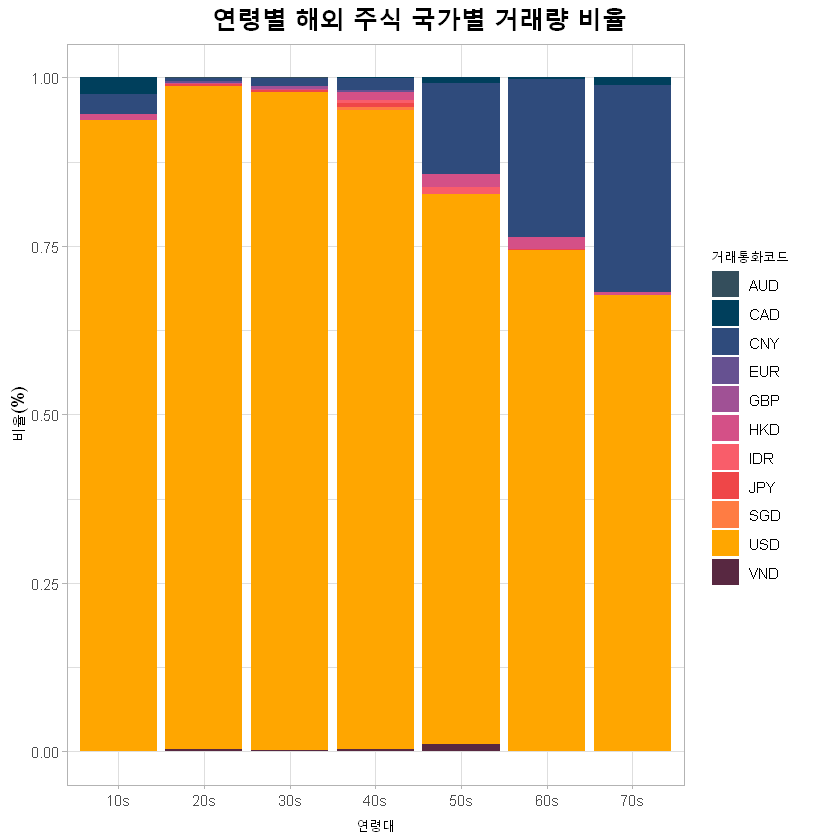

In [34]:
# 연령별 해외 주식 데이터 - 국가 분포
annotate_figure(
  trd_oss %>% group_by(age_group, cur_cd) %>% summarize(n=n()) %>%
  ggplot(aes(x=age_group, y=n, fill=cur_cd)) +
  geom_bar(stat='identity', position='fill') +
  labs(x='연령대', y='비율(%)', fill='거래통화코드') +
  theme_light()+scale_fill_manual(values = c(ten_colors, '#582841')),
  top=text_grob('연령별 해외 주식 국가별 거래량 비율', face='bold', size=18))

- 모든 연령층에서 가장 많이 주식을 거래한 국가는 미국이지민, YZ세대 투자자들은 다른 연령대보다도 ***집중적으로 미국 주식에 투자***하는 모습이 두드러져 보였습니다. 거래 건수가 많지는 않지만 다양한 국가에 투자하는 40대 투자자와 중국 주식 거래율이 높은 50~70대 투자자들과는 상반되는 모습입니다.

YZ세대의 특성 도출이 주된 목표이므로, 여기서는 미국 주식 종목 외부데이터만을 수집하여 분석을 진행하도록 하겠습니다.

In [35]:
# GICS 섹터정보 데이터 불러오기 
nasdaq = fread('NASDAQ_stock_exchange.csv')
nasdaq2 = fread('NASDAQ_global_select.csv')
nyse = fread('NYSE_stock_exchange.csv')
sp500 = fread('S&P500_gics.csv', header=T)

# 거래 데이터에 join
gics = rbind(nasdaq, nasdaq2, nyse); colnames(gics)[8] <- 'GICS'
gics <- gics %>% dplyr::select(Symbol, GICS, ISIN) %>% filter(ISIN != '')
sp500 <- sp500 %>% dplyr::select(Symbol, Sector)
gics = left_join(gics, sp500, by=c('Symbol'='Symbol', 'GICS'='Sector')); gics = gics[!duplicated(gics),]

gics$GICS <- plyr::revalue(gics$GICS, 
                       replace = c("Real Estate"="부동산", "Communication Services"="커뮤니케이션서비스",
                                   "Health Care"="건강관리",  "Information Technology"="정보기술",
                                   'Information technology' = '정보기술',
                                   "Consumer Discretionary"="자유소비재", "Financials"="금융",
                                   "Consumer Staples"="필수소비재", "Industrials"="산업재",
                                   "Materials"="소재", "Energy"="에너지", "Utilities"="유틸리티"))
  ## 영어 -> 한국어: 한국거래소 GICS 산업분류 기준 참고

trd_oss = left_join(trd_oss, gics %>% select(-Symbol), by=c('iem_cd'='ISIN'))

Stock Market MBA에서 제공하는 나스닥(NASDAQ), 뉴욕증시(NYSE), S&P 500에 속한 주식 종목 데이터를 사용했습니다. 이 데이터들은  '국제증권식별번호(ISIN)', '심볼(Symbol)', '글로벌산업분류기준(GICS)' 등이 명시되어 있는데, ISIN은 거래데이터 상의 종목코드(iem_cd)와 대응됩니다. 이를 활용하여 미국 주식 종목을 11가지 섹터로 분류할 수 있는 ***글로벌산업분류기준 파생변수(gics)를 생성***하였습니다.

##### 2) 섹터별 거래량 시각화 

`summarise()` regrouping output by 'ym' (override with `.groups` argument)
`summarise()` regrouping output by 'age_group' (override with `.groups` argument)


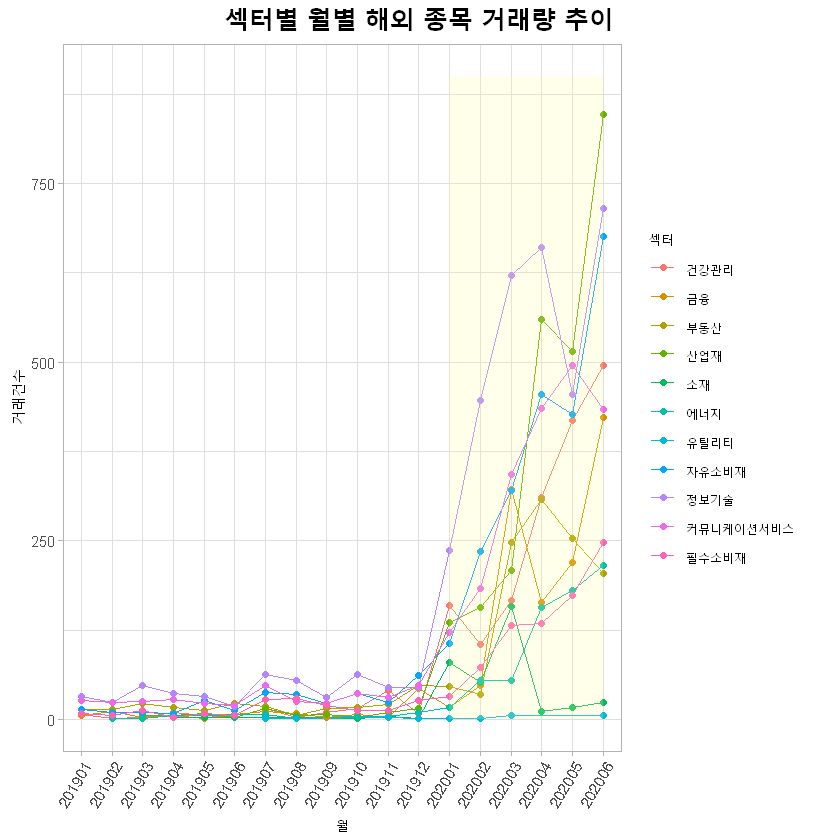

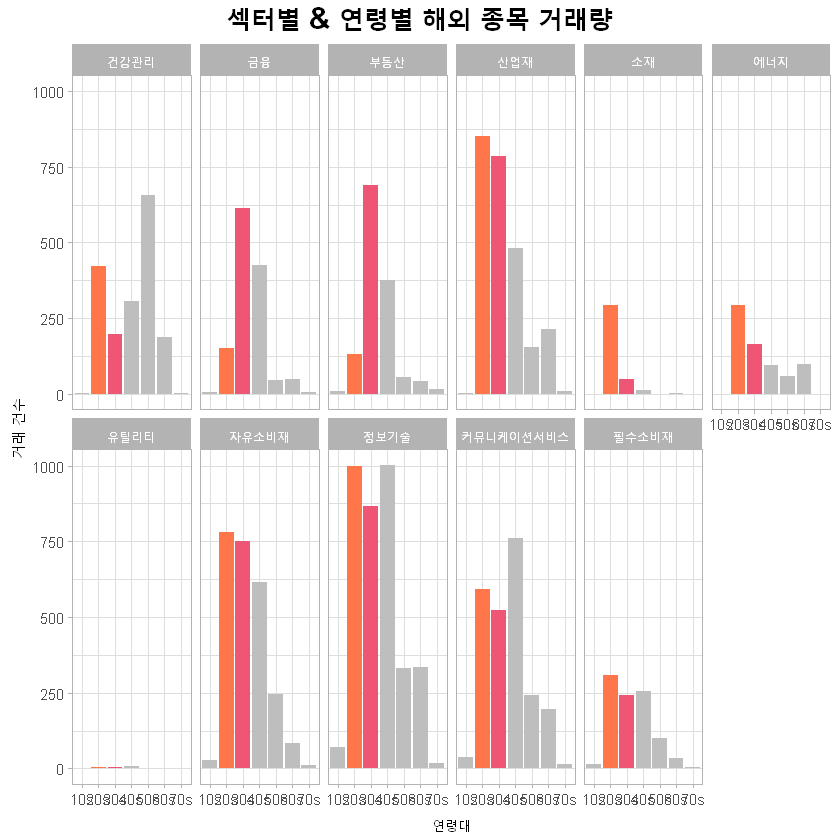

In [36]:
# 섹터별 거래 건수
annotate_figure(
  trd_oss %>% drop_na(GICS) %>% mutate(year=year(orr_dt), month = month(orr_dt)) %>% 
    mutate_at(vars(year,month), as.character) %>% 
    mutate(month = ifelse(str_length(month) == 1, paste0("0", month), month)) %>% 
    mutate(ym = paste0(year, month)) %>% group_by(ym, GICS) %>% summarise(n=n()) %>%
    
    ggplot() + 
    geom_line(aes(x=ym, y=n, color=GICS, group = GICS)) +
    geom_point(aes(x=ym, y=n, color=GICS)) +
    labs(x = '월', y= '거래건수', color ='섹터') +
    theme_light()+ylim(c(0, 900))+theme(axis.text.x=element_text(angle=60, hjust=1))+
    annotate('rect', xmin='202001', xmax = '202006',
             ymin=0, ymax=900, alpha=.2, fill='#FDFD97'),
  top=text_grob('섹터별 월별 해외 종목 거래량 추이', face='bold', size=18))

# 섹터별 / 연령별 거래 건수
annotate_figure(
  trd_oss %>% filter(!is.na(GICS)) %>% group_by(age_group, GICS) %>% summarize(n=n()) %>%  
    ggplot() + geom_col(aes(x=age_group, y=n, fill=age_group)) +
    facet_wrap(~GICS, nrow=2) + theme_light() +
    scale_fill_manual(values=age_color_yz)+theme(legend.position = 'none')+
    labs(x = '연령대', y='거래 건수'),
  top=text_grob('섹터별 & 연령별 해외 종목 거래량', face='bold', size=18))

- 상단 그래프를 보시면 2019년에는 정보기술 섹터가 계속해서 월별 거래건수 1위 자리에 있었습니다. 2020년에도 같은 기조를 유지하는 듯 보였으나, 올해 5월 ***산업재 섹터가 정보기술 섹터를 제치고 1위***를 차지하면서 변화가 찾아왔습니다. ***그 변화의 중심에는 역시나 YZ세대가 있었습니다.***  
  
  
- 하단 그래프의 산업재 섹터를 보면 그 이유를 확인할 수 있습니다. 2019년에는 산업재가 인기 섹터가 아니었음에도 불구하고, 1년 6개월 동안 많이 거래된 섹터를 몇 가지 꼽자면 산업재 섹터를 꼽을 수 있습니다. 근데 이 ***산업재 섹터 종목을 가장 많이 사들인 것이 바로 2030 젊은 투자자들***이었습니다. 해외 주식 투자자들의 많은 수가 젊은 투자자들인 만큼, 그들이 국내의 해외 주식 투자 흐름을 좌우하는 것은 어쩌면 당연한 결과일지도 모르겠습니다.  
  
  
- 산업재 섹터가 1위로 올라왔지만 여전히 정보기술과 자유소비재 섹터도 많이 거래되는 추세입니다. 이밖에 코로나19의 영향으로 바이오주에 관심이 많아지면서 건강관리 섹터의 거래량도 늘어났습니다. 그러나 의외로 YZ세대 투자자들은 (다른 섹터에 비해) 건강관리 섹터에 많은 투자를 하지는 않았습니다.
  
  
*번외. 산업재 섹터의 대표적인 주식으로는 '보잉', '델타 에어라인스' 등의 항공주가 있습니다. 특히 '보잉'은 코로나19로 미국 증시 내 항공주가 폭락하면서 저가매수 전략을 펼치는 투자자들 사이에서 인기있는 주식으로 알려져 있습니다. 기성세대에 비해 자본이 많지 않은 YZ세대가 미래에 경기가 회복될 것을 기대하여 산업재 섹터 내 주식들을 많이 매수한 것으로 보입니다. (출처: http://biz.newdaily.co.kr/site/data/html/2020/05/07/2020050700030.html)*

##### 3) 섹터별 연도별 거래 증가량 시각화  

`summarise()` regrouping output by 'year(orr_dt)' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` regrouping output by 'year(orr_dt)', 'GICS', 'age_group' (override with `.groups` argument)
`summarise()` regrouping output by 'GICS', 'age_group', 'yz' (override with `.groups` argument)


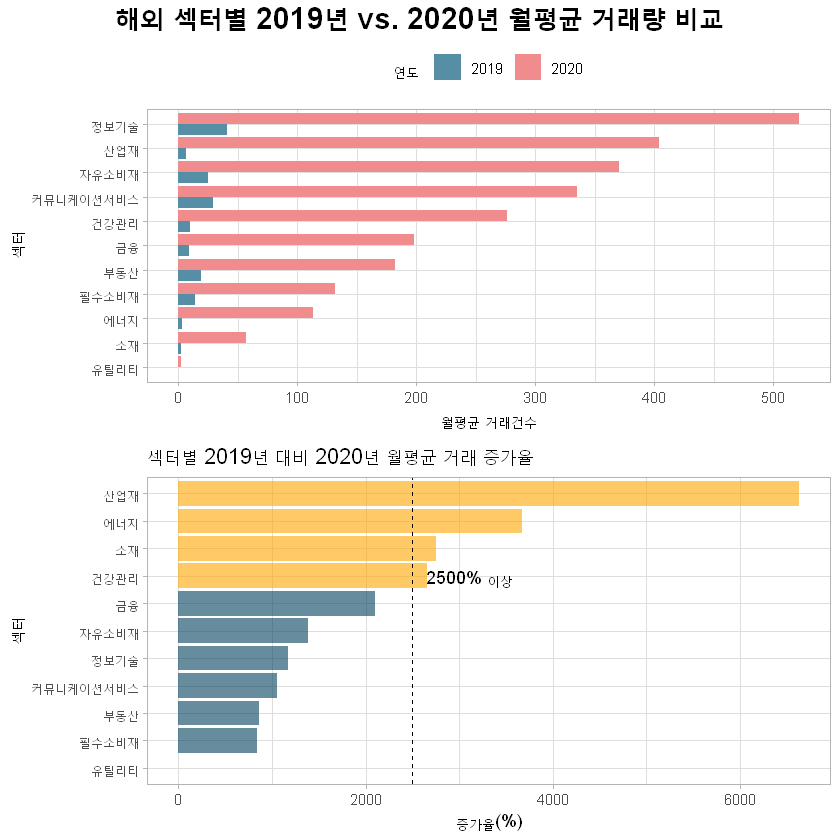

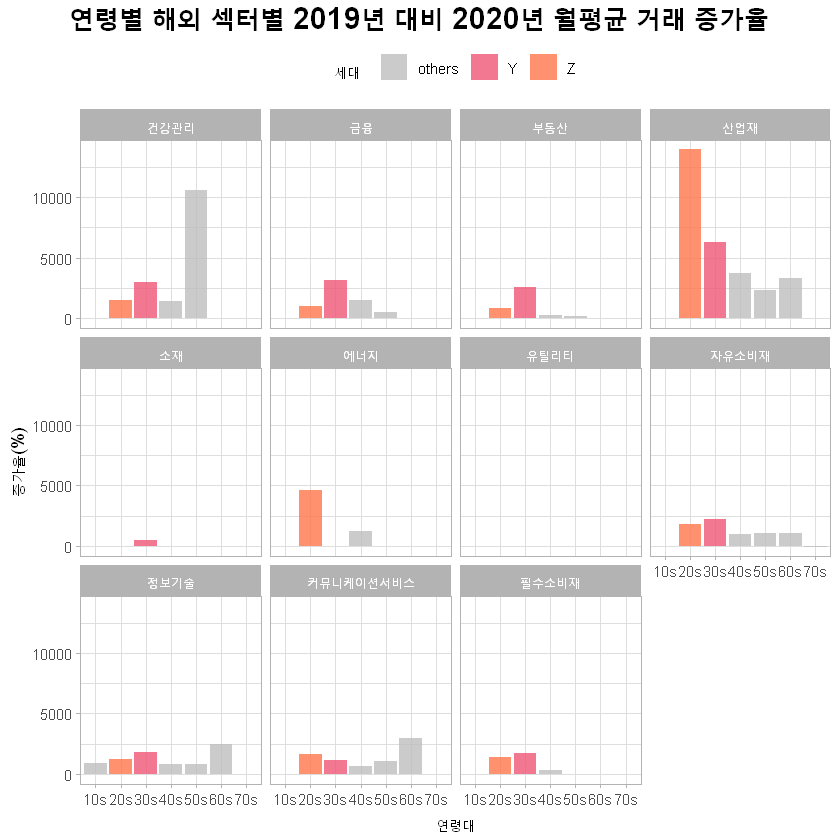

In [37]:
# 섹터별 월평균 얼마나 증가하였나(연령별)
# 해외 섹터별 2019년 vs. 2020년 월평균 거래
t1 <- trd_oss %>% drop_na(GICS) %>% group_by(year(orr_dt), GICS) %>% 
  summarize(n=n()) %>% mutate(month.n = ifelse(`year(orr_dt)` == 2019, round(n/12, 0), round(n/6, 0)))

annotate_figure(ggarrange(
  ## 월평균 거래건수
  t1 %>% ggplot() +
    geom_col(aes(x=reorder(GICS, month.n), y=month.n, fill=factor(`year(orr_dt)`)), position='dodge')+
    theme_light() + scale_fill_manual(values=two_color, name='연도') + coord_flip() +
    labs(x='섹터', y='월평균 거래건수') + theme(legend.position='top'),
  
  ## 섹터별 2019년 대비 2020년 월평균 거래 증가율
  ## 노란색 부분: 2500% 증가한 거
  t1 %>% group_by(GICS) %>%
    summarize(increase = ifelse(
      month.n[`year(orr_dt)`==2019]==0, 0,
      (month.n[`year(orr_dt)`==2020]-month.n[`year(orr_dt)`==2019])*100/month.n[`year(orr_dt)`==2019])) %>%
    mutate(incrs.col = ifelse(increase>2500, '1', '0')) %>% 
    ggplot() +
    geom_col(aes(x=reorder(GICS, increase), y=increase, fill=incrs.col), alpha=.6) +
    theme_light() + scale_fill_manual(values=ten_colors[c(2,10)]) +
    geom_hline(yintercept = 2500, linetype = "dashed", colour = 'black') +
    annotate('text', x='건강관리', y=3100, label='2500% 이상')+
    labs(x='섹터', y='증가율(%)', title='섹터별 2019년 대비 2020년 월평균 거래 증가율') +
    theme(legend.position = 'none')+coord_flip(),
  
  ncol=1),
  top=text_grob('해외 섹터별 2019년 vs. 2020년 월평균 거래량 비교', face='bold', size=18))


# YZ세대의 국내 섹터별 2019년 대비 2020년 월평균 거래 증가율
t1 <- trd_oss %>% drop_na(GICS) %>% group_by(year(orr_dt), GICS, age_group, yz) %>%
  summarize(n=n()) %>% mutate(month.n = ifelse(`year(orr_dt)` == 2019, round(n/12, 0), round(n/6, 0)))

annotate_figure(
  t1 %>% group_by(GICS, age_group, yz) %>%
    summarize(increase = ifelse(
    month.n[`year(orr_dt)`==2019]==0, 0,
    (month.n[`year(orr_dt)`==2020]-month.n[`year(orr_dt)`==2019])*100/month.n[`year(orr_dt)`==2019])) %>%
    ggplot() +
    geom_col(aes(x=age_group, y=increase, fill=yz), alpha=.8) +
    theme_light() + facet_wrap(GICS~.) +
    scale_fill_manual(values=yz_color, name='세대') +
    labs(x='연령대', y='증가율(%)') + theme(legend.position = 'top'),
  top=text_grob('연령별 해외 섹터별 2019년 대비 2020년 월평균 거래 증가율', face='bold', size=18))


- 2019년과 2020년의 차이를 명확하게 보고자, 월평균 거래 건수를 구해보았습니다. 유틸리티를 제외한 모든 섹터에서 2019년 대비 2020년에 월평균 거래건수가 폭발적으로 증가한 모습입니다. 앞서 언급한 산업재 섹터는 월평균 거래량이 전년대비 6000%  이상 증가했습니다. 
  
  
- <섹터별 2019년 대비 2020년 월평균 거래 증가율>에서 노란색으로 표시된 부분은 거래량이 전년대비 2500%  이상 증가한 섹터들입니다. ***산업재> 에너지 > 소재 > 건강관리*** 순으로 증가했습니다. 소재와 에너지 섹터의 경우에는 워낙 전년 거래량이 적었다가 증가하여 순위권에 든 것으로 보입니다.
  
  
- Y세대 내의 월평균 거래 증가율은 ***산업재 > 금융 > 건강관리*** 순으로 높았고, Z세대 내의 월평균 거래 증가율은 ***산업재 > 에너지 > 자유소비재*** 순으로 높았습니다.

##### 4) 연령별 선호 해외주식종목 시각화 

`summarise()` regrouping output by 'iem_krl_nm' (override with `.groups` argument)
`summarise()` regrouping output by 'iem_krl_nm' (override with `.groups` argument)


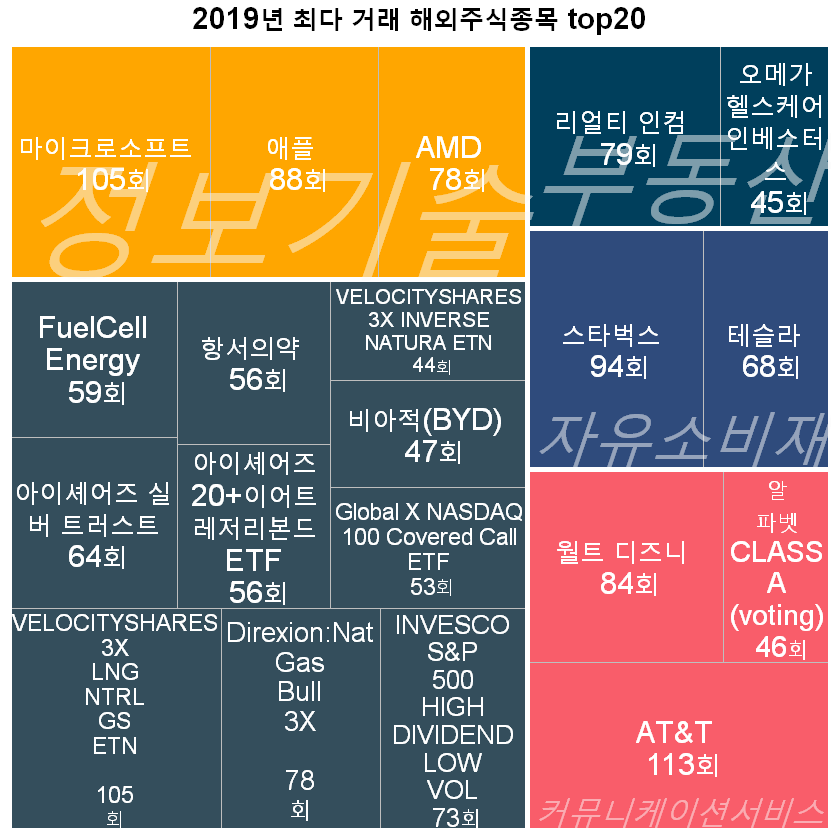

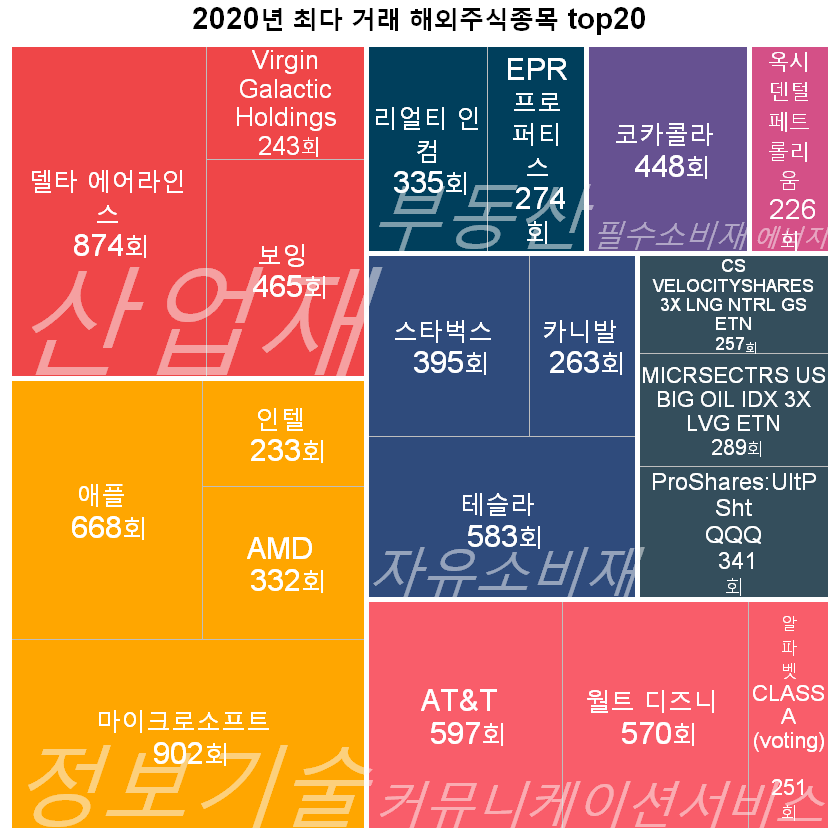

In [38]:
# 2019년 vs. 2020년 최다 거래 해외주식종목 top20
annotate_figure(
  trd_oss %>% filter(year(trd_oss$orr_dt)==2019) %>% group_by(iem_krl_nm, GICS) %>% summarize(n=n()) %>%
  arrange(desc(n)) %>% head(20) %>% mutate(GICS=replace_na(GICS, ' ')) %>%
  ggplot(aes(area=n, fill=GICS, label=paste(iem_krl_nm,'\n',paste0(n,'회')), subgroup=GICS))+
  geom_treemap()+
  geom_treemap_subgroup_border(color='white')+
  geom_treemap_text(color='white', place='centre', grow=F, reflow=T)+
  geom_treemap_subgroup_text(fontface='italic', place='bottom', grow=T, alpha=.5,
                             colour='#FAFAFA', min.size = 1)+
  scale_fill_manual(values=gics_colors)+theme(legend.position = 'none'),
  top=text_grob('2019년 최다 거래 해외주식종목 top20', face='bold', size=18))

annotate_figure(
  trd_oss %>% filter(year(trd_oss$orr_dt)==2020) %>% group_by(iem_krl_nm, GICS) %>% summarize(n=n()) %>%
    arrange(desc(n)) %>% head(20) %>% mutate(GICS=replace_na(GICS, ' ')) %>%
    ggplot(aes(area=n, fill=GICS, label=paste(iem_krl_nm,'\n',paste0(n,'회')), subgroup=GICS))+
    geom_treemap()+
    geom_treemap_subgroup_border(color='white')+
    geom_treemap_text(color='white', place='centre', grow=F, reflow=T)+
    geom_treemap_subgroup_text(fontface='italic', place='bottom', grow=T, reflow=F,
                               alpha=.5, colour='#FAFAFA', min.size = 1)+
    scale_fill_manual(values=gics_colors)+theme(legend.position = 'none'),
  top=text_grob('2020년 최다 거래 해외주식종목 top20', face='bold', size=18))

- 2019년에 비해 2020년에서 최다 거래 해외주식의 ***섹터가 더 다양해졌습니다***. (4개 → 7개)
  
  
- "정보기술, 부동산, 자유소비재, 커뮤니케이션서비스 섹터"는 2019년에 이어 2020년에도 자리를 지켰습니다. 
  
  
- 2019년에는 일반주식을 거래하는 만큼이나 ETF, ETN을 거래하는 횟수도 많았습니다. 그러나 2020년에 들어서면서 전체 거래에서 ETF, ETN이 차지하는 비중은 줄어들었습니다. 미국 증시가 폭락하며, (이전에는 비싸서 사지 못 했을) '매력적인 주식'을 매수하는 새로운 해외 투자자들이 대거 유입했기 때문인 것으로 보입니다.

Y세대의 2019년과 2020년 최다 거래 해외주식종목도 살펴보겠습니다.
*(Z세대의 경우, 시각화했을 때 의미있는 결과가 나오지 않아 포함시키지 않았습니다)*

`summarise()` regrouping output by 'iem_krl_nm' (override with `.groups` argument)
`summarise()` regrouping output by 'iem_krl_nm' (override with `.groups` argument)


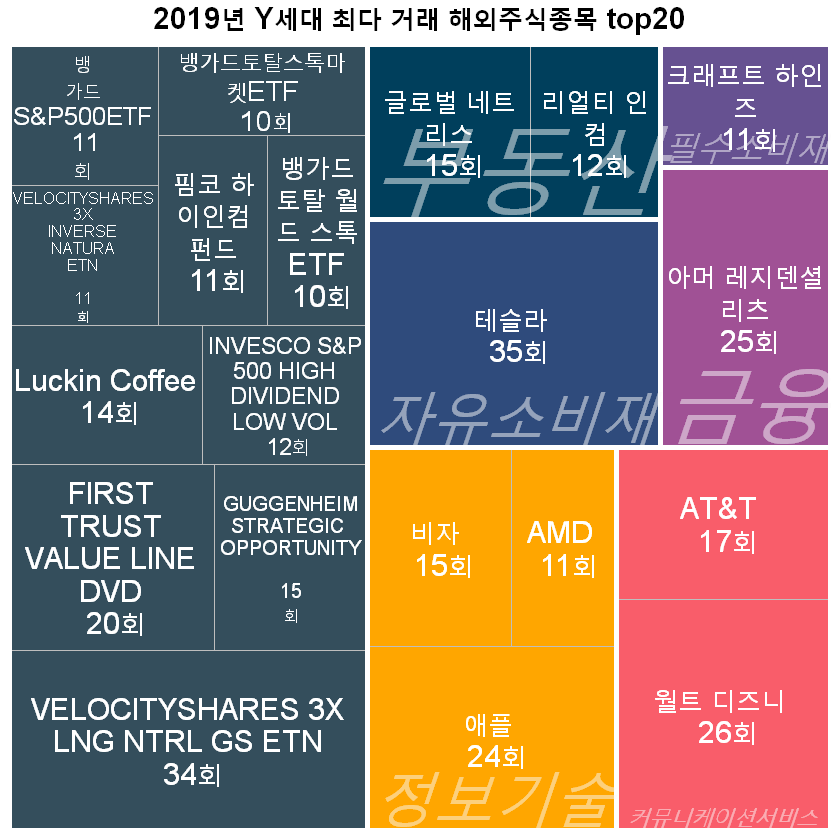

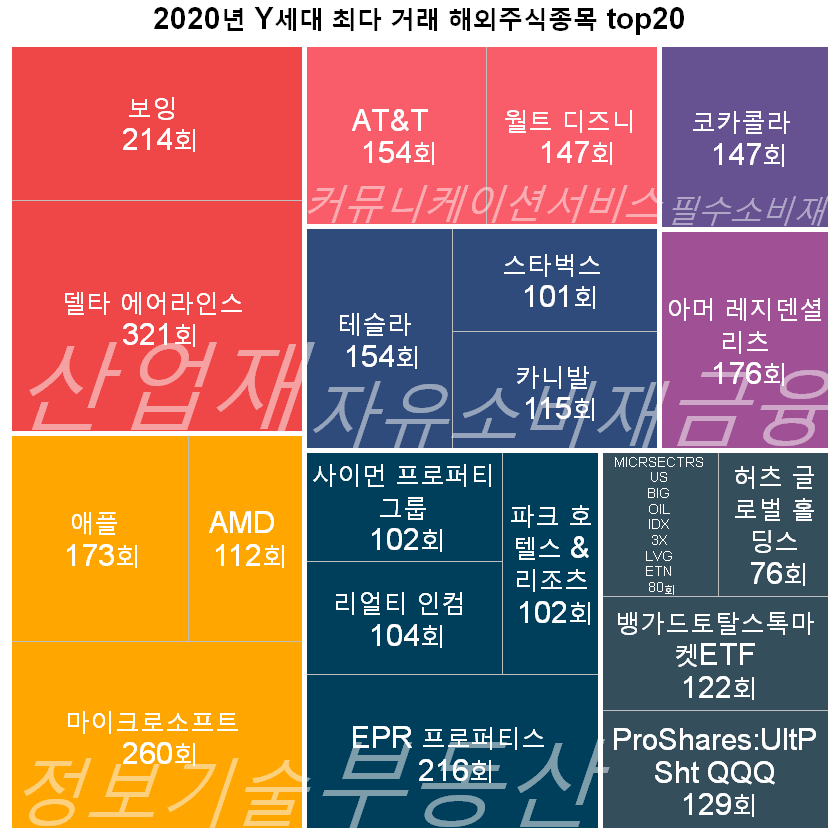

In [39]:
# Y세대
annotate_figure(
  # 2019년
  trd_oss %>% filter(year(trd_oss$orr_dt)==2019 & yz=='Y') %>% group_by(iem_krl_nm, GICS) %>% summarize(n=n()) %>%
    arrange(desc(n)) %>% head(20) %>% mutate(GICS=replace_na(GICS, ' ')) %>%
    ggplot(aes(area=n, fill=GICS, label=paste(iem_krl_nm,'\n',paste0(n,'회')), subgroup=GICS))+
    geom_treemap()+
    geom_treemap_subgroup_border(color='white')+
    geom_treemap_text(color='white', place='centre', grow=F, reflow=T)+
    geom_treemap_subgroup_text(fontface='italic', place='bottom', grow=T, alpha=.5,
                               colour='#FAFAFA', min.size = 1)+
    scale_fill_manual(values=gics_colors)+theme(legend.position = 'none'),
  top=text_grob('2019년 Y세대 최다 거래 해외주식종목 top20', face='bold', size=18))

annotate_figure(
  #2020년
  trd_oss %>% filter(year(trd_oss$orr_dt)==2020 & yz=='Y') %>% group_by(iem_krl_nm, GICS) %>% summarize(n=n()) %>%
    arrange(desc(n)) %>% head(20) %>% mutate(GICS=replace_na(GICS, ' ')) %>%
    ggplot(aes(area=n, fill=GICS, label=paste(iem_krl_nm,'\n',paste0(n,'회')), subgroup=GICS))+
    geom_treemap()+
    geom_treemap_subgroup_border(color='white')+
    geom_treemap_text(color='white', place='centre', grow=F, reflow=T)+
    geom_treemap_subgroup_text(fontface='italic', place='bottom', grow=T, alpha=.5,
                               colour='#FAFAFA', min.size = 1)+
    scale_fill_manual(values=gics_colors)+theme(legend.position = 'none'),
  top=text_grob('2020년 Y세대 최다 거래 해외주식종목 top20', face='bold', size=18))

- 부동산과 자유소비재 섹터의 주식종목개수가 많아진 것이 눈에 띕니다.
  
  
- 정보기술 섹터의 ***'애플', 'AMD'***와 커뮤니케이션기술 섹터의 ***'AT&T'*** 등은 꾸준히 거래되고 있습니다. 이 두 섹터는 언택트 시대를 맞아 스마트기기와 통신기술의 수요가 늘어나면서 지속적인 관심을 받고 있는 것으로 보입니다. 이외에 금융 섹터의 ***'아머 레지덴셜 리츠'***는 미국의 고배당주로써 글로벌 저금리 시대에 안정적인 고배당을 노리는 투자자 사이에서 인기를 끌고 있는 것으로 생각됩니다.


### B. Modeling 

지금까지 주어진 데이터 탐색을 통해 다른 세대와 구별되는 YZ세대의 아우르는 특성을 파악해보고자 했습니다. 모델링 파트에서는 요인분석(FA)와 클러스터링을 통해 보다 세부적인 특성을 프로파일링하도록 하겠습니다. 

먼저 시작하기에 앞서 모델링에 사용할 파생변수를 생성하도록 하겠습니다. 

In [40]:
# 매도, 매수 여부 변수 추가
trd_kr = trd_kr %>% mutate(yn_s = ifelse(sby_dit_cd == '매도', 1, 0),
                           yn_b = ifelse(sby_dit_cd == '매수', 1, 0))

trd_oss = trd_oss %>% mutate(yn_s = ifelse(sby_dit_cd == '매도', 1, 0),
                             yn_b = ifelse(sby_dit_cd == '매수', 1, 0))

# cns_s_qty : 고객별, 종목별 총 매도 체결수량
# cns_b_qty : 고객별, 종목별 총 매수 체결수량
# mean_s_pr : 고객별, 종목별 주당 평균 매도금액
# mean_b_pr : 고객별, 종목별 주당 평균 매수금액
kr_prf = trd_kr %>% dplyr::group_by(cus_id, iem_cd) %>% summarise(cns_s_qty = sum(cns_qty*yn_s),
                                                           cns_b_qty = sum(cns_qty*yn_b),
                                                           mean_s_pr = sum(cns_qty*yn_s*orr_pr)/sum(cns_qty*yn_s),
                                                           mean_b_pr = sum(cns_qty*yn_b*orr_pr)/sum(cns_qty*yn_b))


oss_prf = trd_oss %>% group_by(cus_id, iem_cd) %>% summarise(cns_s_qty = sum(cns_qty*yn_s),
                                                             cns_b_qty = sum(cns_qty*yn_b),
                                                             mean_s_pr = sum(cns_qty*yn_s*orr_pr*trd_cur_xcg_rt)/sum(cns_qty*yn_s),
                                                             mean_b_pr = sum(cns_qty*yn_b*orr_pr*trd_cur_xcg_rt)/sum(cns_qty*yn_b))

# 매수/매도가 기간(2019.01.01~2020.06.30)내에 없는 경우(0인 경우) 분모가 0이 되어 nan : 0으로 채운다
kr_prf$mean_s_pr[is.nan(kr_prf$mean_s_pr)] <- 0
kr_prf$mean_b_pr[is.nan(kr_prf$mean_b_pr)] <- 0
oss_prf$mean_s_pr[is.nan(oss_prf$mean_s_pr)] <- 0
oss_prf$mean_b_pr[is.nan(oss_prf$mean_b_pr)] <- 0

# 매도수량이 매수수량보다 큰 경우는 drop
kr_prf = kr_prf %>% filter(cns_s_qty <= cns_b_qty)
oss_prf = oss_prf %>% filter(cns_s_qty <= cns_b_qty)

# (평균매도금액-평균매수금액)*매도수량으로 수익 추정
kr_prf = kr_prf %>% mutate(sum_prf = (mean_s_pr-mean_b_pr)*cns_s_qty)
oss_prf = oss_prf %>% mutate(sum_prf = (mean_s_pr-mean_b_pr)*cns_s_qty)

# kr_prf : 국내 고객별 수익 추정값 합
# oss_prf : 해외 고객별 수익 추정값 합
kr_prf = kr_prf %>% group_by(cus_id) %>% summarise(kr_prf = sum(sum_prf))
oss_prf = oss_prf %>% group_by(cus_id) %>% summarise(oss_prf = sum(sum_prf))

# 고객정보에 join
cus_info = left_join(cus_info, kr_prf, by = 'cus_id')
cus_info = left_join(cus_info, oss_prf, by = 'cus_id')

cus_info$kr_prf[is.na(cus_info$kr_prf)] <- 0
cus_info$oss_prf[is.na(cus_info$oss_prf)] <- 0

# sum_prf : 국내, 해외 고객별 수익 추정값 합
cus_info = cus_info %>% mutate(sum_prf = kr_prf + oss_prf)

`summarise()` regrouping output by 'cus_id' (override with `.groups` argument)
`summarise()` regrouping output by 'cus_id' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


- 고객별 수익률에 대한 지표가 필요하다고 판단해 **수익 추정치(kr_prf, oss_prf) 변수**를 생성했습니다.
 수익 추정치 변수는 다음과 같이 계산하였습니다.
     
     1) 거래 데이터를 고객 고유번호(cus_id), 종목 코드(iem_cd)로 그룹화하여 고객별로 해당 종목 1주당 평균 매수 가격, 평균 매도 가격을 산출합니다.
     
     2) 기간이 한정된 데이터로 매수보다 매도가 많은 경우가 존재하므로 이를 drop합니다.
     
     3) (평균 매도가격-평균매수가격)*매도수량으로 종목별 수익 추정치를 계산한 후 고객별로 더해줍니다.
     
     4) 국내 수익 추정치(kr_prf)와 해외 수익 추정치(oss_prf)를 합해서 전체 거래 수익 추정치(sum_prf)를 산출했습니다.


In [41]:
##  파생변수 생성!

# kr_s_cnt : 국내 매도 거래건수
# kr_b_cnt : 국내 매수 거래건수
# ss_ratio :  전체 매수건*체결수량 대비 삼성 매수건 *체결수량
# etf_cnt :  etf 매수건 * 체결수량
# etn_cnt :  etn 매수건 * 체결수량
# elw_cnt :  elw 매수건 * 체결수량
# eee_cnt : etf, etn, elw 총 매수건 * 매수수량 
# kospi_ratio : 전체매수금액 대비 코스피매수금액
# kr_iem_cnt : 국내 거래종목 유니크값 개수
# kr_iem_ratio : 국내 거래 종목 수 대비 거래 건수 
# kr_s_pr : 국내 총매도금액/매도건수
# kr_b_pr : 국내 총매수금액/매수건수   

# oss_s_cnt : 해외 매도 거래건수
# oss_b_cnt : 해외 매수 거래건수
# kr_iem_cnt : 국내 거래종목 유니크값 개수
# oss_iem_cnt : 해외 거래종목 유니크값 개수
# oss_iem_ratio : 해외 거래 종목 수 대비 거래 건수 
# oss_s_pr : 해외 총매도금액/매도건수
# oss_b_pr : 해외 총매수금액/매도건수

# oss_ratio: 전체거래건수 대비 해외거래 건수

cus_kr = trd_kr %>% 
  group_by(cus_id) %>%
  summarise(kr_s_cnt = sum(yn_s),
            kr_b_cnt = sum(yn_b),
            ss_ratio = sum(ifelse(yn_b&iem_krl_nm == '삼성전자보통주', 1, 0)*cns_qty)/sum(yn_b*cns_qty),
            etf_cnt = sum(ifelse(yn_b&type2== 'ETF', 1, 0)*cns_qty),
            etn_cnt = sum(ifelse(yn_b&type== 'ETN', 1, 0)*cns_qty),
            elw_cnt = sum(ifelse(yn_b&type== 'ELW', 1, 0)*cns_qty),
            kospi_ratio = sum(ifelse(yn_b& `구분` == 'KOSPI', 1, 0)*cns_qty*orr_pr)/sum(yn_b*cns_qty*orr_pr),
            kr_iem_cnt = length(unique((iem_cd))),
            kr_iem_ratio = n()/length(unique(iem_cd)),
            kr_s_pr = sum(yn_s*orr_pr)/sum(yn_s),
            kr_b_pr = sum(yn_b*orr_pr)/sum(yn_b)) %>% 
  mutate(eee_cnt = etf_cnt + etn_cnt + elw_cnt)


cus_oss = trd_oss %>% 
  group_by(cus_id) %>% 
  summarise(oss_s_cnt = sum(yn_s),
            oss_b_cnt = sum(yn_b),
            oss_iem_cnt = length(unique(iem_cd)),
            oss_iem_ratio = n()/length(unique(iem_cd)),
            oss_s_pr = sum(yn_s*orr_pr)/sum(yn_s),
            oss_b_pr = sum(yn_b*orr_pr)/sum(yn_b))

# join
cus_info = left_join(cus_info, cus_kr, by ='cus_id')
cus_info = left_join(cus_info, cus_oss, by = 'cus_id')


cus_info <- cus_info %>%
  mutate(oss_ratio = (oss_s_cnt + oss_b_cnt)/(kr_s_cnt + kr_b_cnt + oss_s_cnt +  oss_b_cnt),
         kr_s_cnt = ifelse(is.na(kr_s_cnt), 0, kr_s_cnt),
         kr_b_cnt = ifelse(is.na(kr_b_cnt), 0, kr_b_cnt),
         ss_ratio = ifelse(is.na(ss_ratio), 0, ss_ratio),
         etf_cnt = ifelse(is.na(etf_cnt),0, etf_cnt),
         etn_cnt = ifelse(is.na(etn_cnt), 0 , etn_cnt),
         elw_cnt = ifelse(is.na(elw_cnt), 0, elw_cnt),
         kospi_ratio = ifelse(is.na(kospi_ratio), 0, kospi_ratio),
         kr_iem_cnt = ifelse(is.na(kr_iem_cnt), 0, kr_iem_cnt),
         kr_iem_ratio = ifelse(is.na(kr_iem_ratio),0, kr_iem_ratio),
         kr_s_pr = ifelse(is.na(kr_s_pr), 0, kr_s_pr),
         kr_b_pr = ifelse(is.na(kr_b_pr), 0, kr_b_pr),
         eee_cnt = ifelse(is.na(eee_cnt), 0, eee_cnt),
         kr_b_cnt = ifelse(is.na(kr_b_cnt), 0, kr_b_cnt),
         oss_s_cnt = ifelse(is.na(oss_s_cnt), 0, oss_s_cnt),
         oss_b_cnt = ifelse(is.na(oss_b_cnt), 0, oss_b_cnt),
         oss_iem_cnt = ifelse(is.na(oss_iem_cnt), 0, oss_iem_cnt),
         oss_iem_ratio = ifelse(is.na(oss_iem_ratio), 0, oss_iem_ratio),
         oss_s_pr = ifelse(is.na(oss_s_pr), 0, oss_s_pr),
         oss_b_pr = ifelse(is.na(oss_b_pr), 0, oss_b_pr),
         oss_ratio = ifelse(is.na(oss_ratio), 0, oss_ratio)
        ) 

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


#### 2-1 Factor Analysis : 투자성향 요인 파악

EDA 파트에서 살펴본 바에 따르면 2030세대는 일반적으로 고위험 상품으로 분류되는 해외주식, ETF, ETN 거래를 타 세대보다 활발하게 하는 경향이 뚜렷이 나타납니다. 하지만 고객 데이터의 투자 성향 변수(ivs_icn_cd)는 결측치가 많고 고객의 자의적 판단에 의존하기 때문에 변수가 이러한 경향을 잘 나타내지 못한다고 판단하였습니다. 따라서 성향(안정성/수익성)과 관련있다고 예상되는 파생변수들을 활용하여 요인분석(Factor Analysis)를 진행하였습니다.

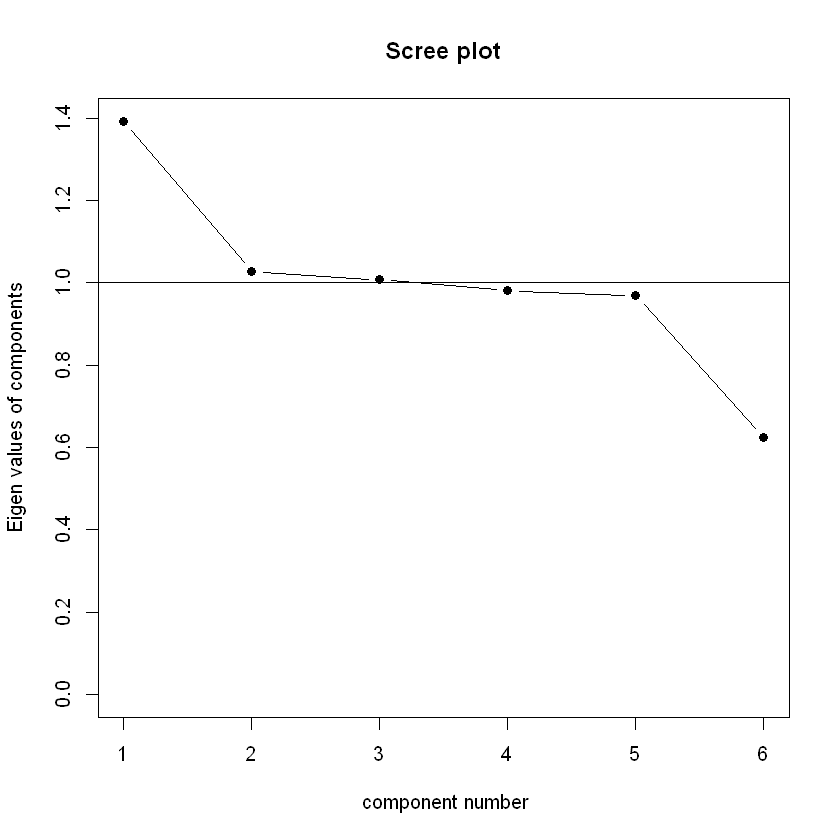

In [42]:
FA_data = cus_info %>% dplyr::select(ss_ratio, eee_cnt, kospi_ratio, kr_prf, kr_iem_ratio, act_count) 

cor <- cor(FA_data, use = "pairwise.complete.obs")
scree(cor, factors = FALSE)

변수의 성향 파악이라는 요인분석의 목표와 scree plot의 모양을 고려하여 요인 개수를 2개로 결정했습니다. 

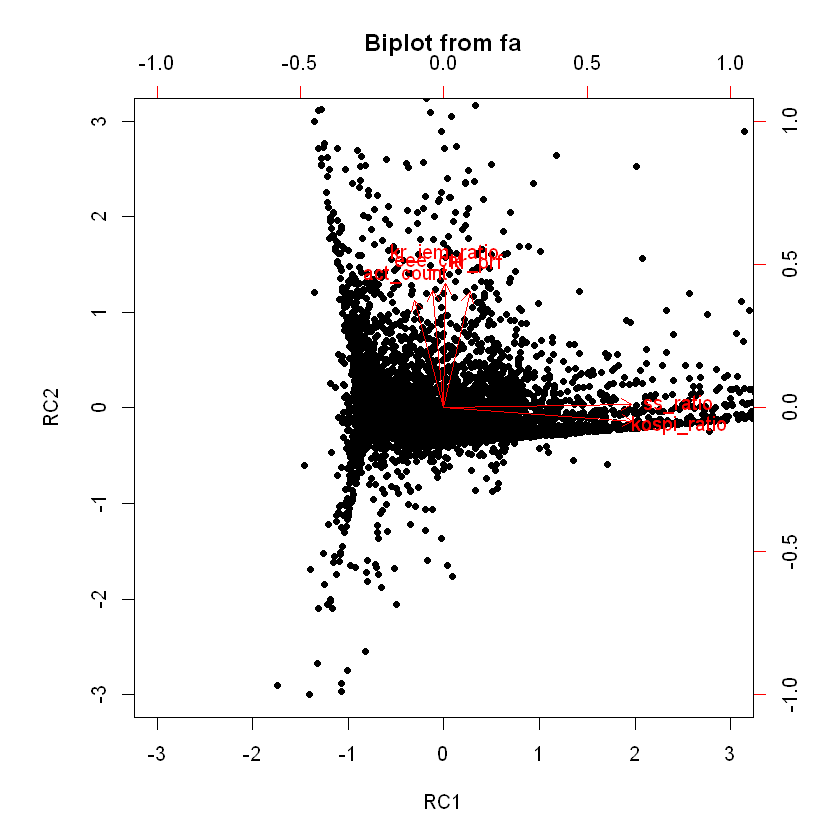

In [43]:
FA_data = scale(FA_data)

FA = principal(FA_data, nfactors = 2, rotate="varimax")


biplot(FA)

변수의 화살표가 축에 평행할수록, 길이가 길수록 해당 요인(RC1, RC2)를 잘 설명하고 있다는 의미입니다.

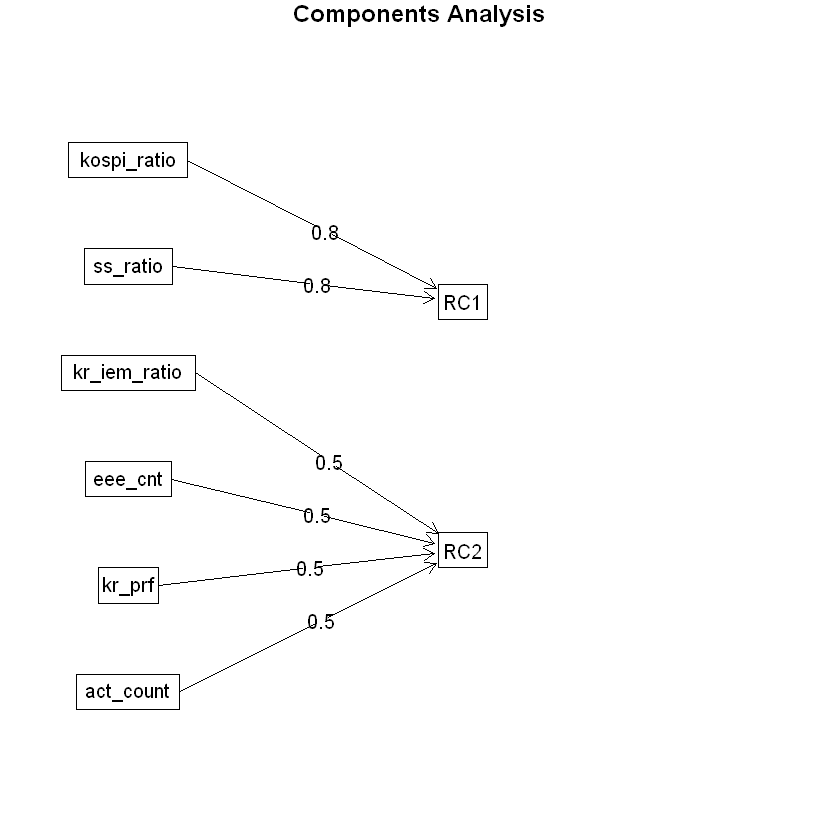

In [44]:
fa.diagram(FA)

ss_ratio, kospi_ratio가 RC1 요인으로, kr_iem_ratio, eee_cnt, kr_prf, act_count 변수가 RC2 요인으로 묶였음을 알 수 있습니다. 

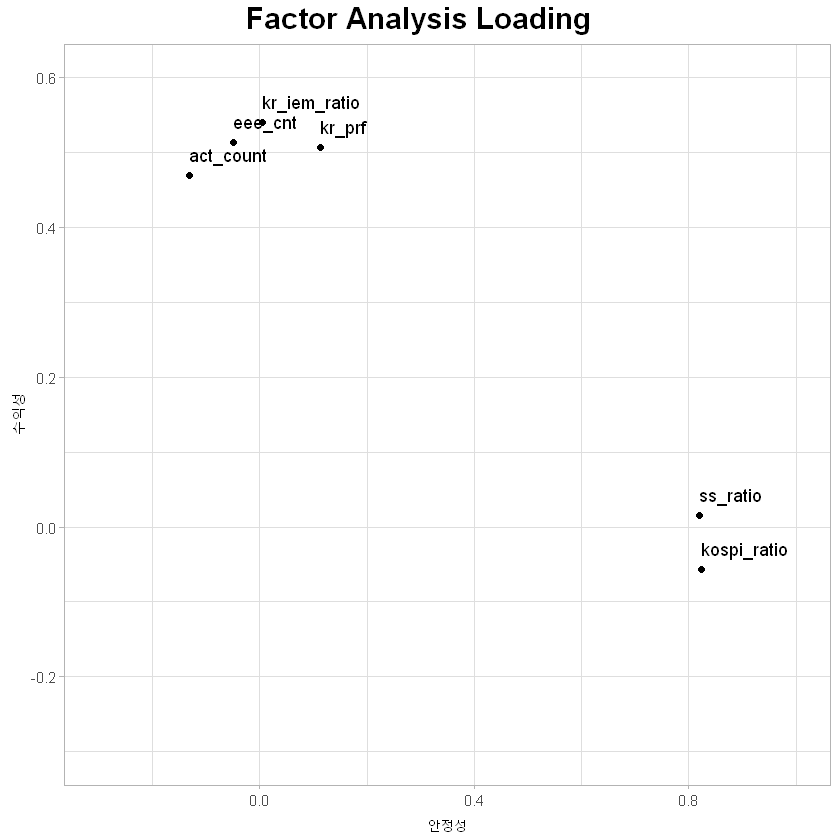

In [45]:
annotate_figure( 
    ggplot(as.data.frame(FA$loadings[ , 1:2]), aes(x = RC1, y = RC2)) +
                   coord_cartesian(xlim = c(-0.3, 1), ylim = c(-0.3, 0.6)) +
                   geom_point(aes(x = RC1, y = RC2)) +
                   geom_text(aes(label=row.names(as.data.frame(FA$loadings[ , 1:2])), vjust=-1, hjust=0)) +
                   xlab('안정성') +
                   ylab('수익성') +
                   theme_light(),
                 top=text_grob('Factor Analysis Loading', face='bold', size=18))

각 요인에 묶인 변수들의 공통점을 파악하여  RC1을 안정성, RC2를 수익성으로 명명하였습니다. 
  
  
- **안정성을 나타내는 변수**   
  
     - ss_ratio (전체 매수수량 대비 삼성전자보통주 매수수량) : 삼성전자는 국내 시가총액 1위의 기업으로 전체 매수건 중 삼성전자보통주를 거래한 비율을 살펴보면 얼마나 안정성을 추구하는 고객인지 판단한다고 보았습니다. 
          
     - kospi_ratio (전체매수금액 대비 코스피매수금액) : ss_ratio 와 마찬가지로 전체 매수금액 중 국내 우량 기업들이 상장되어 있는 코스피 시장의 종목들의 매수금액이 높을수록 안정성을 추구할 것이라고 보았습니다. 
   
   
- **수익성을 나타낼 수 있는 변수**     
  
   - eee_cnt (etf, etn, elw 총 매수수량) : ETF, ETN, ELW 상품을 많이 매수할수록 공격적인 투자성향을 가질 것이라고 보았습니다. 
    
   - kr_iem_ratio (국내 종목 당 평균 거래건수) : 종목 당 거래 횟수가 높을수록 단기 거래를 하는 성향이 높다고 보았습니다.  
    
   - kr_prf (고객별 국내 주식 수익 추정가)   
    
   - act_count (계좌 개수) : 인당 계좌 개수가 많을수록 전문적 투자를 할 성향이 높다고 보았습니다. 

요인분석에서 얻은 변수에 대한 인사이트를 클러스터링 결과 해석에 활용할 예정입니다. 



#### 2-2 Clustering : YZ세대 투자자 특성 추출 

고객의 특성 파악을 위해 클러스터링을 진행했습니다.  
먼저 YZ세대와 이외 세대 고객의 차이에 따라 유의미한 차이가 있는 변수들을 추출하기 위해 t-test를 진행하였습니다.

In [46]:
# Multiple t-tests of explanatory variables 
X_names <- names(cus_info[c(11:12, 19:21, 25:37)])
t.test_df <- data.frame()

for(i in 1:length(X_names)){
  t.test_p.value <- t.test(cus_info[,X_names[i]] ~ cus_info$YZ, var.equal = TRUE)$p.value
  t.test_df[i, 1] <- X_names[i]
  t.test_df[i, 2] <- t.test_p.value
}
colnames(t.test_df) <- c("x_var_name", "p.value")
t.test_df %>% arrange(p.value) %>% filter(p.value < 0.01) 

x_var_name,p.value
inflow2020,2.916246e-100
act_count,3.840476e-43
oss_ratio,9.925932e-15
kospi_ratio,3.015613e-11
oss_iem_ratio,2.059745e-09
oss_iem_cnt,8.694131e-07
kr_s_cnt,1.151353e-03
oss_b_cnt,4.409457e-03


위 변수들은 모두 YZ세대와 이외 세대의 차이가 유의미한 변수들입니다.   
이 변수들 중 상관성을 고려하여 클러스터링에 사용할 변수를 다음과 같이 선택했습니다. 

- 2020년 유입여부
- 계좌 개수
- 국내 거래건별 총매수금액 
- 국내 거래건별 총매도금액
- 총 매수금액 중 코스피 매수금액 비율
- 해외 종목 당 평균 거래건수
- 국내 매도 거래 건수
- 해외 매수 거래 건수

클러스터링은 k-means 클러스터링 기법을 사용했습니다. 

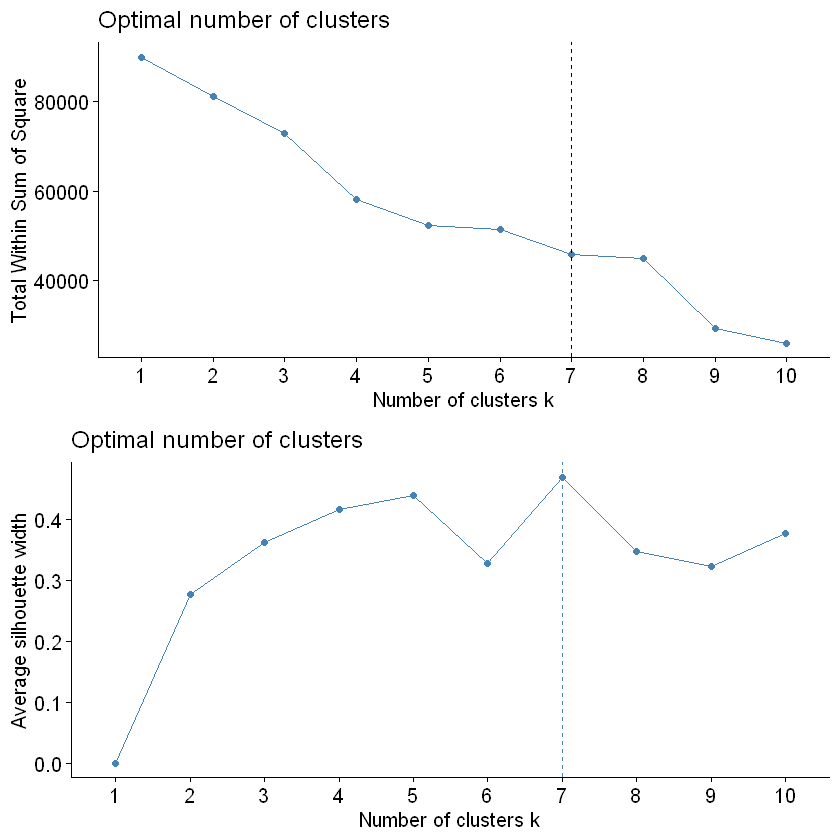

In [47]:
cluster_1 <- cus_info %>% 
  dplyr::select(inflow2020, act_count, oss_ratio, kr_iem_ratio,
         kospi_ratio, oss_iem_ratio, oss_iem_cnt, kr_s_cnt, oss_b_cnt) %>% drop_na()

# scaling 
cluster_1 = scale(cluster_1) %>% as_tibble()

#Funcluster = kmeans 
set.seed(2020)
a = fviz_nbclust(x = cluster_1, FUNcluster = kmeans, method='wss') +
        geom_vline(xintercept = 7, linetype = 2)
b = fviz_nbclust(x = cluster_1, FUNcluster = kmeans, method = "silhouette")

grid.arrange(a, b , ncol = 1)

- wss와 실루엣 값을 고려하여 클러스터의 개수를 7개로 결정하였습니다.

클러스터링한 데이터에 분류된 클러스터의 번호를 할당하여 새로운 변수를 만들었습니다. 7개의 각 클러스터를 시각화하면 다음과 같습니다. 

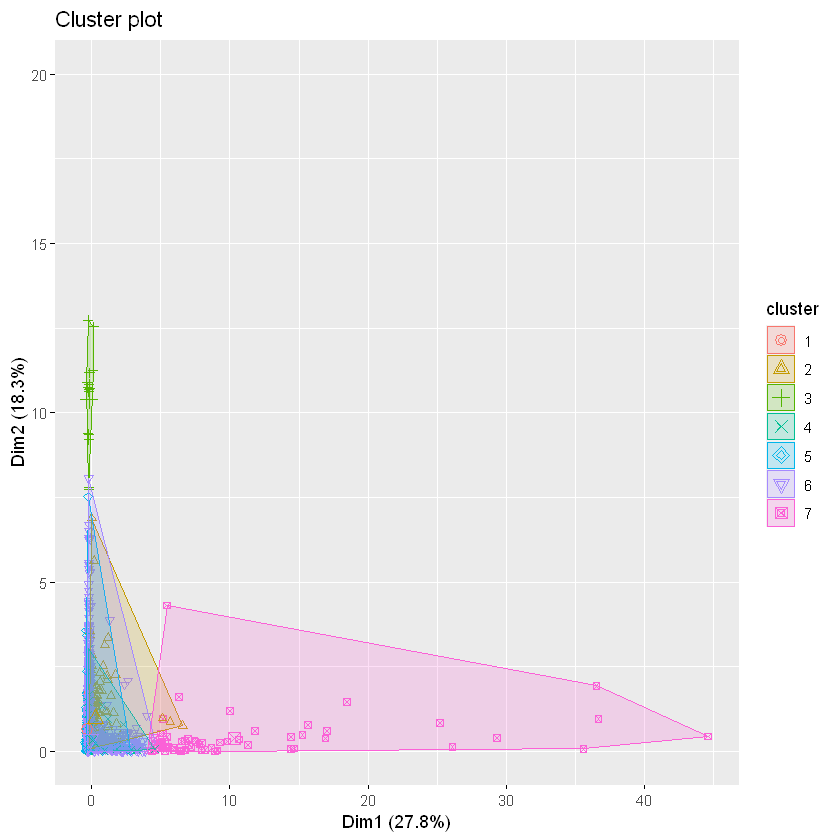

In [48]:
kmeans1 <- kmeans(cluster_1, nstart = 1, iter.max = 100, centers = 7)

fviz_cluster(kmeans1, cluster_1, geom="point") + ylim(c(0, 20))

result_cluster <- cbind(kmeans1$cluster,
                        cus_info[which(!is.na(cus_info$inflow2020)),])
result_cluster <- as.data.frame(result_cluster)

다음은 각 클러스터 별 연령대 분포를 시각화한 것입니다.  

`summarise()` regrouping output by 'kmeans1$cluster' (override with `.groups` argument)


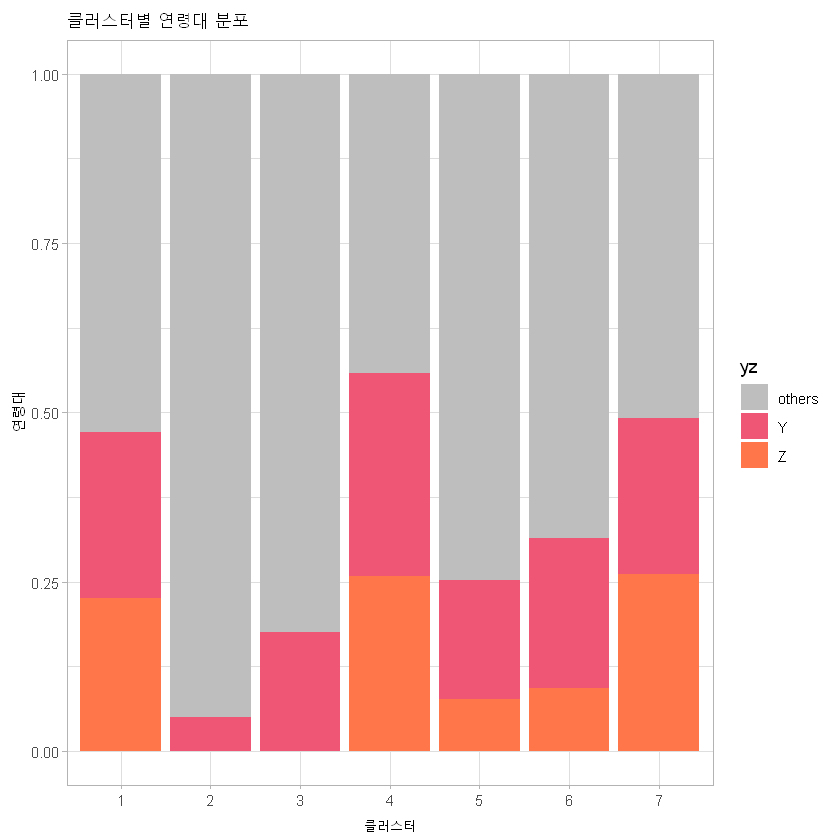

In [49]:
# YZ 세대 
result_cluster %>% 
  dplyr::group_by(`kmeans1$cluster`, yz) %>% summarise(n=n()) %>% 
  ggplot() + geom_col(aes(x=factor(`kmeans1$cluster`), y=n, fill = yz), position = "fill") +
  labs(title = "클러스터별 연령대 분포", x = "클러스터", y = "연령대", color = '클러스터') +
  scale_fill_manual(values = yz_color)+
  theme_light()

 - 클러스터별 연령대 분포를 살펴보면 **클러스터 1, 4, 7**의 YZ세대 비율이 다른 클러스터보다 높은 것을 확인할 수 있습니다. YZ세대의 특성을 파악하기 위해서 클러스터 1, 4, 7을 집중적으로 살펴보겠습니다.

`summarise()` regrouping output by 'kmeans1$cluster' (override with `.groups` argument)
`summarise()` regrouping output by 'kmeans1$cluster' (override with `.groups` argument)


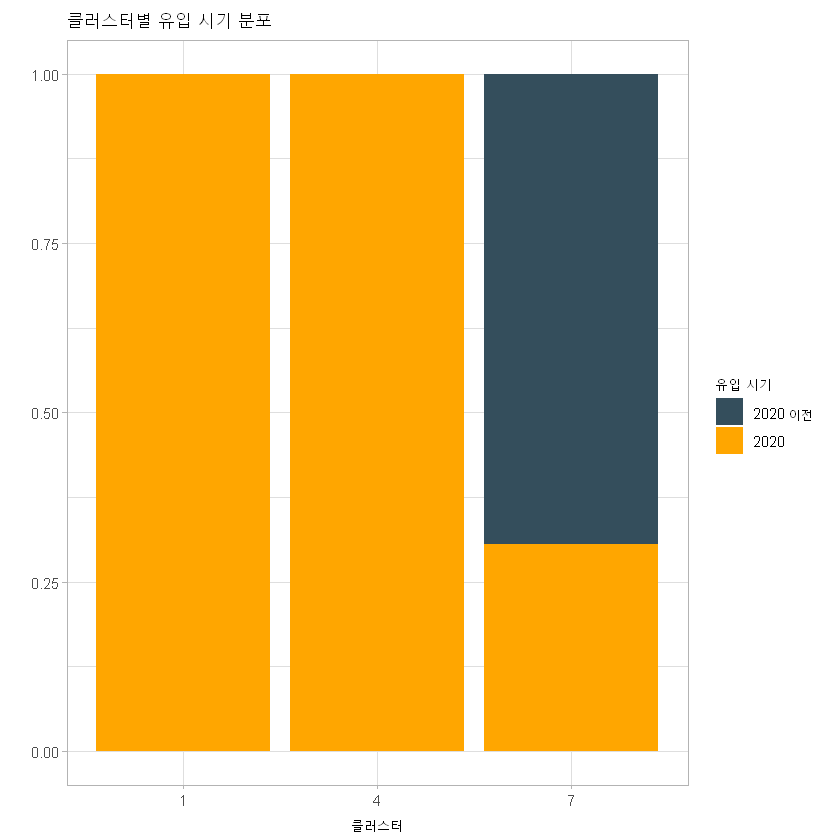

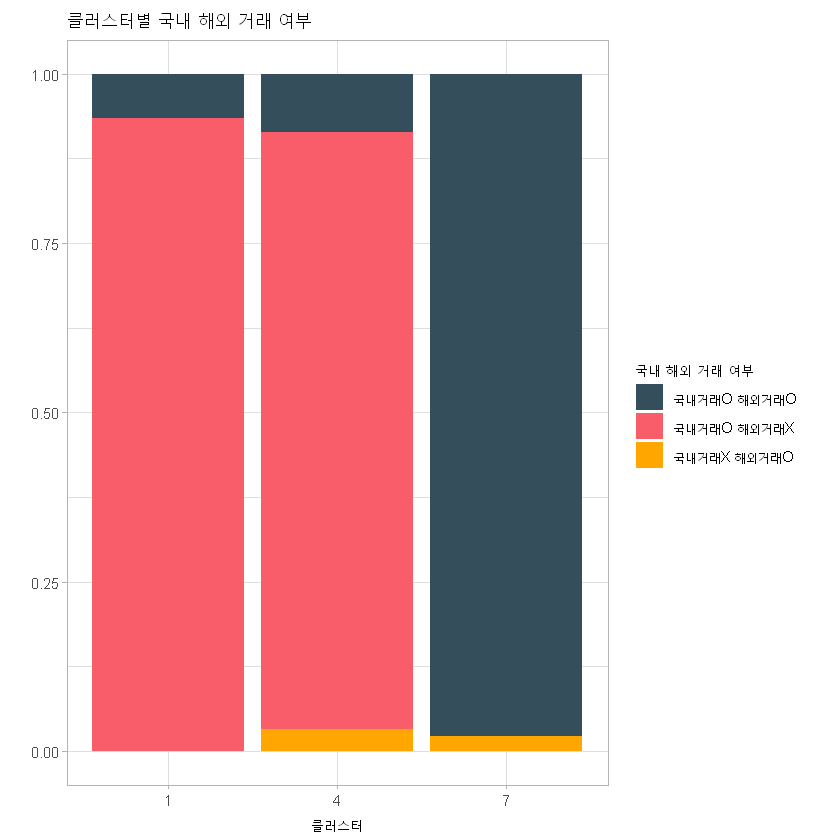

In [50]:
# inflow2020
result_cluster %>%  filter(`kmeans1$cluster` %in% c(1, 4, 7)) %>% group_by(`kmeans1$cluster`, inflow2020) %>% summarise(n=n()) %>% 
  ggplot() + geom_col(aes(x=factor(`kmeans1$cluster`), y=n, fill = factor(inflow2020)), position = 'fill') +
  labs(title = "클러스터별 유입 시기 분포", x = "클러스터", y = " ", fill = '유입 시기') +
  scale_fill_manual(values = ten_colors[c(1, 10)], labels = c('2020 이전', '2020'))+
  theme_light()


# trd_type
result_cluster %>%  filter(`kmeans1$cluster` %in% c(1, 4, 7)) %>% group_by(`kmeans1$cluster`, trd_type) %>% summarise(n=n()) %>% 
  ggplot() + geom_col(aes(x=factor(`kmeans1$cluster`), y=n, fill = factor(trd_type)), position = 'fill')  +
  labs(title = "클러스터별 국내 해외 거래 여부", x = "클러스터", y = " ", fill = '국내 해외 거래 여부') +
  scale_fill_manual(values = ten_colors[c(1, 7,10)])+
  theme_light()

- 클러스터 1, 4에 속한 고객들은 모두 2020년에 주식 시장에 유입되었으며, 국내 주식 위주로 거래합니다.  
  
  
- 반면 클러스터 7에 속한 고객들은 대다수가 2020년 이전부터 주식 투자를 하던 고객이며, 국내와 해외 주식 모두 거래하고 있습니다.

`summarise()` regrouping output by 'kmeans1$cluster' (override with `.groups` argument)
`summarise()` regrouping output by 'kmeans1$cluster' (override with `.groups` argument)


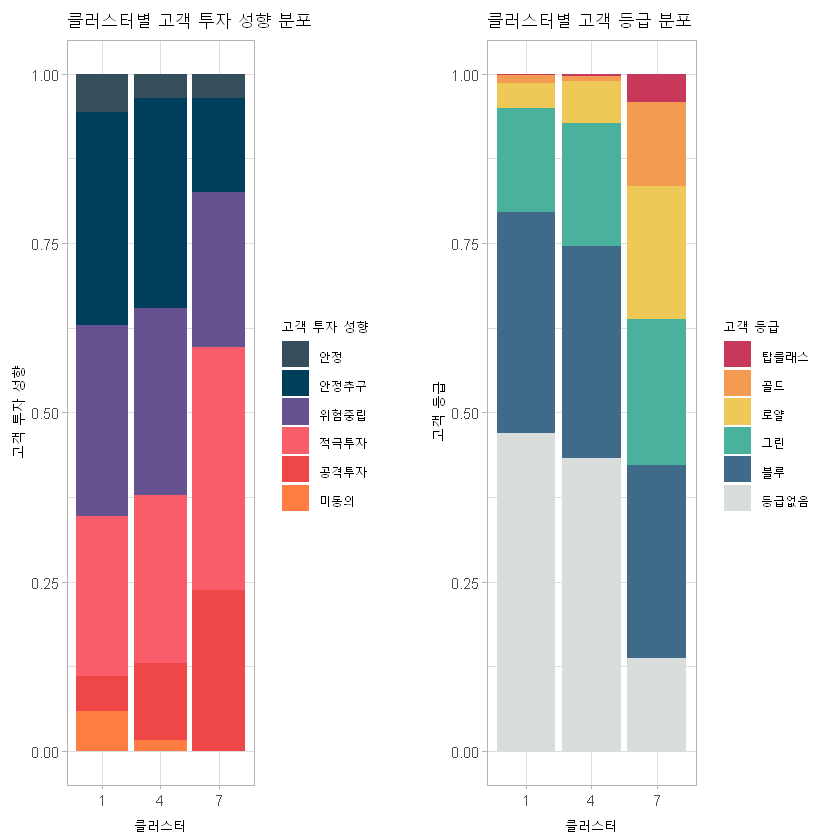

In [51]:
grid.arrange(
  # ivs_icn_cd
  result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4, 7)) %>% group_by(`kmeans1$cluster`, ivs_icn_cd) %>% summarise(n=n()) %>% drop_na() %>% 
    ggplot() + geom_col(aes(x=factor(`kmeans1$cluster`), y=n, fill = ivs_icn_cd), position = 'fill') +
    labs(title = "클러스터별 고객 투자 성향 분포", x = "클러스터", y = "고객 투자 성향", fill = '고객 투자 성향') +
    scale_fill_manual(values = ten_colors[c(1,2,4,7,8,9,10)])+
    theme_light(),
  # tco_cus_grd_cd
  result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4, 7)) %>% group_by(`kmeans1$cluster`, tco_cus_grd_cd) %>% summarise(n=n()) %>% drop_na() %>% 
    ggplot() + geom_col(aes(x=factor(`kmeans1$cluster`), y=n, fill = tco_cus_grd_cd), position = 'fill') +
    labs(title = "클러스터별 고객 등급 분포", x = "클러스터", y = "고객 등급", fill = '고객 등급') +
    scale_fill_manual(values = grd_color)+
    theme_light(), ncol = 2)


- 클러스터 7은 해외주식 거래를 하는 만큼, 다른 클러스터보다 적극, 공격 투자 성향을 선택한 고객의 비율이 높습니다.  
  
  
- 클러스터 1, 4는 고객 투자 성향과 등급 모두 비슷한 분포를 보입니다. 즉 **현재 고객들이 직접 선택한 투자 성향만으로는 클러스터 간의 차이를 쉽게 파악하기 어렵다는 것을 의미**합니다. 따라서 앞서 만들었던 파생변수들을 활용하여 두 클러스터를 구분해보겠습니다.

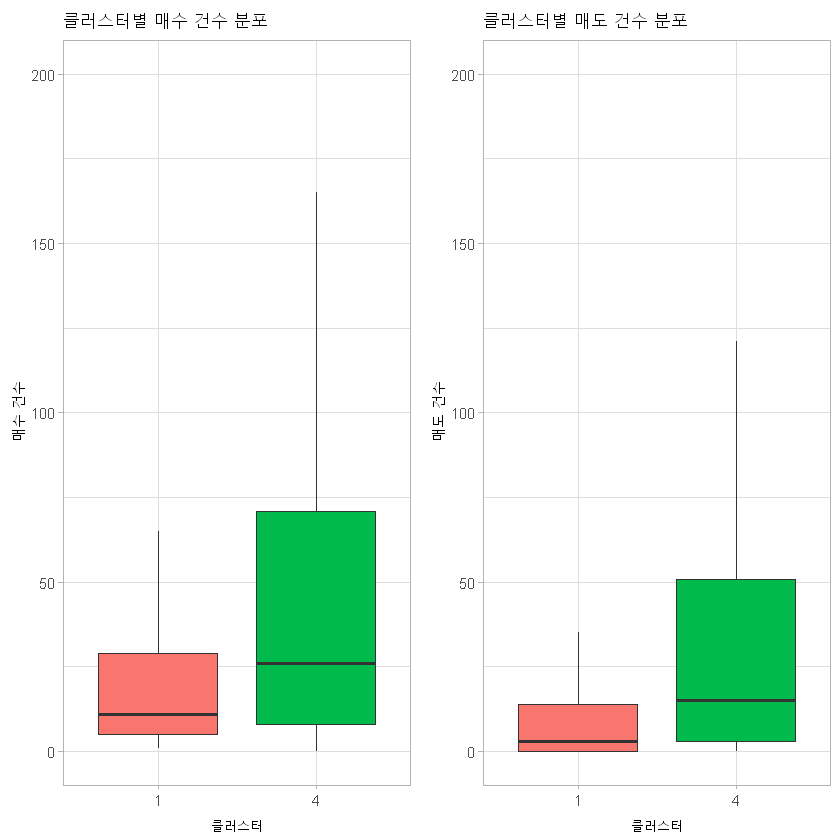

In [52]:
grid.arrange(
  result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4)) %>% 
    ggplot() + geom_boxplot(aes(x=factor(`kmeans1$cluster`), y = kr_b_cnt, group = `kmeans1$cluster`,
                                fill = factor(`kmeans1$cluster`)), outlier.shape = NA) +
    labs(title = "클러스터별 매수 건수 분포", x = "클러스터", y = "매수 건수") +
    theme_light()+
    scale_fill_manual(values = cluster_color) +
    guides(fill =FALSE) +  ylim(c(0, 200)),
  
  result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4)) %>% 
    ggplot() + geom_boxplot(aes(x=factor(`kmeans1$cluster`), y = kr_s_cnt, group = `kmeans1$cluster`,
                                fill = factor(`kmeans1$cluster`)), outlier.shape = NA) +
    labs(title = "클러스터별 매도 건수 분포", x = "클러스터", y = "매도 건수") +
    theme_light()+
    scale_fill_manual(values = cluster_color) +
    guides(fill =FALSE) +  ylim(c(0, 200)), ncol =2)


- 클러스터 4의 매수, 매도 거래 건수 모두 클러스터 1의 경우보다 많게 나타납니다. 클러스터 4에 속한 고객들이 클러스터 1에 속한 고객보다 자주 거래를 한다고 해석할 수 있습니다. 

다음으로 요인분석에서 사용했던 변수별로 클러스터 1과 4의 분포를 시각화하였습니다.  
(kospi_ratio, ss_ratio, kr_iem_ratio ,eee_cnt)

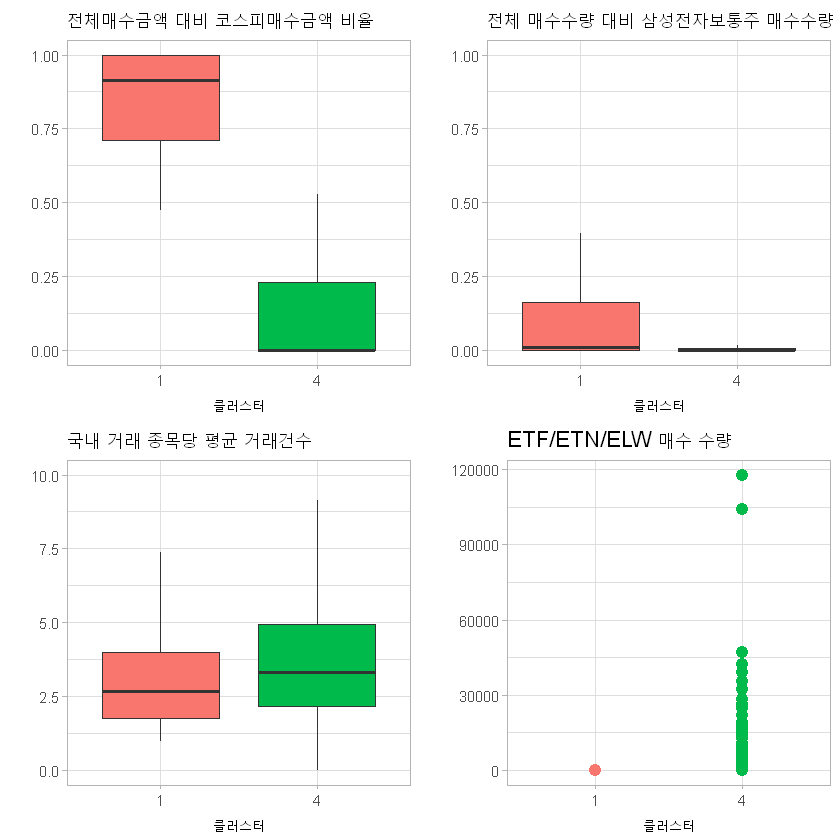

In [53]:
grid.arrange(
result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4)) %>% 
    ggplot() + geom_boxplot(aes(x= factor(`kmeans1$cluster`), y=kospi_ratio, group = `kmeans1$cluster`,
                                    fill = factor(`kmeans1$cluster`))) + 
    labs(title = "전체매수금액 대비 코스피매수금액 비율", x = "클러스터", y = " ") +
    theme_light()+
    scale_fill_manual(values = cluster_color) +
    guides(fill = FALSE), 
    
result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4)) %>% 
    ggplot() + geom_boxplot(aes(x= factor(`kmeans1$cluster`), y=ss_ratio, group = `kmeans1$cluster`,
                                  fill = factor(`kmeans1$cluster`)), outlier.shape = NA) + 
    labs(title = "전체 매수수량 대비 삼성전자보통주 매수수량", x = "클러스터", y = " ") +
    theme_light()+
    scale_fill_manual(values = cluster_color) +
    guides(fill = FALSE),
    
 result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4)) %>%
    ggplot() + geom_boxplot(aes(x=factor(`kmeans1$cluster`), y=kr_iem_ratio, group = `kmeans1$cluster`,
                                    fill = factor(`kmeans1$cluster`)), outlier.shape = NA) +
    labs(title = "국내 거래 종목당 평균 거래건수", x = "클러스터", y = " ") +
    theme_light()+
    ylim(c(0, 10)) +
    scale_fill_manual(values = cluster_color) +
    guides(fill = FALSE) , 
    
result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4)) %>% 
    ggplot() + geom_point(aes(x= factor(`kmeans1$cluster`), y=eee_cnt, group = `kmeans1$cluster`,
                                  colour = factor(`kmeans1$cluster`)), size = 3) +
    labs(title = "ETF/ETN/ELW 매수 수량", x = "클러스터", y = " ", color = '클러스터') +
    theme_light()+
    scale_color_manual(values = cluster_color) +
    guides(color = FALSE),
    ncol = 2)

- 클러스터 1은 클러스터 4보다 삼성전자보통주를 포함한 코스피 시장 주식 매수 비율이 높습니다. 이는 클러스터 1에 속한 고객들이 **우량주 위주의 안정적인 투자**를 한다고 해석할 수 있습니다.  


- 국내 거래 종목당 평균 거래건수는 앞서 살펴보았듯이 단기 거래를 하는 성향을 반영하는 변수로 해석하였습니다. 즉 클러스터 4의 고객들이 클러스터 1의 고객보다 **단기 투자를 선호**한다고 볼 수 있습니다.  


- 클러스터 1의 고객들은 ETF, ETN, ELW와 같은 **고위험 상품**들을 거의 매수하지 않은 반면, 클러스터 4에 속한 고객들은 눈에 띄게 많이 매수한 것으로 보입니다.

`summarise()` ungrouping output (override with `.groups` argument)


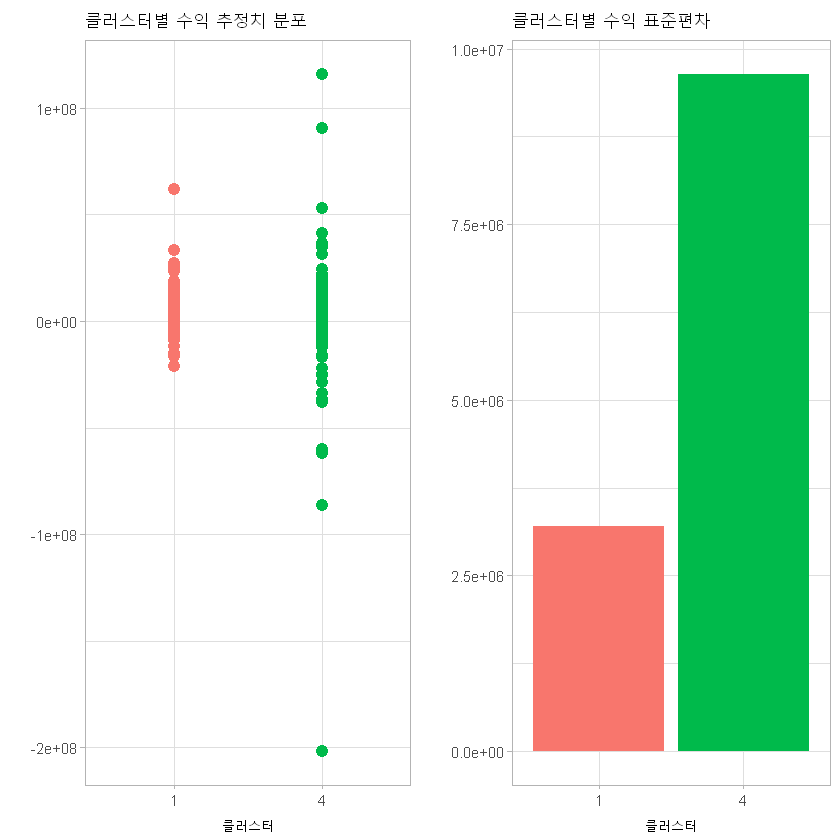

In [54]:
grid.arrange(  

  result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4)) %>% 
    ggplot() + geom_point(aes(x= as.factor(`kmeans1$cluster`), y=sum_prf, group = `kmeans1$cluster`,
                              colour = factor(`kmeans1$cluster`)),size = 3) +
    labs(title = "클러스터별 수익 추정치 분포", x = "클러스터", y = " ", color = '클러스터') +
    theme_light()+
    scale_color_manual(values = cluster_color) +
    guides(color = FALSE),

  result_cluster %>% filter(`kmeans1$cluster` %in% c(1, 4)) %>% 
    group_by(`kmeans1$cluster`) %>% summarise(sd = sd(sum_prf)) %>% 
    ggplot() + geom_col(aes(x = factor(`kmeans1$cluster`), y = sd, fill = as.factor(`kmeans1$cluster`))) +
    labs(title = "클러스터별 수익 표준편차", x = "클러스터", y = " ", fill = '클러스터') +
    guides(fill = FALSE) +
    scale_fill_manual(values = cluster_color) +
    theme_light(), ncol = 2)

- 클러스터 4가 클러스터 1보다 수익 분포의 표준편차가 훨씬 크게 나타납니다. 즉 클러스터 4에 속한 고객들은 **고수익을 얻기도 하지만, 큰 위험도도 부담한다**고 해석할 수 있습니다.

지금까지 클러스터별 특징을 다양한 시각화를 통해 알아보았습니다. YZ세대의 비중이 높았던 세 클러스터 별 특징을 요약하면 다음과 같습니다. 

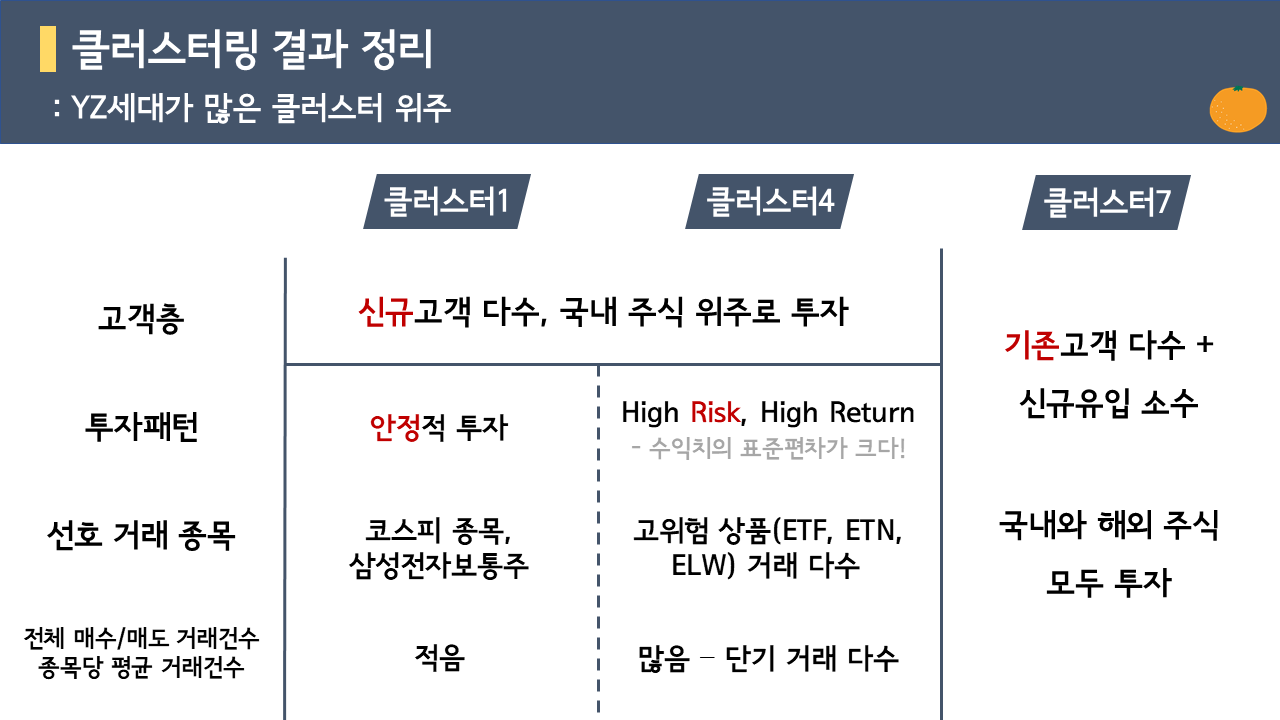

In [55]:
display_png(file="PPT/클러스터링 결과 요약.png")

## 3. 결론
 ### A.  YZ세대 투자자의 특성 인사이트 요약

#### 첫째,  2020년, 주식 시장의 세대 교체를 알린 YZ세대 투자자  
 
   2020년에 3월  판데믹이 이어지는 글로벌 정세 속에서 국내와 해외 주가가 대폭락하는 현상이 나타났습니다. 이러한 위기는 오히려 개인 투자자들에게 저가로 주식을 매수할 수 있는 기회가 되었습니다. 실제로 계좌개설 분포 추이 그래프에서도 2020년 개설된 계좌 개수가 눈에 띄게 증가했으며, 국내 해외 주식 거래량 모두 폭발적으로  증가했습니다. 그리고 이러한 ***극적인 변화를 이끈 주인공은 YZ세대***였습니다. 이로써 더이상 주식 투자는  4050세대의 전유물이 아니게 되었습니다.

#### 둘째,  High Return을 위해서라면 High Risk도 감수하는 YZ세대 투자자
 
  군집 분석을 통해 분류한 클러스터별 특징에 의하면 YZ세대의 고객들 중에는 ***국내 우량주 위주의 안정적 투자를 추구하는 유형***과 ***고위험 상품들을 거래하며 공격적 투자를 추구하는 유형***으로 구분되었습니다. 그러나 YZ세대의 특징으로 'high risk high return'을 뽑은 이유는 2020년 주가가 떨어진 대다수의 우량주를 매수하는 현상은 공통적으로 나타났기 때문입니다.   
  YZ세대가 선호하는 국내 종목 워드클라우드 시각화에서 삼성전자보통주를 포함한 우량주 종목이 많았으나, 이에 못지 않게 선물인버스 상품을 많이 거래하는 것을 볼 수 있었습니다. 실제로 30대 투자자들이 수익성과 위험성이 더 높은 상장지수펀드(ETF) 거래를 다른 세대보다 더 적극적으로 거래하는 것을 확인했는데, 특히 30대 남성 투자자의 경우 레버리지 상품을 포함한 ETF, ETN 상품 거래량이 다른 어떤 연령대보다 압도적으로 높았습니다.    

#### 셋째, 해외 주식 투자에 누구보다 적극적인 YZ세대 투자자
2020년, YZ세대 투자자들은 다른 어느 세대보다 해외 주식 투자에 적극적이었습니다. 어려서부터 외국 문화에 노출되어 해외 주식에 대한 거부감이 적은 세대이기도 하지만, 코로나19 여파로 미국 증시가 폭락하면서 해외 주식 시장에 대거 유입된 것으로 보입니다. 이들은 해외 주식 투자자들의 상당수를 차지하기도 하는데, 그렇기 때문에 ***“해외 주식의 판도를 쥐고 있는 연령층”*** 이라고 평가할 수 있습니다. 앞서 EDA에서의 ‘산업재’ 섹터 주식의 급격한 거래 증가 현상의 중심에도 YZ세대가 있었습니다. 비록 지금은 YZ세대가 기성 세대보다 투자 자금이 적은 편이지만, 향후 이들이 경제활동 주력계층으로 떠오르면 해외 종목 투자금액은 훨씬 커질 것으로 전망됩니다.

 ### B. YZ세대 대상 신규 서비스 아이디어 제시

율전동귤주먹 팀이 NH투자증권에 제안하는 신규 서비스 아이디어는 다음과 같습니다.

#### 1. 개인 맞춤형 프로파일링 서비스
YZ세대가 스스로 선택한 고객 데이터의 ' 투자성향 ' 과 실제로 분석된 그들의 ' 투자성향 ' 사이에는 괴리가 존재했습니다.   이는 ***“YZ세대가 자신의 투자 방식을 정확히 인지하고 있지 못한다”*** 는 사실을 보여줍니다.    
  
  실제로 클러스터링 모델링을 통해 '단기 매매를 자주하고 위험성이 높은 펀드 상품을 거래하는 유형' 과 '보다 안정성을 추구하고 장기 투자를 하는 유형' 의 고객들의 ***'(스스로 선택한) 투자성향' 지표가 구분되지 않음***을 확인할 수 있었습니다. 따라서  개인의 거래 패턴이 분석된 개인 맞춤형 프로파일링 서비스를 제안합니다. 특히 요인분석을 통해 파악한 변수들을 투자성향 분석에 활용한다면 고객들에게 보다 객관적인 인사이트를 제공할 수 있을 것입니다. 
    
    
  자신의 정체성과 고유 특성을 알고 싶어하는 욕망이 다른 세대보다 강한 YZ세대에게 이러한 프로파일링 서비스는 매력적인 유입 요인이 될 것이라고 생각합니다. 더불어 고객들도 자신의 거래 패턴을 정확히 인지할 수 있으므로 건강한 투자 습관을 기르는데 긍정적인 영향을 미칠 것으로 기대됩니다. 
    
   

#### 2. 유튜브를 활용한 주식 정보 컨텐츠 제공
앞서 EDA에서 많은 YZ세대 투자자들이 2020년에 새로 증권시장에 유입된 고객임을 알 수 있었습니다. 이들은 대부분 사회초년생 혹은 학생이기 때문에 기성세대에 비해 투자 경험과 필요한 정보들이 상대적으로 부족한 여건에 있습니다. 무엇이든 성장하기 위해서는 이를 지지할 수 있는 풍부한 자원이 존재해야 합니다. 2030 주식 투자자들이 더 활발하고 현명하게 투자하기 위해서는 이들이 공부할 수 있는 공간이 필요합니다. ‘뉴미디어’에 익숙한 YZ세대의 특성을 고려하여, 유튜브를 활용한 흥미롭고 건설적인 “투자 정보 컨텐츠”를 제공할 것을 제안합니다.

NH투자증권 유튜브 채널에 직접 방문해보고 놀란 점이 있습니다. 인기있는 영상들이 주식 투자 관련 정보를 제공하는 컨텐츠가 아니었기 때문입니다. 연예인들이 출연한 광고 영상이나 골프 선수가 나온 영상들이 주로 인기였던 반면 주식 정보를 담은 컨텐츠는 보통 조회수 700 ~ 1000회 정도를 웃돌았습니다.  YZ세대가 선호하는 스타일의 깔끔한 편집이 인상적인 ‘세금이 머니’ 컨텐츠의 조회수가 약 2000~3000회로 높은 편이긴 했으나, 정보성 동영상의 댓글이 막혀 있는 등 YZ세대와 ‘소통’할 수 있는 요소는 적다고 느꼈습니다.

아무리 좋은 질의 컨텐츠이더라도 사람들이 보지 않으면 그 가치가 절하되는 것이라고 생각합니다. NH투자증권이 본래부터 진행 해했던 전문적인 투자 정보 컨텐츠에 YZ세대가 좋아할 법할 여러 요소들 – 이를테면 깔끔한 편집과 자막 삽입, 화제성 있는 인플루엔서 섭외, 직접 참여하고 소통할 수 있는 창구 개설 – 를 첨가하면 많은 YZ세대 투자자를 사로잡을 수 있을 거라고 생각합니다.

## 4. 마치며



#### 한계와 의의

[한계]
 - 개인의 투자성향에 대한 명확한 지표를 산출하지 못하여 요인분석에 의한 파생변수 인사이트 도출에 그쳤습니다.  
 - 2020년이 국내 증권 시장에 큰 변화가 일어난 해였음에도 주어진 거래 기간이 길지 않아 더 깊이있는 인사이트를 찾지 못했습니다. 
 - 클러스터링 분석에서 7개의 모든 클러스터별 고객의 특성을 파악하지 못했습니다. 
 
 
[의의]
- 다양한 파생변수를 만들고 실제로 모델링에서 유의미하게 사용하여 더 깊이있는 인사이트를 발굴하였습니다.
- 비지도학습(FA, k-means clustering) 기법을 통해 분석을 진행했습니다.
- 주어진 데이터를 폭넓게 이해하기 위해 다양한 외부 데이터를 사용하였으며, 심층적인 시각화 결과 해석을 위해 여러 자료를 참고하였습니다.(참고한 신문기사 링크는 아래에 첨부하였습니다.)
- 다양한 시각화 기법을 사용하기 위해 노력했습니다. 

#### 맺음말
지금까지 YZ세대 투자자의 특성 프로파일링을 위해 EDA와 모델링을 진행하였습니다. YZ세대 투자자에 대해 보다 깊이 있는 인사이트를 얻기 위해 노력하였는데, 내용이 흥미로우셨다면 투표 부탁드립니다. 긴 글 읽어주셔서 감사합니다. 

#### [참고 자료] 
참고한 뉴스 기사 링크입니다. 
  
  
http://economy.chosun.com/client/news/view.php?boardName=C08&page=1&t_num=13608895  
https://biz.chosun.com/site/data/html_dir/2020/07/06/2020070602581.html  
https://www.ajunews.com/view/20201130111019779  
https://newsis.com/view/?id=NISX20200821_0001138057  
http://www.kyp.or.kr/news/articleView.html?idxno=14033  
https://www.hankyung.com/finance/article/2020091346211  
https://news.joins.com/article/23694224
http://www.hani.co.kr/arti/economy/finance/955986.html  
